In [5]:
import numpy as np
from numpy.random import normal, uniform
from numpy.linalg import eigvals
import math as mt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"     

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

%matplotlib inline

np.set_printoptions(precision=6)

np.random.seed(999)

In [6]:
mpl.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')
mpl.rcParams.update({'font.size': 4})

In [7]:
# Functions for O'Dwyer model
from ODwyer_Tools import *

# "" for Arnoldi stability measures
from Arnoldi_Tools import *

# "" for diversity measures
from Diversity_Measures import *

# 1. Arnoldi measures

## 1.1. "Resilience, reactivity and variability..." (2016)

The function below takes an object of the class `ODsystem...`, which we later define and implement, and returns a grid of stability measure vs. stability measure plots as in Arnoldi (2016). This way, we have a sanity check that the inequalities for the four stability measures hold in our own communities.

In [8]:
def stab_stab_plot(sys_, color_, sys_type_, n_, C_, extra_=None, font_size_=4, numbins=5):
    mpl.rcParams['figure.dpi'] = 250
    plt.style.use('ggplot')
    mpl.rcParams.update({'font.size': 4})
    plt.rc('font', size=font_size_)
    # numbins=5

    plt.subplot(3,3,1)
    plt.scatter(x=sys_.I_S,y=sys_.R_0, s = 1, c=color_, alpha = 0.5);
    plt.xlabel(r'$\mathcal{I}_S$');
    plt.ylabel(r'$\mathcal{R}_0$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)


    plt.subplot(3,3,2)
    plt.scatter(x=sys_.I_D,y=sys_.R_0, s=1, c=color_, alpha = 0.5);
    # plt.xlabel(r'$\mathcal{I}_D$');
    # plt.ylabel(r'$\mathcal{R}_0$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.subplot(3,3,3)
    plt.scatter(x=sys_.R_inf,y=sys_.R_0, s=1, c=color_, alpha = 0.5);
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.subplot(3,3,5)
    plt.scatter(x=sys_.I_D,y=sys_.I_S, s=1, c=color_, alpha = 0.5);
    plt.xlabel(r'$\mathcal{I}_D$');
    plt.ylabel(r'$\mathcal{I}_S$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)


    plt.subplot(3,3,6)
    plt.scatter(x=sys_.R_inf,y=sys_.I_S, s=1, c=color_, alpha = 0.5);
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.subplot(3,3,9)
    plt.scatter(x=sys_.R_inf,y=sys_.I_D, s=1, c=color_, alpha = 0.5);
    plt.xlabel(r'$\mathcal{R}_{\infty}$');
    plt.ylabel(r'$\mathcal{I}_D$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.suptitle('Arnoldi Measures for {} Community Matrices, n={}, C={}{}'.format(sys_type_, n_, C_, extra_));

    plt.tight_layout();

# 2. Diversity Measures

What to mention here? Refer to `Diversity_Measures.py`.



# 3. O'Dwyer Stability vs. Diversity

## 3.1. Mimicking the example consumer matrices from Butler, O’Dwyer paper
 

In Butler (2018), four qualitatively distinct varieties of the consumption preference parameter matrix *C* are given. We label them here as follows, based on their arrangement in that paper's graphics:

**Left**, (noisy)
* $C_{L_1}$, near-specialism (strong main-diagonal values)
* $C_{L_2}$, near-generalism (strong off-diagonal values)

**Right**, (deterministic "spectrum of similarity for resources")
* $C_{R_1}$, near-perfect diagonal specialism with upper-left and bottom-right entries augmented
* $C_{R_2}$, sinusoidal with range [0,1]

In [9]:
nC = 20 # Make example systems with 10 resource, 10 species

In [10]:
np.random.seed(667)

CL1 = np.random.uniform(0,0.4, (nC,nC))
np.fill_diagonal(CL1, np.random.uniform(0.8, 1, nC)) # Inplace

CL2 = np.random.uniform(0.8, 1, (nC,nC))
np.fill_diagonal(CL2, np.random.uniform(0,0.4, nC))

In [11]:
def fill_near_diag(x,y):
    # Adjust exponent for harder fall-off? Still not as intense as in O'Dwyer (They say smooth, but does not look very smooth in diagram)
    return 1 - (np.abs(x-y) / (nC-1) )**2


In [12]:
CR1 = np.fromfunction(fill_near_diag, (nC,nC))

CR1[-1,0] = 0.9 # Fill upper-right and lower-left entries as in the paper's CR1
CR1[0,-1] = 0.9

In [13]:
def fill_periodic(x,y):
    return 0.5 * (np.cos( 2*np.pi * np.abs(x-y) / (nC-1) ) + 1)

In [14]:
CR2 = np.fromfunction(fill_periodic, (nC,nC))

### 3.1.a. Heatmap of $C$ matrices

C:\Users\riley\AppData\Local\Temp/ipykernel_19596/972733243.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


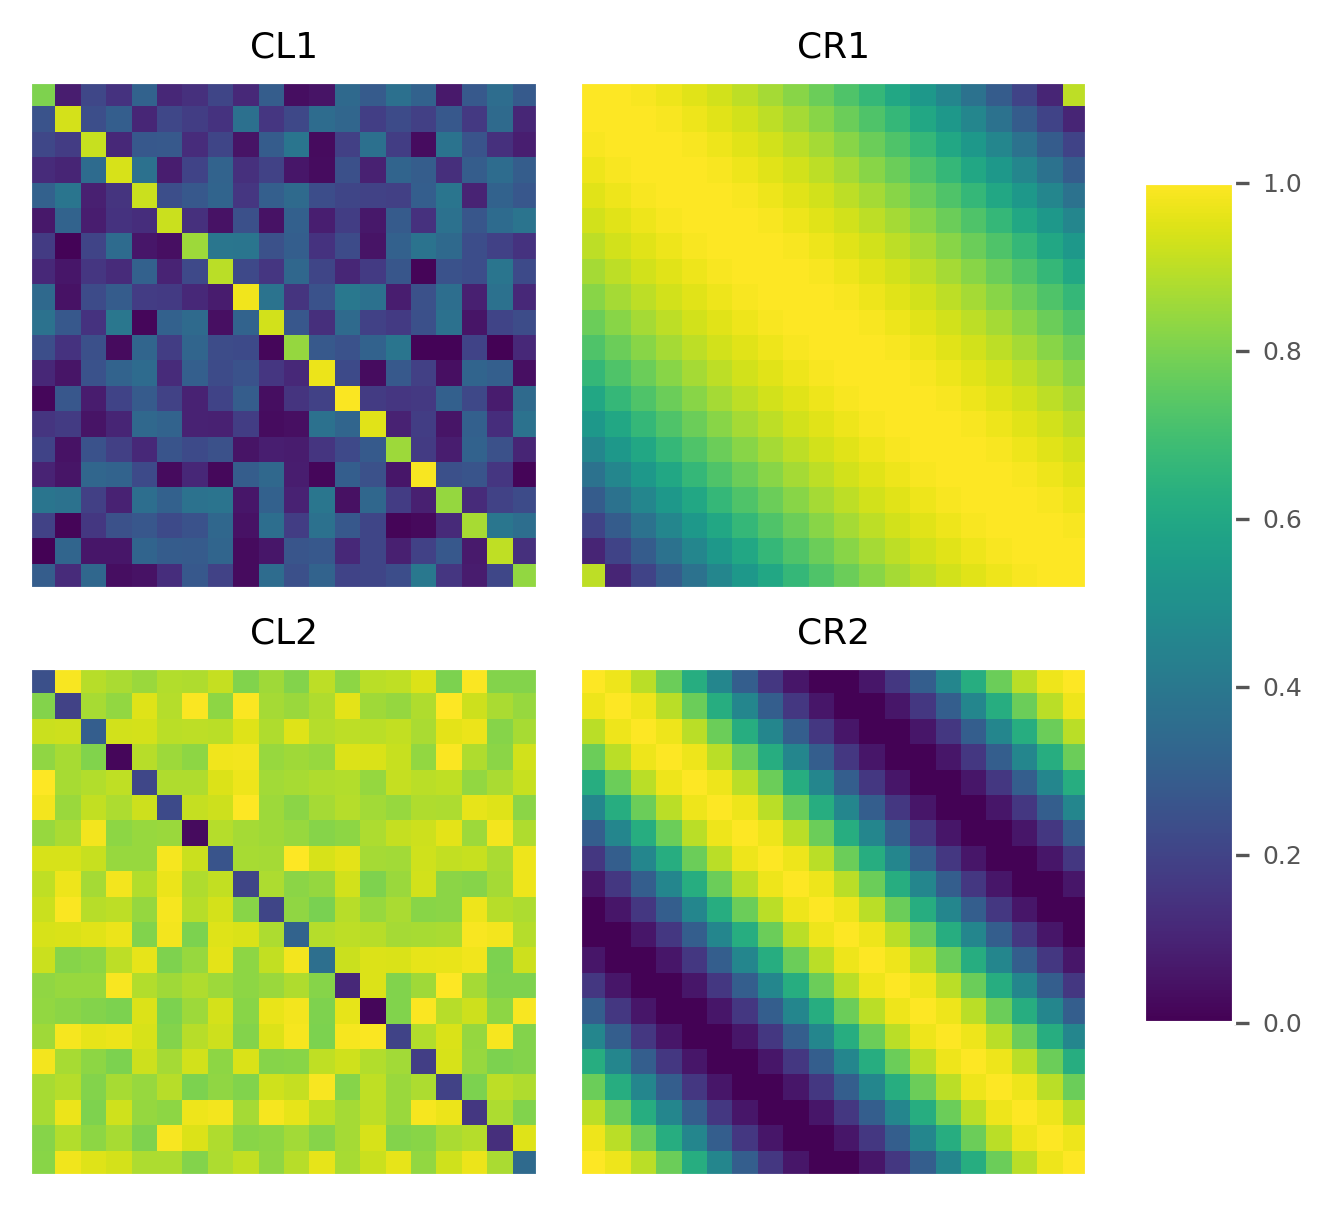

In [247]:
C_list = [CL1,CR1,CL2,CR2]
C_names = ["CL1","CR1","CL2","CR2"]

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=300)
plt
for i, ax in enumerate(axes.flat):
    # im = ax.imshow(C_list[i], vmin=np.min(C_list[i]), vmax=np.max(C_list[i]))
    im = ax.imshow(C_list[i], vmin=0, vmax=1)
    ax.grid(False);
    ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
    ax.yaxis.set_tick_params(left=False, labelleft=False)
    ax.set_title(C_names[i])


fig.subplots_adjust(right=1.15, hspace=3.5);
cbar_ax = fig.add_axes([0.825, 0.15, 0.05, 0.7]);
plt.grid(False);
fig.colorbar(im, cax=cbar_ax);

    
plt.tight_layout();
# plt.savefig('./graphics/consumer_matrix_plot.pdf');

## 3.2. Generating stable *n*-species systems with uniform diversity

Generating systems with haphazardly chosen equilibrium populations (e.g., equilibrium vectors with random uniform entries) actually results in highly left-skewed distributions of the effective number of species $D$. This being our predictor, we would like a roughly uniform distribution so as to have a more representative sample of systems with all degrees of diversity.

In [16]:
D_1(np.random.dirichlet(alpha=[1,1,100]))

array([[1.11744]])

Below, we set out a brute-force method of sampling equilibrium vectors of length $N$ with roughly $\textit{Unif}(1,N)$ diversity using multiple Dirichlet distributions. The parameter `k` denotes the size of a supersample that we will thin to only 1000 values with an approximately uniform histogram of diversity. The various `alpha` denote the parameters for two Dirichlet distributions. By choosing a number species `num_alpha_hi` to weight as more abundant, we can choose that many of the `alpha` values in the distribution to be far greater than the rest, which results in diversity measures that tend to be close to the chosen `num_alpha_hi`.

The equilibria are binned into 10 intervals, each with length `N/10`.

In [17]:
def uniform_D(n=3, k=3000, alpha1_hi=5, alpha1_lo=1, alpha2_hi=5, alpha2_lo=1, tune=0.8, seed_=667):
    # Now concatenate the hi-variance sample with the lo-diversity sample to get sth roughly unif

    np.random.seed(seed_)
    
    # Determine how many alphas to set to alpha_hi for dirichlet
    num_alpha_hi = int(n*tune)
    alphas1 = np.ones(n)*alpha1_lo
    alphas1[:num_alpha_hi] = alpha1_hi
    alphas2 = np.ones(n)*alpha2_lo
    alphas2[0] = alpha2_hi
    
    eqDensities_hivar = np.random.dirichlet(alpha=alphas1, size=k)
    eqDivs_hivar = D_1(eqDensities_hivar)
    eqDensities_lo_hivar = np.random.dirichlet(alpha=alphas2, size=k)
    eqDivs_lo_hivar = D_1(eqDensities_lo_hivar)
    eqDivs_supersamp = np.concatenate([eqDivs_hivar, eqDivs_lo_hivar])
    
    mybins = np.linspace(1,n,11)
    
    # plt.hist(eqDivs_lo_hivar, color='chartreuse', label='D, low-diversity subsample', alpha=0.5, bins=mybins);
    # print(np.min(eqDivs_lo_hivar))
    eqDensities_supersamp = np.concatenate([eqDensities_hivar, eqDensities_lo_hivar])
    
    bins = mybins
    digs = np.digitize(eqDivs_supersamp, bins)
    eqDensities_subsamp = np.zeros((1000,n))
    eqDivs_subsamp = np.zeros(1000)
    for i in range(1,11):
        eqDensities_subsamp[100*(i-1):100*(i)] = (eqDensities_supersamp[i==digs][:100])
        eqDivs_subsamp[100*(i-1):100*(i)] = (eqDivs_supersamp[i==digs][:100])
        # if (i==1):
            # print(eqDivs_subsamp)

    return [eqDensities_subsamp, eqDivs_subsamp, bins]
            

To conveniently explore Butler-O'Dwyer resource-competition systems with many parameter choices, we include the `ODsystem_unifD` class. Sampling equilibrium vectors with `uniform_D` and computing the invariability measures, whose computation in vectorized fashion was not so readily available, lead to quite long computation times. For this reason, we save pre-computed example system objects with the `pickle` library to avoid this process every time.

In [18]:
# Can either provide own precomputed equilibria or let them be generated with roughly uniform D.
class ODsystem_unifD:
    def __init__(self, k_=1000,n_=5, eps_=0.25, alpha1_hi = 5, alpha2_hi = 5, tune=0.8, R_star=None, S_star=None, C_ = None, k_supersamp=10000, seed_=667):
        self.seed = seed_
        np.random.seed(self.seed)
        self.k = k_
        self.n = n_
        self.eps = eps_
        
        if (R_star is None):
            self.R_star, self.D_R, self.D_R_bins = uniform_D(n=self.n, k=k_supersamp, alpha1_hi=alpha1_hi, alpha2_hi=alpha2_hi, tune=tune, seed_=self.seed+1)
            self.R_star = self.R_star.reshape(self.k,self.n,1)
        else:
            self.R_star = sum_to_one(R_star).reshape(self.k,self.n,1)
            self.D_R = D_1(R_star.reshape(self.k,self.n,1))
        
        if (S_star is None):
            self.S_star, self.D_S, self.D_S_bins = uniform_D(n=self.n, k=k_supersamp, alpha1_hi=alpha1_hi, alpha2_hi=alpha2_hi, tune=tune, seed_=self.seed)
            self.S_star = self.S_star.reshape(self.k,self.n,1)
        else:
            self.S_star = sum_to_one(S_star).reshape(self.k,self.n,1)
            self.D_S = D_1(S_star.reshape(self.k,self.n,1))
        
        self.D_s = self.D_S.copy()
            
        # Need to spoof these values to use OD_stab_div_plot() again
        self.simpson_s = 0
        self.shannon_s = 0
        self.gini_simp_s = 0
        hcdt = 0
        renyi = 0
                    
        if C_ is None:
            self.C = np.identity(self.n)
        else:
            self.C = C_
        
        self.s_star = sum_to_one(self.S_star)
        self.r_star = sum_to_one(self.R_star)
        
        blankones = np.ones((self.k,self.n,self.n))
        self.mu = dot_across(np.dot(self.eps * np.eye(self.n), np.transpose(self.C)) * blankones, self.R_star)
        # print("R_star ", self.R_star.shape)
        # print("C" , self.C.shape)
        # print("S_star ", self.S_star.shape)
        self.rho = dot_across(dot_across(np.eye(self.n)*self.R_star, self.C*blankones), self.S_star)
        
        self.J = community_matr_gen_noP(n_=self.n, k_=self.k, C_=self.C, eps_=self.eps, R_star_=self.R_star, S_star_=self.S_star)
        
        ### Arnoldi Measures ###
        self.R_0 = init_res(self.J)
        self.R_inf = asym_res(self.J)
        self.I_S = np.zeros(self.k)
        for i in range(self.k):
            self.I_S[i] = stoch_invar(self.J[i,:,:])
        self.I_D = np.zeros(self.k)
        for i in range(self.k):
            self.I_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(self.J[i,:,:]), method='brent').fun

        ### Diversity Measure ###
        # self.D_s = D_1(self.s_star)

Ultimately, we would like to see how stability varies with respect to the effective number of species in these systems, so we provide `OD_stab_div_plot` to create grids of stability-diversity scatterplots with optional LOWESS.

In [19]:
def OD_stab_div_plot(OD_, div_idx_=list(range(6)), fsize=(7,6), res = 250, fontsize=4, q=2, lowess_frac=None, lowess_col='black', title = '', one_col=None, s_=3, save_as=None, img_type='pdf'):
    q_renyi=q
    q_hcdt=q
    s_star = OD_.S_star / np.linalg.norm(OD_.S_star)
    hcdt = hcdt_entropy(s_star, q=q_hcdt)
    renyi = renyi_entropy(s_star, q=q_renyi)

    xlist = np.array([OD_.simpson_s, OD_.shannon_s, OD_.gini_simp_s, hcdt, renyi, OD_.D_s], dtype=object)
    xlist = list(xlist[div_idx_])
    xnames = np.array(['Simpson', 'Shannon', 'Gini-Simpson', r'HCDT, q={}'.format(q_hcdt), 'Renyi, q={}'.format(q_renyi), 'D, Numbers Equivalent'], dtype=object)
    xnames = list(xnames[div_idx_])
    ylist = [OD_.R_0, OD_.R_inf, OD_.I_S, OD_.I_D]
    ynames = [r'$\mathcal{R}_0$', r'$\mathcal{R}_{\infty}$', r'$\mathcal{I}_S$', r'$\mathcal{I}_D$']

    plt.figure(figsize=fsize, dpi=res)
    plt.style.use('ggplot')
    mpl.rcParams.update({'font.size': fontsize})
    thetitle = 'Stability against diversity in resource-competition ($n=${}) \n{}'.format(OD_.n, title)
    if (one_col==None):
        # if lowess_frac:
            # thetitle = thetitle + '\nLOWESS with fraction {}'.format(np.round(lowess_frac,3))
        plt.suptitle(thetitle);

    colors = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000', '#00000f']

    dimx = len(xlist)
    dimy = len(ylist)

    for i,stab in enumerate(ylist):
        for j,divind in enumerate(xlist):
            
            plt.subplot(dimy, dimx, i*dimx+j+1)
            if (i!=dimy-1):
                plt.tick_params('x', which='both', bottom=False, labelbottom=False);
            if (one_col==None):
                plt.scatter(divind, stab, s = s_, alpha=0.5, color = colors[j%dimx+len(colors)-2]);
            else:
                plt.scatter(divind, stab, s = s_, alpha=0.5, color = one_col);
            plt.xlim((1,OD_.S_star.shape[1]));
            if lowess_frac:
                w = lowess(stab.reshape(-1), divind.reshape(-1), frac=lowess_frac)
                if j != len(div_idx_)-1:
                    plt.plot(w[:,0], w[:,1], c=lowess_col, linestyle='dashed', linewidth=0.5, alpha=1.00)
                else:
                    if (one_col==None):
                        plt.plot(w[:,0], w[:,1], c='black', linestyle='dashed', linewidth=0.5, alpha=1.00)
                    else:
                        plt.plot(w[:,0], w[:,1], c=lowess_col, linestyle='dashed', linewidth=0.5, alpha=1.00)
            if j%dimx == 0:
                plt.ylabel(ynames[i]);
            if i == dimy-1:
                plt.xlabel(xnames[j]);

    
    plt.tight_layout();
    
    if (save_as != None):
        plt.savefig(save_as+'.{}'.format(img_type), format=img_type)


Below, we have the original code used to compute these RC systems. In practice, we will simply load systems from local binaries. For systems with larger $N$, we compute the equilibria ahead of time to ensure that we reach $1000$ samples, as these distributions become increasingly fickle with increasing species count.

In [20]:
# OD3_C0_unifD = ODsystem_unifD(n_=3, R_star=eqDensities_subsamp_R.reshape(1000,3,1), S_star=eqDensities_3_subsamp)

In [21]:
# OD5_C0_unifD = ODsystem_unifD(n_=5, seed_=667, k_supersamp=75000)

In [22]:
# (eqDensities10, eqDivs10, bins10) = uniform_D(n=10, k=100000, alpha1_hi=2, alpha2_hi=5, tune=0.2)
# (eqDensities10_R, eqDivs10_R, bins10_R) = uniform_D(n=10, k=100000, alpha1_hi=2, alpha2_hi=10, alpha2_lo=0.5, tune=0.3, seed_=668)
# # OD10_C0_unifDalt = ODsystem_unifD(n_=10, R_star=eqDensities10_R.reshape(1000,10,1), S_star=eqDensities10.reshape(1000,10,1))


In [23]:
# (eqDensities15, eqDivs15, bins15) = uniform_D(n=15, k=150000, alpha1_hi=2, alpha2_hi=2, alpha2_lo=0.2, tune=0.2)
# (eqDensities15_R, eqDivs15_R, bins15_R) = uniform_D(n=15, k=130000, alpha1_hi=2, alpha2_hi=5, alpha2_lo=0.5, tune=0.3, seed_=668)
# # OD15_C0_unifD = ODsystem_unifD(n_=15, R_star=eqDensities15_R.reshape(1000,15,1), S_star=eqDensities15.reshape(1000,15,1))


### 3.2.1. Function to call necessary system-generating functions

We combine the process of building one of these systems into a single function for legibility.

In [24]:
def build_a_sys(n, k, ksuper1, ksuper2, alpha1_hi, alphas2, tune, C, seed):
    (eqDensities, eqDivs, bins) = uniform_D(n=n, k=ksuper1, alpha1_hi=alpha1_hi, alpha2_hi=alphas2[1], alpha2_lo=alphas2[0], tune=tune, seed_=seed)

    (eqDensities_R, eqDivs_R, bins_R) = uniform_D(n=n, k=ksuper2, alpha1_hi=alpha1_hi, alpha2_hi=alphas2[1], alpha2_lo=alphas2[0], tune=tune, seed_=seed+1)

    OD_out = ODsystem_unifD(n_=n, R_star=eqDensities_R.reshape(k,n,1), S_star=eqDensities.reshape(k,n,1), C_=C)

    return OD_out

### 3.2.2. Load large resource-competition systems from local files

Pre-computed systems can be loaded so as to skip the time-consuming computation/code in the next sections.

In [25]:
import pickle # Save/load system objects as binaries; they are quite slow to calculate every single time.

In [26]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_C0_unifD = pickle.load(OD_obj_file)

In [27]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CL1_unifD = pickle.load(OD_obj_file)

In [28]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CL2_unifD = pickle.load(OD_obj_file)

In [29]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CR1_unifD = pickle.load(OD_obj_file)

In [30]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CR2_unifD = pickle.load(OD_obj_file)

## 3.3. Resource-competition stability-diversity plots

### 3.3.1. Demonstration of generating systems with roughly uniform $D$ ($N=3$, $C=I$)

Here, we explore in detail an example of the sampling process circumvented by the `build_a_sys()` function.

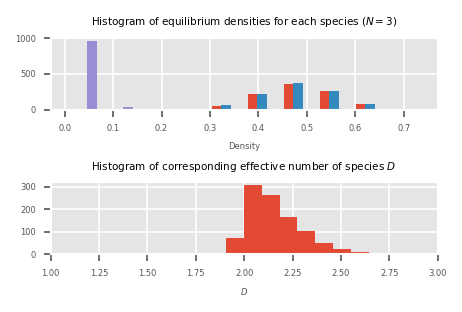

In [31]:
# Generate some equilibrium vectors with diversity near 2 using Dirichlet dists
np.random.seed(667)
eqDensities_3 = np.random.dirichlet(alpha=(20,20,1), size=1000)
eqDivs_3 = D_1(eqDensities_3)

plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_3);
plt.title("Histogram of equilibrium densities for each species ($N=3$)", fontsize=5);
plt.xlabel("Density", fontsize=4);
# plt.legend();

# Diversity histogram centered just above 2...
plt.subplot(2,1,2);
plt.hist(eqDivs_3);
plt.xlim((1,3));
plt.title("Histogram of corresponding effective number of species $D$", fontsize=5);
plt.xlabel("$D$", fontsize=4);
plt.tight_layout();

Above, note the concentration of diversity values near $D=2$.

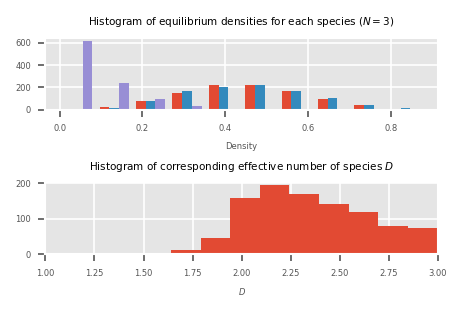

In [32]:
# Generating high-diversity equilibria
np.random.seed(667)
eqDensities_3_hivar = np.random.dirichlet(alpha=(5,5,1), size=1000)
eqDivs_3_hivar = D_1(eqDensities_3_hivar)

plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_3_hivar);
plt.title("Histogram of equilibrium densities for each species ($N=3$)", fontsize=5);
plt.xlabel("Density", fontsize=4);

# plt.legend();
plt.subplot(2,1,2);
plt.hist(eqDivs_3_hivar);
plt.xlim((1,3));
plt.title("Histogram of corresponding effective number of species $D$", fontsize=5);
plt.xlabel("$D$", fontsize=4);

plt.tight_layout();

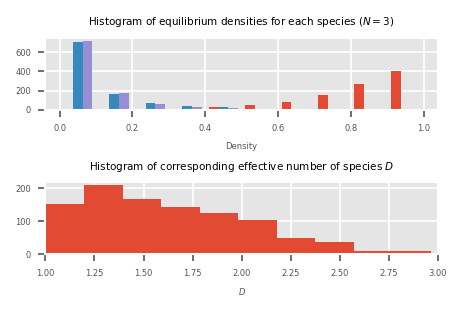

In [33]:
# Get enough low-diversity equilibria.
np.random.seed(667)
eqDensities_3_lo_hivar = np.random.dirichlet(alpha=(5,0.5,0.5), size=1000)
eqDivs_3_lo_hivar = D_1(eqDensities_3_lo_hivar)

plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_3_lo_hivar);
plt.title("Histogram of equilibrium densities for each species ($N=3$)", fontsize=5);
plt.xlabel("Density", fontsize=4);
# plt.legend();

plt.subplot(2,1,2);
plt.hist(eqDivs_3_lo_hivar);
plt.xlim((1,3));
plt.title("Histogram of corresponding effective number of species $D$", fontsize=5);
plt.xlabel("$D$", fontsize=4);

plt.tight_layout();

In [34]:
# Repeat for Resources
np.random.seed(668)
eqDensities_3_lo_hivar_R = np.random.dirichlet(alpha=(5,0.5,0.5), size=1000)
eqDivs_3_lo_hivar_R = D_1(eqDensities_3_lo_hivar_R)

eqDensities_3_hivar_R = np.random.dirichlet(alpha=(5,5,1), size=1000)
eqDivs_3_hivar_R = D_1(eqDensities_3_hivar_R)

In [35]:
# Now concatenate the hi-variance sample with the lo-diversity sample to get sth roughly unif
eqDivs_supersamp = np.concatenate([eqDivs_3_hivar, eqDivs_3_lo_hivar])
eqDensities_supersamp = np.concatenate([eqDensities_3_hivar, eqDensities_3_lo_hivar])

In [36]:
eqDivs_supersamp_R = np.concatenate([eqDivs_3_hivar_R, eqDivs_3_lo_hivar_R])
eqDensities_supersamp_R = np.concatenate([eqDensities_3_hivar_R, eqDensities_3_lo_hivar_R])

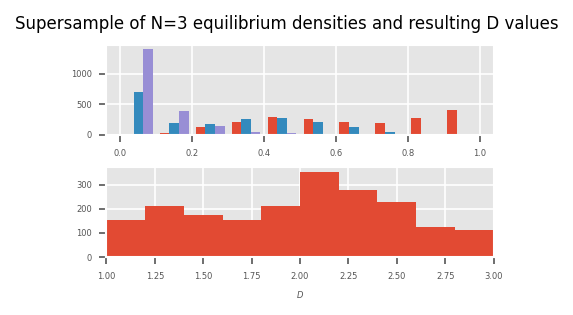

In [37]:
# Plotting supersample of EQ densities and the resulting D values. Now, need to thin for uniformity.
plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_supersamp);

# plt.legend();

plt.subplot(2,1,2);
plt.hist(eqDivs_supersamp);
plt.xlim((1,3));
# plt.title("Histogram of corresponding effective number of species $D$", fontsize=5);
plt.xlabel("$D$", fontsize=4);

plt.suptitle('Supersample of N=3 equilibrium densities and resulting D values', fontsize=8);
plt.tight_layout();

Now, we must remove equilibria such that only a uniform histogram remains. We start by getting the bins from the above histogram. Then, we weed out values at random from overrepresented bins.

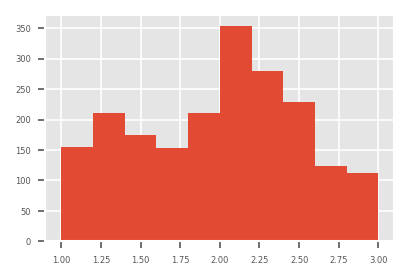

In [38]:
plt.figure(figsize=(3,2), dpi=150);
(counts, bins, patches) = plt.hist(eqDivs_supersamp, bins=np.linspace(1,3,11))

plt.show();

In [39]:
bins_3_C0 = np.array(bins)

digs = np.digitize(eqDivs_supersamp, bins)

digs_R = np.digitize(eqDivs_supersamp_R, bins)

In [40]:
# Thin the species equilibria
eqDensities_subsamp = np.zeros((1000,3))
eqDivs_subsamp = np.zeros(1000)
for i in range(1,11):
    eqDensities_subsamp[100*(i-1):100*(i)] = (eqDensities_supersamp[i==digs][:100])
    eqDivs_subsamp[100*(i-1):100*(i)] = (eqDivs_supersamp[i==digs][:100])

In [41]:
# Thin the resource equilibria
eqDensities_subsamp_R = np.zeros((1000,3))
eqDivs_subsamp_R = np.zeros(1000)
for i in range(1,11):
    # print(i)
    eqDensities_subsamp_R[100*(i-1):100*(i)] = (eqDensities_supersamp_R[i==digs_R][:100])
    eqDivs_subsamp_R[100*(i-1):100*(i)] = (eqDivs_supersamp_R[i==digs_R][:100])
    

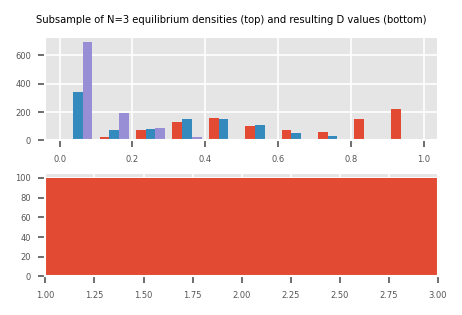

In [42]:
plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_subsamp);
# plt.legend();

plt.subplot(2,1,2);
# plt.hist(eqDivs_supersamp);
# plt.figure(figsize=(3,2), dpi=150);
counts_sub, bins_sub, patches_sub = plt.hist(eqDivs_subsamp, bins=bins_3_C0);
plt.suptitle("Subsample of N=3 equilibrium densities (top) and resulting D values (bottom)");
plt.xlim((1,3));
plt.tight_layout();

plt.show();

In [43]:
eqDensities_3_subsamp = eqDensities_subsamp.copy().reshape(1000,3,1)
eqDivs_3_subsamp = eqDivs_subsamp.copy()

We also compute some systems with non-uniform resource diversity, just to demonstrate the impact it can have on stability-diversity plots.

In [44]:
np.random.seed(667)
eqDensities_3_R = np.random.uniform(0,1,(1000,3,1))
J_3_C0 = community_matr_gen_noP(n_=3, k_=1000, C_=np.eye(3), eps_=0.25, R_star_=eqDensities_3_R, S_star_=eqDensities_3_subsamp)


In [45]:
J_3_C0_fixed = community_matr_gen_noP(n_=3, k_=1000, C_=np.eye(3), eps_=0.25, R_star_=eqDensities_subsamp_R, S_star_=eqDensities_3_subsamp)


In [46]:
unifD_3_R_0 = init_res(J_3_C0)
unifD_3_R_inf = asym_res(J_3_C0)
unifD_3_I_S = np.zeros(1000)
for i in range(1000):
    unifD_3_I_S[i] = stoch_invar(J_3_C0[i,:,:])
unifD_3_I_D = np.zeros(1000)
for i in range(1000):
    unifD_3_I_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(J_3_C0[i,:,:]), method='brent').fun


In [47]:
unifD_3_R_0_fixed = init_res(J_3_C0_fixed)
unifD_3_R_inf_fixed = asym_res(J_3_C0_fixed)
unifD_3_I_S_fixed = np.zeros(1000)
for i in range(1000):
    unifD_3_I_S_fixed[i] = stoch_invar(J_3_C0_fixed[i,:,:])
unifD_3_I_D_fixed = np.zeros(1000)
for i in range(1000):
    unifD_3_I_D_fixed[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(J_3_C0_fixed[i,:,:]), method='brent').fun


In [48]:
print("All systems stable? ", np.all(eigvals(J_3_C0).real<0))

All systems stable?  True


In [49]:
print("All systems stable? ", np.all(eigvals(J_3_C0_fixed).real<0))

All systems stable?  True


There is, understandably, a drastic difference between the stability-diversity plots when both species and resource equilibria are drawn from the uniform $D$ approach as opposed to when only the species are treated as such. The plots below illustrate this.

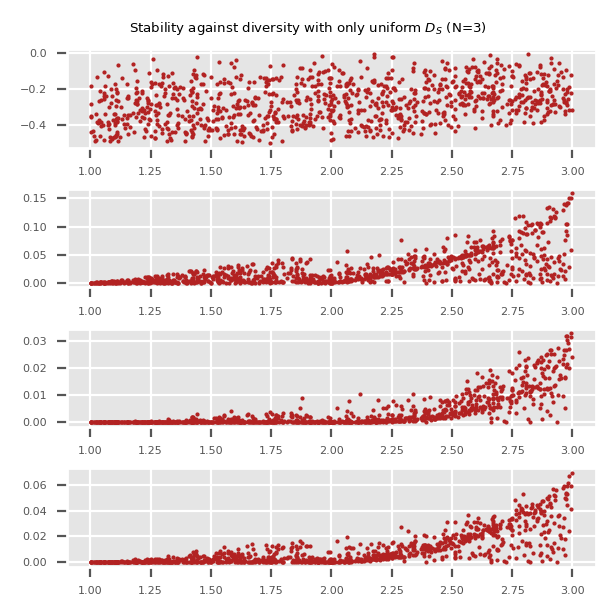

In [50]:
plt.figure(figsize=(3,3), dpi=200);
plt.subplot(4,1,1);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_0, s=1, color='firebrick');
plt.subplot(4,1,2);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_inf, s=1, color='firebrick');
plt.subplot(4,1,3);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_S, s=1, color='firebrick');
plt.subplot(4,1,4);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_D, s=1, color='firebrick');
plt.suptitle("Stability against diversity with only uniform $D_{S}$ (N=3)");
plt.tight_layout();

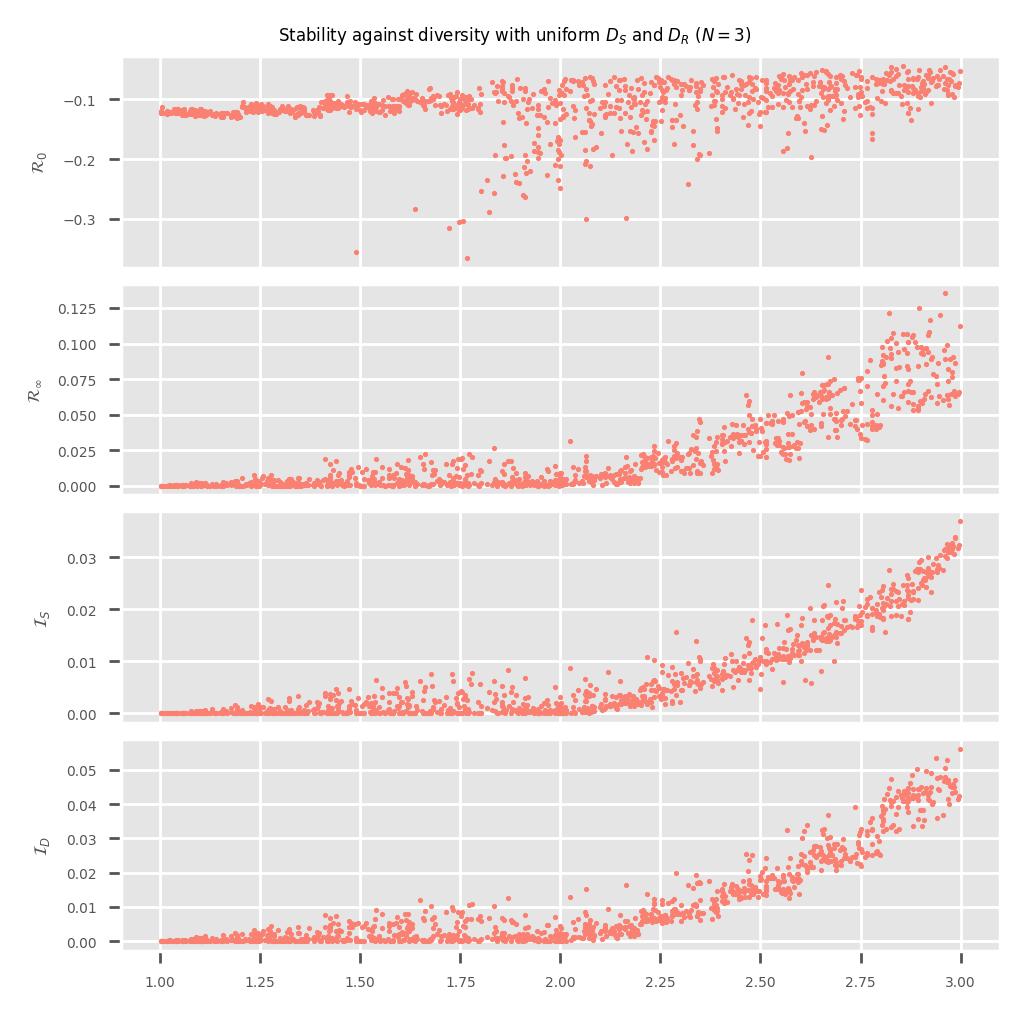

In [51]:
plt.figure(figsize=(4,4), dpi=250);
plt.subplot(4,1,1);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_0_fixed, s=1, color='salmon');
plt.tick_params('x', which='both', bottom=False, labelbottom=False);
plt.ylabel(r'$\mathcal{R}_{0}$');

plt.subplot(4,1,2);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_inf_fixed, s=1, color='salmon');
plt.tick_params('x', which='both', bottom=False, labelbottom=False);
plt.ylabel(r'$\mathcal{R}_{\infty}$');

plt.subplot(4,1,3);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_S_fixed, s=1, color='salmon');
plt.tick_params('x', which='both', bottom=False, labelbottom=False);
plt.ylabel(r'$\mathcal{I}_{S}$');

plt.subplot(4,1,4);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_D_fixed, s=1, color='salmon');
plt.ylabel(r'$\mathcal{I}_{D}$');

plt.suptitle("Stability against diversity with uniform $D_S$ and $D_R$ ($N=3$)");
plt.tight_layout();
# plt.savefig('./graphics/fixed_OD/OD3_C0_unifD.pdf');

### 3.3.2. $C_0$ 

#### 3.3.2.a. N=2 and the peculiar values of $\mathcal{R}_0$

For small values of $N$, particularly $N=2$, we observe distinct "bands" in the plots of initial resilience against diversity. Below, we provide plots to highlight this fact. Ultimately, the bands result from which species is dominant in the equilibrium population, which explains why they converge at high diversity values (no species dominates).

In [52]:
# # N=2
# # Uncomment to recompute system.
# OD2_C0_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=np.eye(2), seed=667)


In [53]:
# Splitting the "bands" using an approximate threshold
lwr_idx = OD2_C0_unifD.R_0<-0.13
upr_idx = OD2_C0_unifD.R_0>-0.13

r0_lwr = OD2_C0_unifD.J[lwr_idx]
r0_upr = OD2_C0_unifD.J[upr_idx]

In [54]:
temp = np.polyfit(OD2_C0_unifD.D_s[lwr_idx].flatten(), init_res((r0_lwr)).flatten(), deg=1)
# temp # Coefficients from linear fit on R_0 against species diversity D, smaller R_0

temp2 = np.polyfit(OD2_C0_unifD.D_s[upr_idx].flatten(), init_res((r0_upr)).flatten(), deg=1)
# temp2 # Coefficients from linear fit on R_0 against species diversity D, greater  R_0

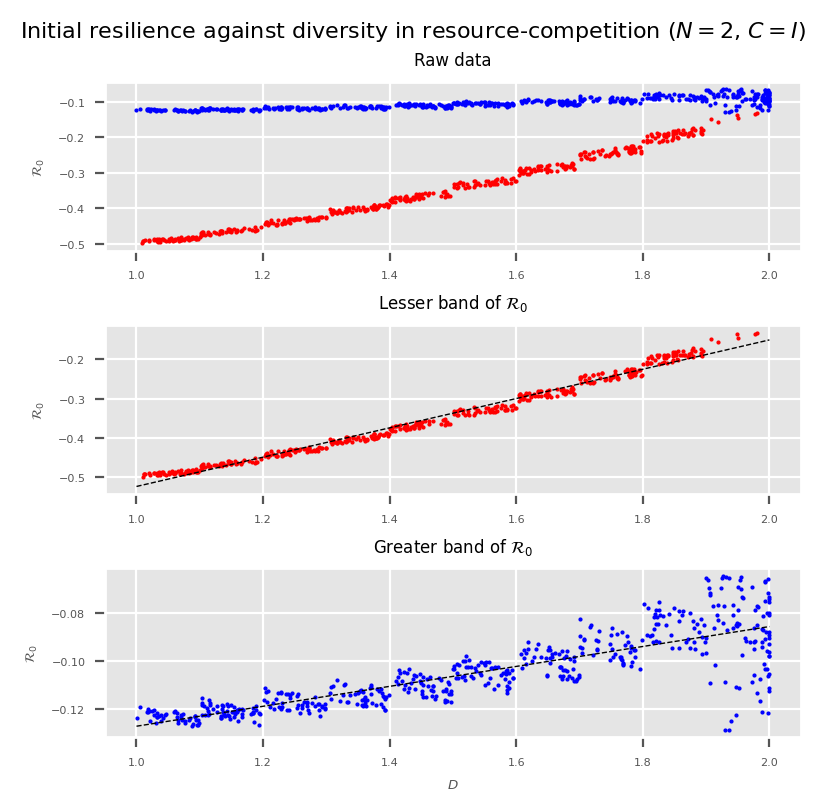

In [55]:
plt.figure(figsize=(4,4), dpi=200);
plt.suptitle("Initial resilience against diversity in resource-competition ($N=2$, $C=I$)", fontsize=8);

plt.subplot(3,1,1);
# plt.scatter(OD2_C0_unifD.D_s, init_res((OD2_C0_unifD.J)), s=1);
plt.scatter(OD2_C0_unifD.D_s[lwr_idx], init_res((r0_lwr)), s=1, color='red');
plt.scatter(OD2_C0_unifD.D_s[upr_idx], init_res((r0_upr)), s=1, color='blue');
plt.ylabel("$\mathcal{R}_0$");
plt.title("Raw data", fontsize=6);

plt.subplot(3,1,2);
plt.scatter(OD2_C0_unifD.D_s[lwr_idx], init_res((r0_lwr)), s=1, color='red');
plt.plot(np.linspace(1,2,100), temp[0]*np.linspace(1,2,100)+temp[1], c='k', linewidth=0.5, linestyle='--');
plt.ylabel("$\mathcal{R}_0$");
plt.title("Lesser band of $\mathcal{R}_0$", fontsize=6);

plt.subplot(3,1,3);
plt.scatter(OD2_C0_unifD.D_s[upr_idx], init_res((r0_upr)), s=1, color='blue');
plt.plot(np.linspace(1,2,100), temp2[0]*np.linspace(1,2,100)+temp2[1], c='black', linewidth=0.5, linestyle='--');
plt.ylabel("$\mathcal{R}_0$");
plt.title("Greater band of $\mathcal{R}_0$", fontsize=6);
plt.xlabel("$D$");

plt.tight_layout();

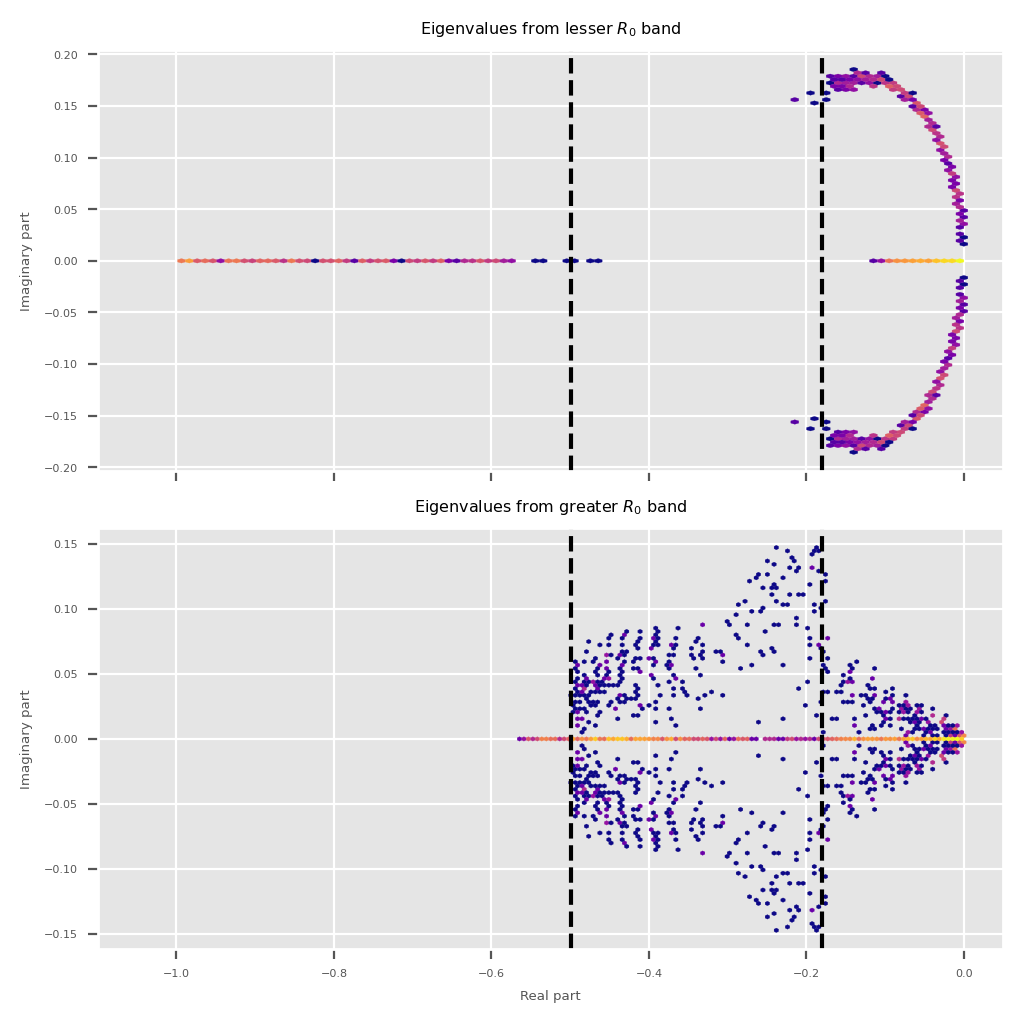

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(5,5), sharex=True, constrained_layout=True)
# fig.tight_layout()


# plt.subplots(2,1,1, figsize=(3,3));
cmap = mpl.cm.get_cmap("plasma").copy()
cmap.set_under(color = 'white', alpha = 0) 
ax[0].set_title("Eigenvalues from lesser $R_0$ band");
ax[0].hexbin(eigvals(r0_lwr).real, eigvals(r0_lwr).imag, bins='log', cmap=cmap, linewidths=0.1);
ax[0].axvline(-0.18, linestyle='--', c='k');
ax[0].axvline(np.min(OD2_C0_unifD.R_0), linestyle='--', c='k');
ax[0].set_ylabel("Imaginary part");


plt.xlim((-1.1,0.05));
# pc = ax[0].pcolormesh(Z, norm=colors.CenteredNorm(), cmap=cmap)
# ax[0].set_clim(10**(-8), 5) ### color limits, increase upper for better contrast



# plt.subplots(2,1,2, figsize=(3,3));
# cmap = mpl.cm.get_cmap("plasma").copy()
# cmap.set_under(color = 'white', alpha = 0) 
ax[1].set_title("Eigenvalues from greater $R_0$ band");
ax[1].hexbin(eigvals(r0_upr).real, eigvals(r0_upr).imag,  bins='log', cmap=cmap, linewidths=0.1);
ax[1].axvline(-0.18, linestyle='--', c='k');
ax[1].axvline(np.min(OD2_C0_unifD.R_0), linestyle='--', c='k');
ax[1].set_xlabel("Real part");
ax[1].set_ylabel("Imaginary part");



plt.xlim((-1.1,0.05));
# plt.tight_layout();

In [57]:
OD2_C0_unifD.S_star[lwr_idx][3] # True if S1 is greater than S2

array([[0.011655],
       [0.988345]])

In [58]:
np.any((np.diff(OD2_C0_unifD.S_star[lwr_idx][:], axis=1) < 0).flatten() == (np.diff(OD2_C0_unifD.R_star[lwr_idx][:], axis=1) < 0).flatten())


False

In [59]:
# np.all((np.diff(OD2_C0_unifD.S_star[upr_idx][idx], axis=0)<0).flatten() == (np.diff(OD2_C0_unifD.R_star[upr_idx][idx], axis=0)<0).flatten())

#### 3.3.2.b. $N=3$

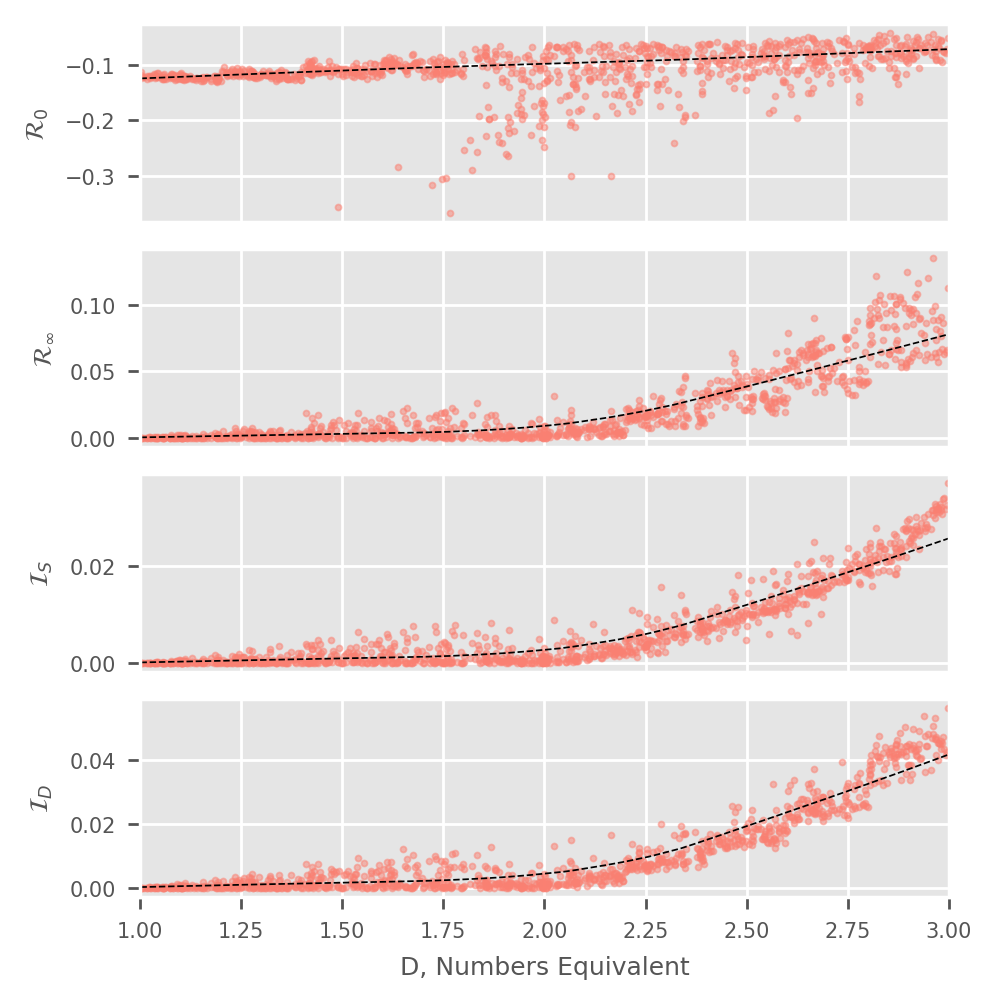

In [248]:
# OD_stab_div_plot(OD3_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_C0_unifD')

OD_stab_div_plot(OD3_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3)


In [61]:
# stab_stab_plot(OD3_CL1_unifD, 'firebrick', 'O\'Dwyer', 3, 'I', ', no P, fixed')

#### 3.3.2.c. $N=5$

In [232]:
# # OD_stab_div_plot(OD5_C0_unifD)
# OD_stab_div_plot(OD5_C0_unifD, fsize=(4,4), div_idx_=[5], title="Roughly uniform D (N=5)", 
#                  one_col = 'salmon' , s_=3, fontsize=6, lowess_frac=2./3, save_as='./graphics/fixed_OD/OD5_C0_unifD')


In [229]:
# stab_stab_plot(OD5_C0_unifD, 'firebrick', 'O\'Dwyer', 5, 'I', ', no P, fixed')

#### 3.3.2.d. $N=10$

In [64]:
# OD_stab_div_plot(OD10_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.25, save_as=r'./graphics/fixed_OD/OD10_C0_unifD')


#### 3.3.2.e. $N=15$

In [65]:
# OD_stab_div_plot(OD15_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_C0_unifD')


### 3.3.3. $C_{L_1}$

#### 3.3.3.a. $N=2$

In [66]:
# # N=2
# OD2_CL1_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:2,:2], seed=667)


In [67]:
# OD_stab_div_plot(OD2_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD2_CL1_unifD')


#### 3.3.3.b. $N=3$

In [68]:
# # N=3
# OD3_CL1_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:3,:3], seed=999)


In [69]:
# OD_stab_div_plot(OD3_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_CL1_unifD')


#### 3.3.3.c. $N=5$

In [70]:
# # N=5
# OD5_CL1_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:5,:5], seed=100)


In [71]:
# OD_stab_div_plot(OD5_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD5_CL1_unifD')


#### 3.3.3.d. $N=10$

In [72]:
# # N=10
# OD10_CL1_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:10,:10], seed=150)


In [73]:
# OD_stab_div_plot(OD10_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CL1_unifD')


#### 3.3.3.e. $N=15$

In [74]:
# # N=15
# OD15_CL1_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CL1[:15,:15], seed=990)


In [75]:
# OD_stab_div_plot(OD15_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CL1_unifD')


### 3.3.4. $C_{L_2}$

In [239]:
# # To view heatmap of CL2 matrix
# plt.imshow(CL2[:2,:2]);
# plt.title('CL2');
# plt.grid(False);
# plt.colorbar();

#### 3.3.4.a. $N=2$

In [76]:
# # N=2
# OD2_CL2_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:2,:2], seed=667)


In [77]:
# OD_stab_div_plot(OD2_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.5, save_as=r'./graphics/fixed_OD/OD2_CL2_unifD')


#### 3.3.4.b. $N=3$

In [78]:
# # N=3
# OD3_CL2_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:3,:3], seed=999)


In [79]:
# OD_stab_div_plot(OD3_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.5, save_as=r'./graphics/fixed_OD/OD3_CL2_unifD')


In [80]:
# plt.scatter(x = OD3_CL2_unifD.D_S, y = OD3_CL2_unifD.R_0, s=1, alpha=0.5);

In [81]:
# plt.scatter(x = OD3_CL2_unifD.D_S, y = OD3_CL2_unifD.R_inf, s=1, alpha=0.5);

#### 3.3.4.c. $N=5$

In [82]:
# # N=5
# OD5_CL2_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:5,:5], seed=100)


In [83]:
# OD_stab_div_plot(OD5_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.5, save_as=r'./graphics/fixed_OD/OD5_CL2_unifD')


#### 3.3.4.d. $N=10$

In [84]:
# # N=10
# OD10_CL2_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:10,:10], seed=150)


In [85]:
# OD_stab_div_plot(OD10_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CL2_unifD')


#### 3.3.4.e. $N=15$

In [86]:
# # N=15
# OD15_CL2_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CL2[:15,:15], seed=990)


# np.all(eigvals(OD15_CL2_unifD.J).real < 0)

# eigvals(OD15_CL2_unifD.J).real.max()

In [87]:
# OD_stab_div_plot(OD15_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CL2_unifD')


### 3.3.5. $C_{R_1}$

#### 3.3.5.a. $N=2$

In [89]:
# For this small of C, the qualitative pattern does not really matter, right?
CR1_2 = np.fromfunction(fill_near_diag, (2,2))

CR1_2[-1,0] = 0.9
CR1_2[0,-1] = 0.9

In [240]:
# # To view CR1 matrix for N=2
# plt.imshow(CR1_2);
# plt.title('CR1');
# plt.grid(False);

In [91]:
# # N=2
# OD2_CR1_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_2, seed=667)


In [92]:
np.all(eigvals(OD2_CR1_unifD.J).real < 0)

eigvals(OD2_CR1_unifD.J).real.max()

True

-8.296614154721459e-10

In [93]:
# OD_stab_div_plot(OD2_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR1", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD2_CR1_unifD')


#### 3.3.5.b. $N=3$

In [94]:
CR1_3 = np.fromfunction(fill_near_diag, (3,3))

CR1_3[-1,0] = 0.9
CR1_3[0,-1] = 0.9

In [95]:
# # N=3
# OD3_CR1_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_3, seed=999)


In [96]:
np.all(eigvals(OD3_CR1_unifD.J).real < 0)

eigvals(OD3_CR1_unifD.J).real.max()

True

-3.7684725086898735e-11

In [97]:
# OD_stab_div_plot(OD3_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR1", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_CR1_unifD')


In [98]:
# stab_stab_plot(OD3_CR1_unifD, 'firebrick', 'O\'Dwyer', 3, 'CR1', ', no P, uniform D')

#### 3.3.5.c. $N=5$

In [99]:
CR1_5 = np.fromfunction(fill_near_diag, (5,5))

CR1_5[-1,0] = 0.9
CR1_5[0,-1] = 0.9

In [100]:
# # N=5
# OD5_CR1_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_5, seed=100)


In [101]:
np.all(eigvals(OD5_CR1_unifD.J).real < 0)
np.max(eigvals(OD5_CR1_unifD.J).real)

False

2.835184609468864e-17

In [102]:
CR1_10 = np.fromfunction(fill_near_diag, (10,10))

CR1_10[-1,0] = 0.9
CR1_10[0,-1] = 0.9

#### 3.3.5.d. $N=10$

In [103]:
# # N=10
# OD10_CR1_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_10, seed=150)


In [104]:
np.all(eigvals(OD10_CR1_unifD.J).real < 0)

False

In [105]:
# OD_stab_div_plot(OD10_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CR1_unifD')


In [106]:
np.max(eigvals(OD10_CR1_unifD.J).real)

2.075265038020711e-16

In [107]:
np.mean(eigvals(OD10_CR1_unifD.J).real)

-0.4749010424636956

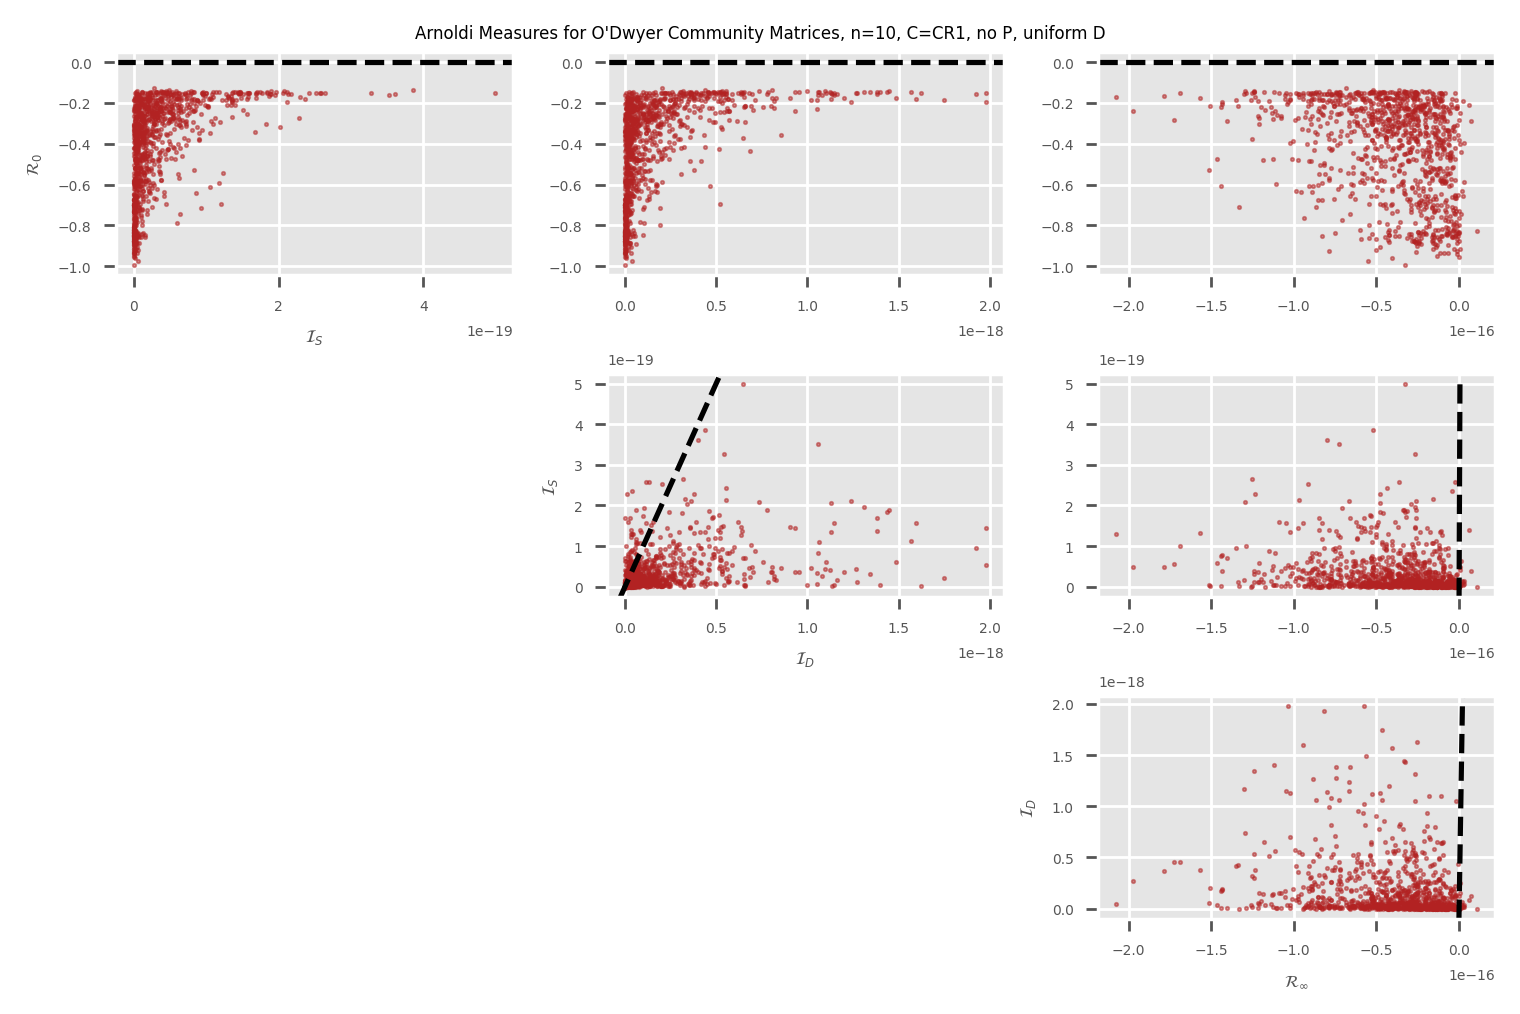

In [108]:
stab_stab_plot(OD10_CR1_unifD, 'firebrick', 'O\'Dwyer', 10, 'CR1', ', no P, uniform D')

#### 3.3.5.e. $N=15$

In [109]:
CR1_15 = np.fromfunction(fill_near_diag, (15,15))

CR1_15[-1,0] = 0.9
CR1_15[0,-1] = 0.9

In [110]:
# for i in ODs_CR1:
#     print(np.mean(i.R_inf))

In [111]:
# repeat for N=11,12,13,14??? Where this R_inf trend coming from

In [112]:
# # N=15
# OD15_CR1_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CR1_15, seed=990)


# np.max(eigvals(OD15_CR1_unifD.J).real)

# # ODs_CR1=[OD3_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,OD15_CR1_unifD]

# OD_stab_div_plot(OD15_CR1_unifD, fsize=(4,4), div_idx_=[5], title="Gaussian-ish Consumer matrix kernel (N=15)", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CR1_unifD')


### 3.3.6. $C_{R_2}$

We use the same `build_a_sys` calls as above but with $C$ swapped out. We also keep same equilibrium densities for sake of comparison.

In [234]:
# Compute the consumer matrices all at once
CR2_2 = np.fromfunction(fill_periodic, (2,2))

CR2_3 = np.fromfunction(fill_periodic, (3,3))

CR2_5 = np.fromfunction(fill_periodic, (5,5))

CR2_10 = CR2.copy()

CR2_15 = np.fromfunction(fill_periodic, (15,15))

#### 3.3.6.a. $N=2$

In [114]:
# N=2
OD2_CR2_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_2, seed=667)


In [115]:
np.all(eigvals(OD2_CR2_unifD.J).real < 0)

eigvals(OD2_CR2_unifD.J).real.max()

True

-6.07189786550438e-11

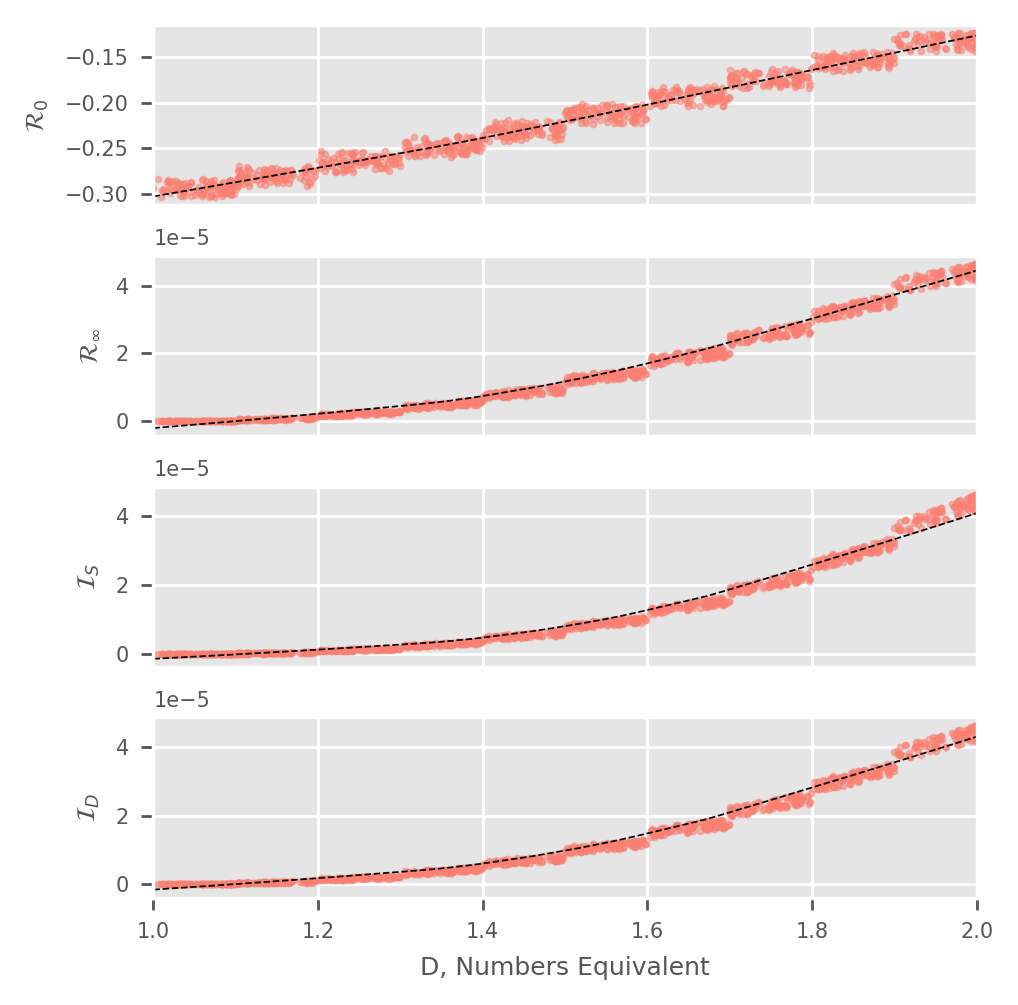

In [116]:
OD_stab_div_plot(OD2_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD2_CR2_unifD')


#### 3.3.6.b. $N=3$

In [117]:
# # N=3
# OD3_CR2_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_3, seed=999)


In [118]:
# # N=3, C scaled down
# OD3_CR2_unifD_smallC = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_3/10, seed=999)


In [119]:
np.all(eigvals(OD3_CR2_unifD.J).real < 0)

True

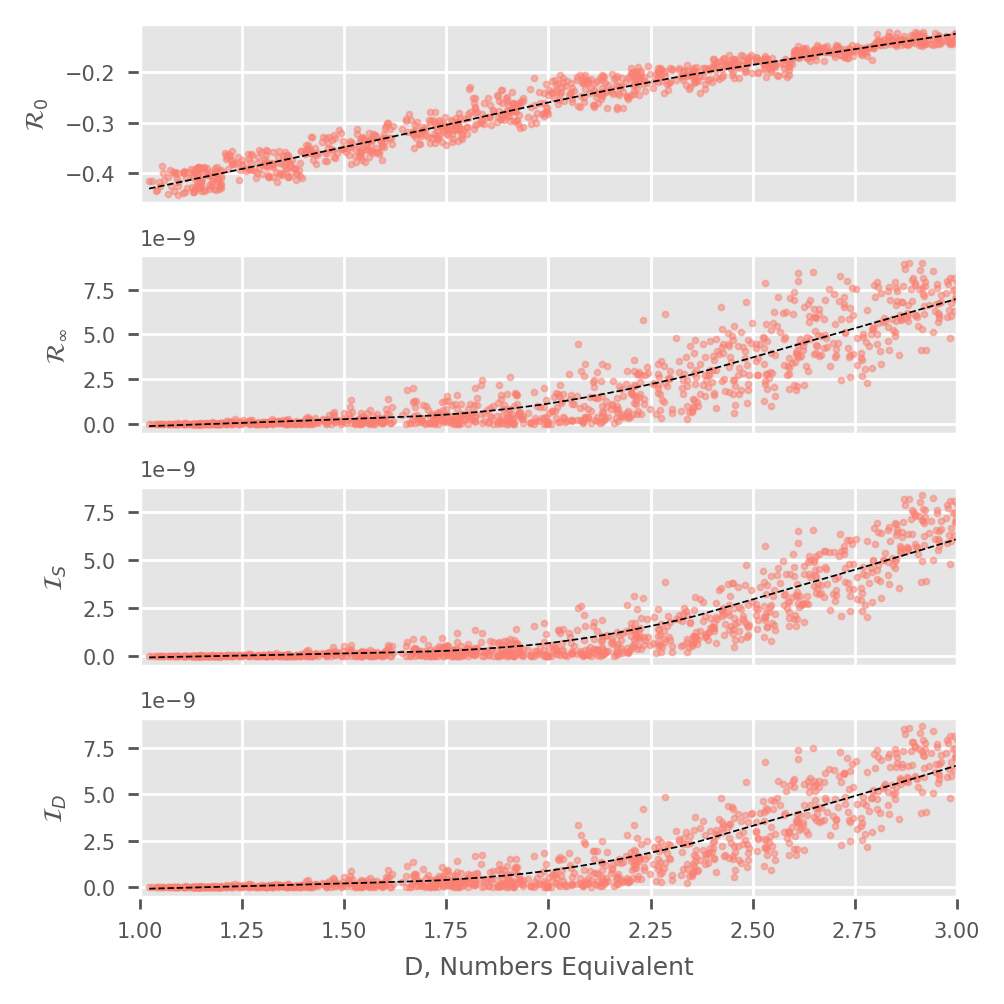

In [120]:
OD_stab_div_plot(OD3_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_CR2_unifD')


In [121]:
# OD_stab_div_plot(OD3_CR2_unifD_smallC, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3)


#### 3.3.6.c. $N=5$

In [122]:
# # N=5
# OD5_CR2_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_5, seed=100)


Careful. The systems with $N\geq 5$ have near-zero noise for eigenvalues. They are not really convincingly stable.

In [123]:
np.all(eigvals(OD5_CR2_unifD.J).real < 0)

False

In [124]:
# OD_stab_div_plot(OD5_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD5_CR2_unifD')


#### 3.3.6.d. $N=10$

In [125]:
# # N=10
# OD10_CR2_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_10, seed=150)


In [126]:
np.all(eigvals(OD10_CR2_unifD.J).real < 0)

False

In [127]:
np.max(eigvals(OD10_CR2_unifD.J).real)

1.4699860307601919e-16

In [128]:
# OD_stab_div_plot(OD10_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CR2_unifD')


#### 3.3.6.e. $N=15$

In [129]:
# # N=15
# OD15_CR2_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CR2_15, seed=990)


# np.all(eigvals(OD15_CR2_unifD.J).real < 0)

# eigvals(OD15_CR2_unifD.J).real.max()

# OD_stab_div_plot(OD15_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CR2_unifD')


## 3.4. Save systems

Here, we aggregate the systems from each $C$ matrix type for convenience and save each system as a binary for loading later. Below, a fully commented block contains the code to save/overwrite the system objects.

In [130]:
C0_list  = [OD2_C0_unifD, OD3_C0_unifD, OD5_C0_unifD, OD10_C0_unifD, OD15_C0_unifD]
CL1_list = [OD2_CL1_unifD, OD3_CL1_unifD, OD5_CL1_unifD, OD10_CL1_unifD, OD15_CL1_unifD]
CL2_list = [OD2_CL2_unifD, OD3_CL2_unifD, OD5_CL2_unifD, OD10_CL2_unifD, OD15_CL2_unifD]
CR1_list = [OD2_CR1_unifD, OD3_CR1_unifD, OD5_CR1_unifD, OD10_CR1_unifD, OD15_CR1_unifD]
CR2_list = [OD2_CR2_unifD, OD3_CR2_unifD, OD5_CR2_unifD, OD10_CR2_unifD, OD15_CR2_unifD]


In [131]:
# ### Uncomment to SAVE systems ###

# # unifD_list = []
# # C_list = ['C0', 'CL1', 'CL2', 'CR1', 'CR2']
# N_list = ['2','3','5','10','15']
# for n,sys in zip(N_list,C0_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_C0_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)

# for n,sys in zip(N_list,CL1_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CL1_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)
        
# for n,sys in zip(N_list,CL2_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CL2_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)

# for n,sys in zip(N_list,CR1_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CR1_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)
        
# for n,sys in zip(N_list,CR2_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CR2_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)


## 3.5. MSE over return path

According to Arnoldi, perturbations should tend to have a greater effect on more abundant species. This variation should be somewhat smoothed out if we choose many perturbations in random directions.

In [132]:
def OD_eqns(N, t, C, eps, mu, rho):
    n = N.size // 2
    N = N.reshape(-1,1)
    Rprimes = rho - N[:n] * np.dot(C, N[n:]) 
    Sprimes = eps * N[n:] * np.dot(C.T, N[:n]) - mu * N[n:] 
    return np.concatenate((Rprimes, Sprimes), axis=0).flatten()

In [133]:
# Args must be 'time' before 'N' for `solve_ivp`
def OD_eqns_alt(t, N, C, eps, mu, rho): 
    n = N.size // 2
    N = N.flatten()
    Nout = np.zeros((N.size))
    Nout[:n] = (rho - N[:n].reshape(n,1) * np.dot(C, N[n:].reshape(n,1))).flatten() 
    Nout[n:] = (eps * N[n:].reshape(n,1) * np.dot(C.T, N[:n].reshape(n,1)) - mu * N[n:].reshape(n,1)).flatten()
    return Nout

In [134]:
from scipy.integrate import solve_ivp

In [135]:
# # For convenience, the most referenced systems compiled in a single list.
# OD_list = [OD2_C0_unifD, OD5_C0_unifD, OD10_C0_unifD,
#             OD2_CL1_unifD,OD5_CL1_unifD,OD10_CL1_unifD,
#             OD2_CL2_unifD,OD5_CL2_unifD,OD10_CL2_unifD,
#             OD2_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,
#             OD2_CR2_unifD,OD5_CR2_unifD,OD10_CR2_unifD]

In [276]:
# NB: Only considering 2 systems, probably 100 perturbations

# Will simulate the min/max systems of chosen stab measure, plot them, return solution
def OD_MSE_sim_plot(sys, time, stab_measure, num_perts, save_plots=None, pert_frac=0.1, time_fast=None, steps_fast=1000, seed=2, titles=True):
    stab_min_idx = np.argmin(getattr(sys, stab_measure))
    stab_min = (getattr(sys, stab_measure))[stab_min_idx]
    
    stab_max_idx = np.argmax(getattr(sys, stab_measure))
    stab_max = (getattr(sys, stab_measure))[stab_max_idx]
    
    eq_min = np.concatenate([sys.R_star[stab_min_idx],sys.S_star[stab_min_idx]])
    eq_max = np.concatenate([sys.R_star[stab_max_idx],sys.S_star[stab_max_idx]])
    
    if time_fast==None:
        time_fast = time
    
    sols_min = [None]*num_perts
    mses_min = [None]*num_perts
    sols_max = [None]*num_perts
    mses_max = [None]*num_perts
    

    plt.subplot(2,1,2); # Only max plot, then min plot and max plot
    np.random.seed(2)
    for i in range(num_perts):
        u = np.random.uniform(-1,1,(int(sys.n*2),1))
        
        ### MAX stability
        ic_max = eq_max + pert_frac*u/np.linalg.norm(u)
        ic_max=np.abs(ic_max.flatten())

        sol_max = solve_ivp(OD_eqns_alt, t_span=time,  y0=ic_max, args=(sys.C, sys.eps, sys.mu[stab_max_idx], sys.rho[stab_max_idx]), 
                               dense_output=True, method='LSODA', vectorized=True)
        mse_max = np.mean(np.square(sol_max.y - eq_max), axis=0)
        _=plt.plot(sol_max.t[:], mse_max[:], alpha=0.05, color='firebrick');
        
        ### MIN stability
        ic_min = eq_min + pert_frac*u/np.linalg.norm(u)
        ic_min=np.abs(ic_min.flatten())

        sol_min = solve_ivp(OD_eqns_alt, t_span=time,  y0=ic_min, args=(sys.C, sys.eps, sys.mu[stab_min_idx], sys.rho[stab_min_idx]), 
                               dense_output=True, method='LSODA', vectorized=True)
        mse_min = np.mean(np.square(sol_min.y - eq_min), axis=0)
        _=plt.plot(sol_min.t[:], mse_min[:], alpha=0.05, color='deepskyblue');
        
        
        sols_min[i] = sol_min
        mses_min[i] = mse_min
        sols_max[i] = sol_max
        mses_max[i] = mse_max
        
    plt.xlabel("Time");
    plt.ylabel("MSE");
    title_dict = {"R_0":"initial resilience", "R_inf":"asymptotic resilience", 
                  "I_S":"stochastic invariability", "I_D":"deterministic invariability"}
    stab_name = title_dict[stab_measure]
    # plt.tick_params(axis='both',  bottom=False,labelbottom=False);
    if titles:
        plt.title("MSE over return for minimal and maximal {} ($N=${})".format(stab_name, sys.n));
    

    plt.subplot(2,1,1);
    np.random.seed(2)
    for i in range(num_perts):
        # u = np.random.uniform(-1,1,(int(sys.n*2),1))
        t_fast = np.linspace(time_fast[0],time_fast[1], steps_fast)
        sol_max = sols_max[i].sol(t_fast)
        mse_max = np.mean(np.square(sol_max-eq_max), axis=0)
        _=plt.plot(t_fast, mse_max, alpha=0.05, color='firebrick');
        
    
    plt.ylabel("MSE");
    if titles:
        plt.title("MSE over return for maximal {} ($N=${})".format(stab_name, sys.n));
        
    
    plt.tight_layout();
    plt.subplots_adjust(hspace=0.35)
    if save_plots!=None:
        plt.savefig(save_plots+'.pdf')
    plt.show();
    
    
    return [sols_min, mses_min, sols_max, mses_max]


Let's now plot the MSE of these systems with respect to equilibrium over time for 100 randomly drawn 0.1-unit perturbations. Full unit perturbations prove to stray too far from equilibrium for the scale these systems happen to be in, which is not indicative of the behavior of the linearized systems that the stability measures are intended to describe. 

We, as previously, repeat the plotting process for each $C$ type but only a few species counts and stability measures.

### 3.5.1. $C_0$

#### 3.5.1.a. MSE for max/min asymptotic resilience, $N=3$

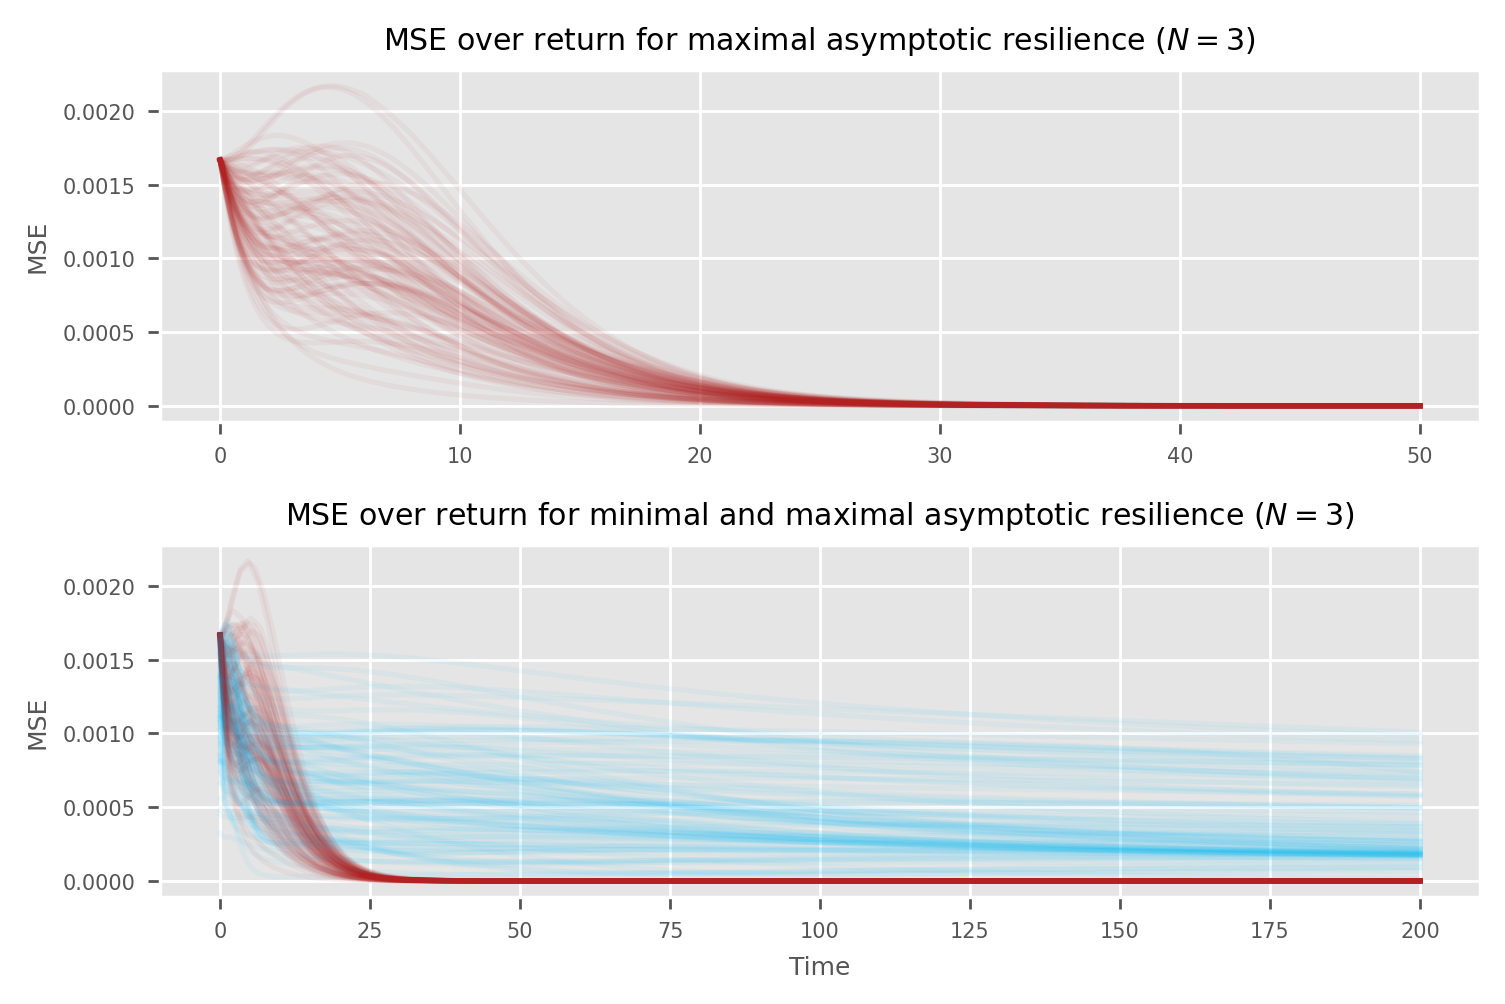

In [298]:
# N = 3
# Asymptotic resilience
sol3_C0_minRinf, mse3_C0_minRinf, sol3_C0_maxRinf, mse3_C0_maxRinf = OD_MSE_sim_plot(OD3_C0_unifD, time=(0,200), time_fast=(0,50), titles=True, stab_measure="R_inf", num_perts=100, pert_frac=0.1)


For reference, since the actual stability measures of the systems used for the plots above are obscured, the indices and values of the stability and diversity measures in question are provided here.

In [299]:
tidx = np.argmax(OD3_C0_unifD.R_inf)
print("For N=3, C_0 (Red)")
print("Maximal asymptotic resilience: {}".format(np.max(OD3_C0_unifD.R_inf).round(4)))
print("Corresponding species diversity: {}".format(OD3_C0_unifD.D_s[tidx,0].round(4)))

For N=3, C_0 (Red)
Maximal asymptotic resilience: 0.1353
Corresponding species diversity: 2.9619


In [308]:
tidx = np.argmin(OD3_C0_unifD.R_inf)
print("For N=3, C_0 (Blue)")
print("Minimal asymptotic resilience: {}".format(np.min(OD3_C0_unifD.R_inf).round(14)))
print("Corresponding species diversity: {}".format(OD3_C0_unifD.D_s[tidx,0].round(4)))

For N=3, C_0 (Blue)
Minimal asymptotic resilience: 7.238e-10
Corresponding species diversity: 1.1238


#### 3.5.3.b. MSE for max/min asymptotic resilience, $N=10$

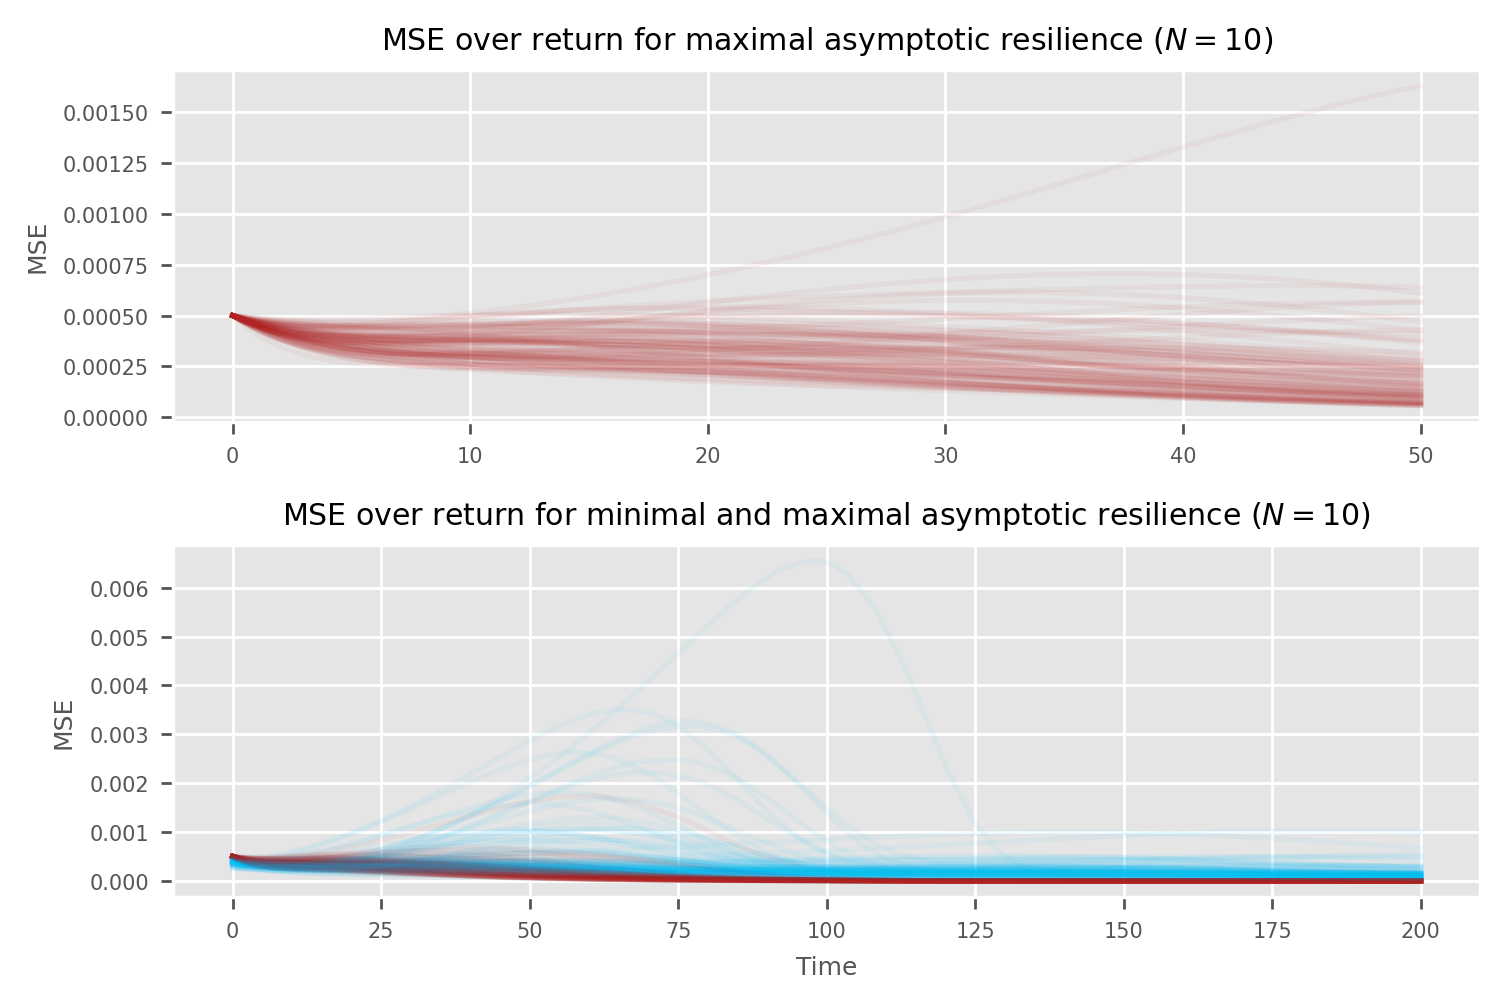

In [309]:
# N = 10
# Asymptotic resilience
sol10_C0_minRinf, mse10_C0_minRinf, sol10_C0_maxRinf, mse10_C0_maxRinf = OD_MSE_sim_plot(OD10_C0_unifD, time=(0,200), time_fast=(0,50), titles=True, stab_measure="R_inf", num_perts=100, pert_frac=0.1)


In [301]:
tidx = np.argmax(OD10_C0_unifD.R_inf)
print("For N=10, C_0 (Red)")
print("Maximal asymptotic resilience: {}".format(np.max(OD10_C0_unifD.R_inf).round(4)))
print("Corresponding species diversity: {}".format(OD10_C0_unifD.D_s[tidx,0].round(4)))

For N=10, C_0 (Red)
Maximal asymptotic resilience: 0.0239
Corresponding species diversity: 9.1822


In [306]:
tidx = np.argmin(OD10_C0_unifD.R_inf)
print("For N=10, C_0 (Blue)")
print("Minimal asymptotic resilience: {}".format(np.min(OD10_C0_unifD.R_inf).round(15)))
print("Corresponding species diversity: {}".format(OD10_C0_unifD.D_s[tidx,0].round(4)))

For N=10, C_0 (Blue)
Minimal asymptotic resilience: 5.814e-12
Corresponding species diversity: 2.5004


### 3.5.2. $C_{L_1}$

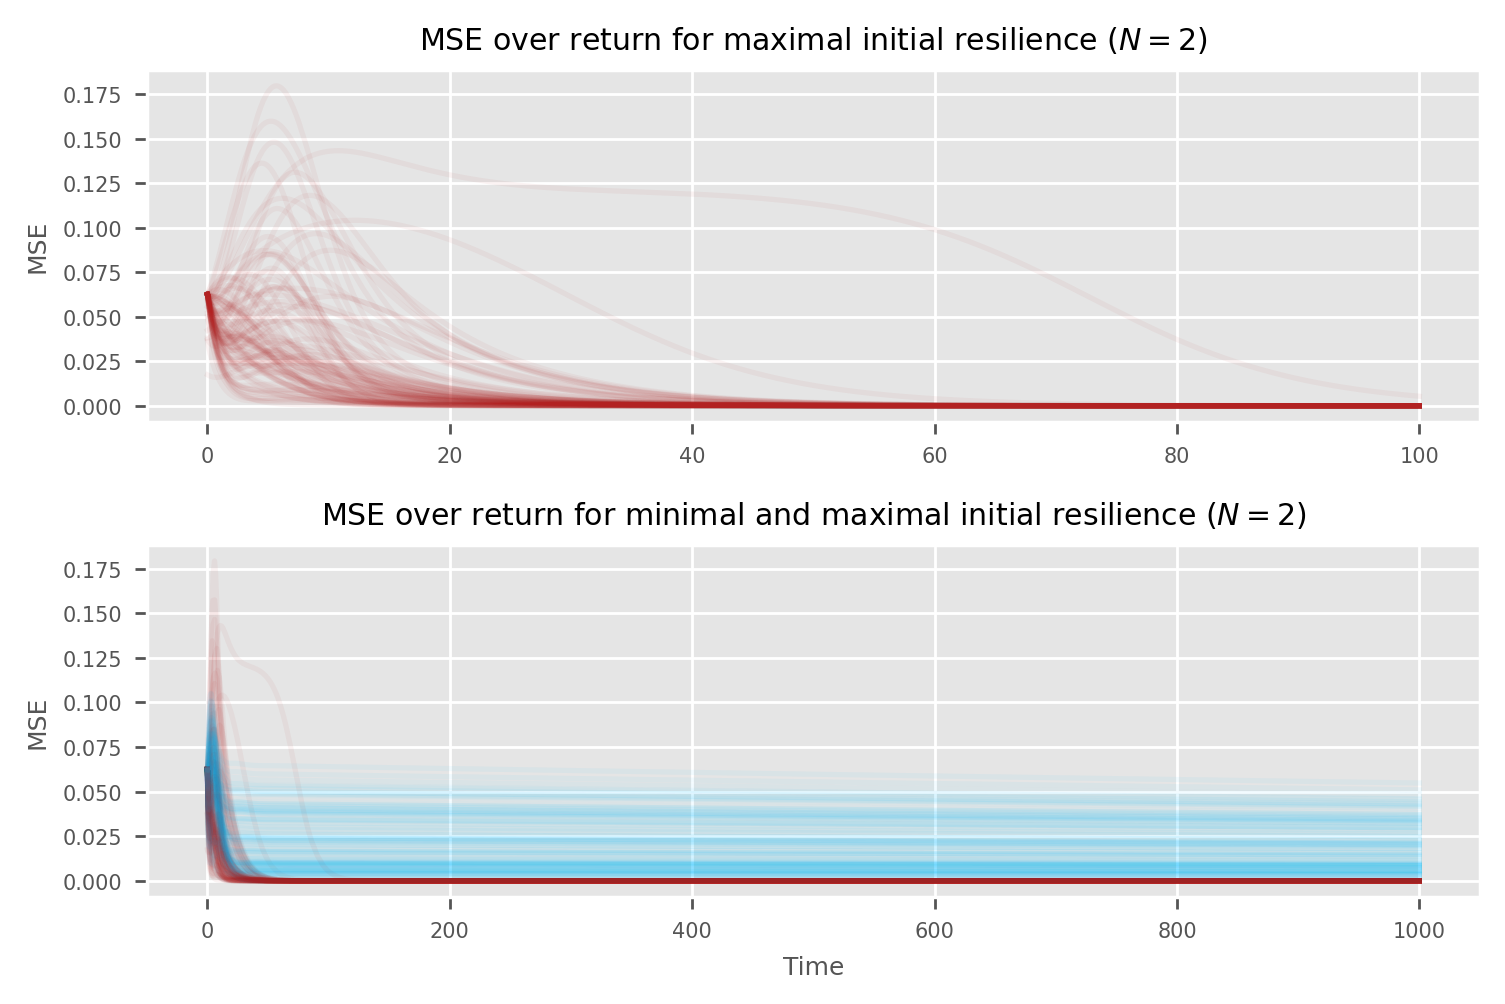

In [137]:
sol2_CL1_minR0, mse2_CL1_minR0, sol2_CL1_maxR0, mse2_CL1_maxR0 = OD_MSE_sim_plot(OD2_CL1_unifD, time=(0,1000), 
                                                                                 time_fast=(0,100), stab_measure="R_0", 
                                                                                 num_perts=100, pert_frac=0.5)



In [138]:
minR0_idx2 = np.argmin(OD2_CL1_unifD.R_0)

58

In [139]:
OD2_CL1_unifD.R_0[minR0_idx2]

-0.36685325127263474

In [140]:
OD2_CL1_unifD.D_s[minR0_idx2]

array([1.00955])

In [141]:
maxR0_idx2 = np.argmax(OD2_CL1_unifD.R_0)

988

In [142]:
OD2_CL1_unifD.R_0[maxR0_idx2]

-0.061337954023653996

In [143]:
OD2_CL1_unifD.D_s[maxR0_idx2]

array([1.931089])

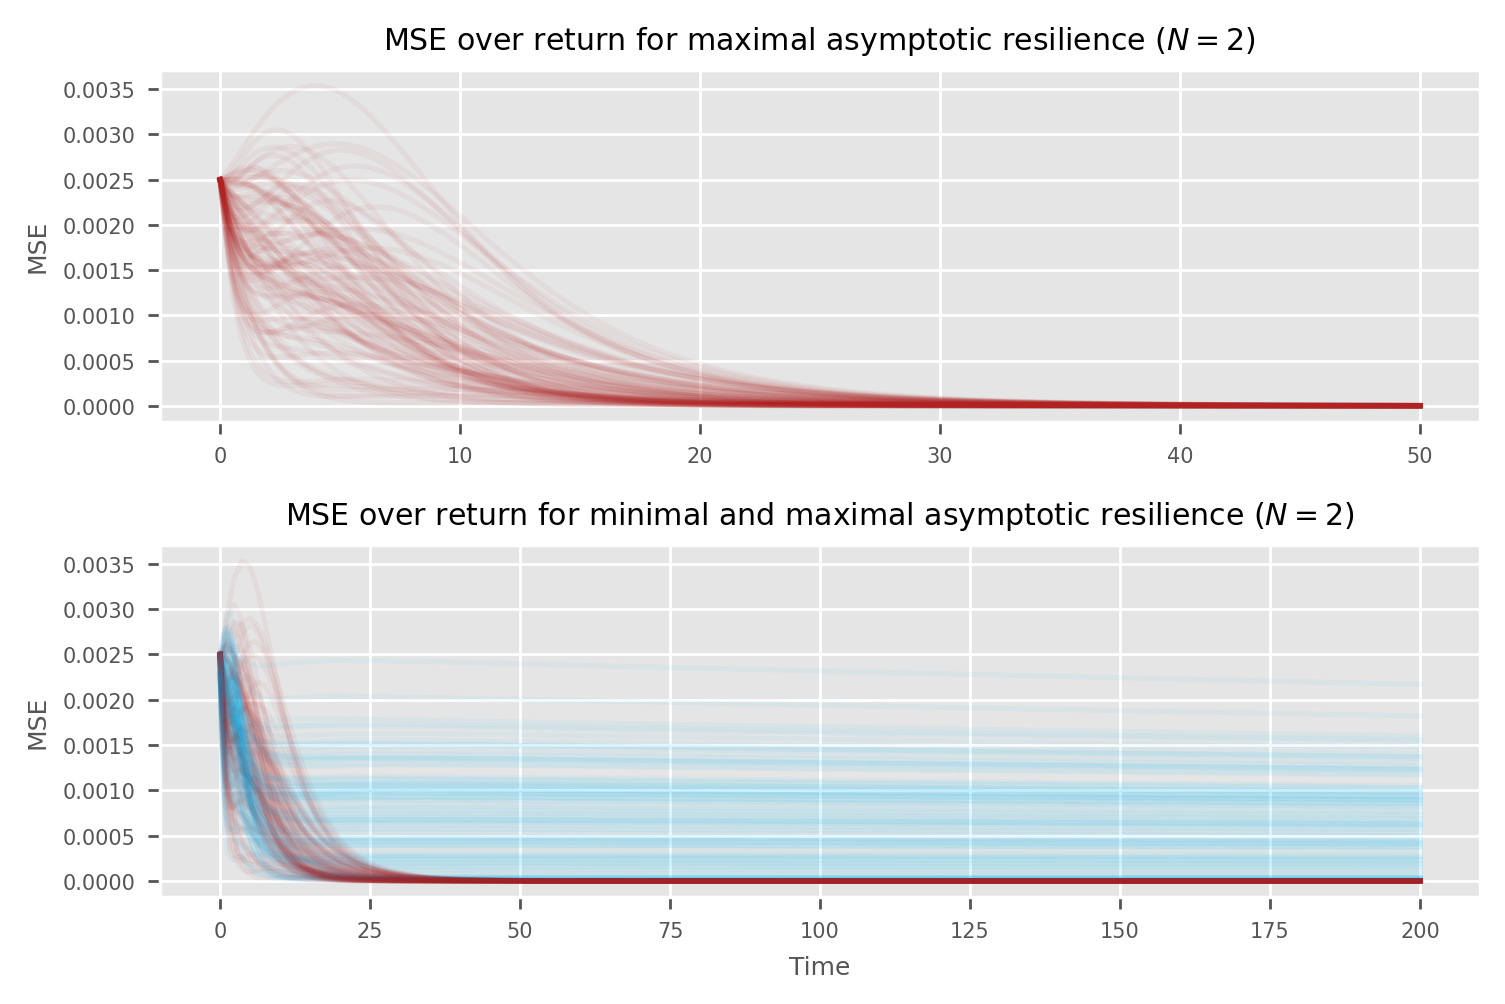

In [144]:
sol2_CL1_minRinf, mse2_CL1_minRinf, sol2_CL1_maxRinf, mse2_CL1_maxRinf = OD_MSE_sim_plot(OD2_CL1_unifD, time=(0,200), time_fast=(0,50), stab_measure="R_inf", num_perts=100, pert_frac=0.1)


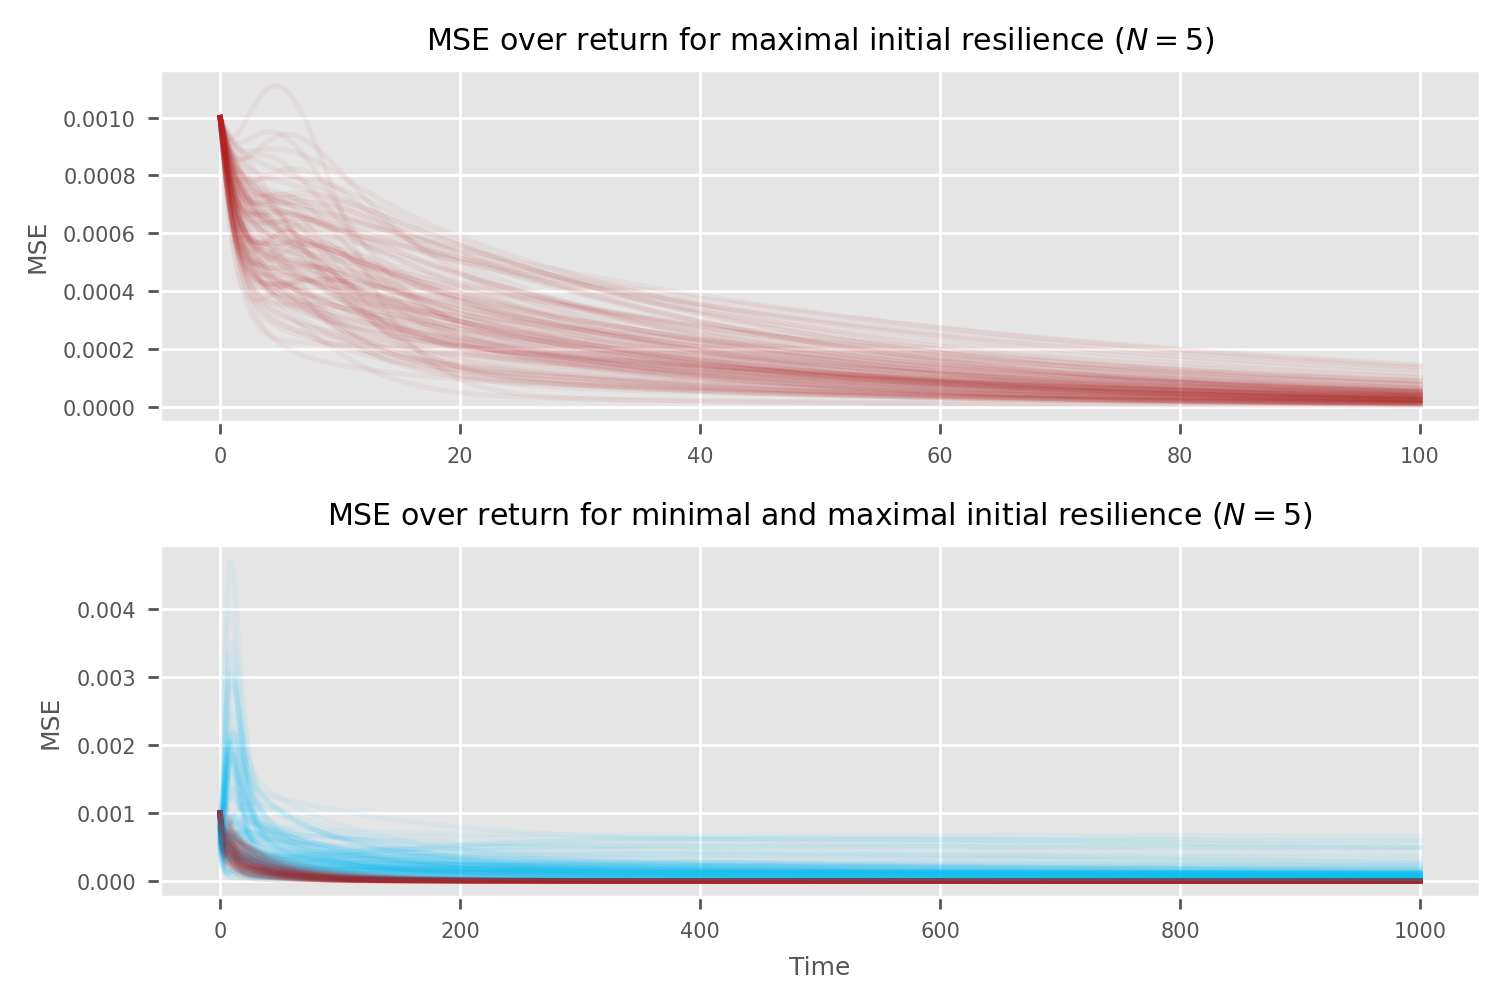

In [145]:
sol5_CL1_minR0, mse5_CL1_minR0, sol5_CL1_maxR0, mse5_CL1_maxR0 = OD_MSE_sim_plot(OD5_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_0", num_perts=100)


In [146]:
np.min(OD5_CL1_unifD.R_0)
np.max(OD5_CL1_unifD.R_0)

-0.3869264223608458

-0.045181228762895334

In [147]:
minR0_idx5 = np.argmin(OD5_CL1_unifD.R_0)
maxR0_idx5 = np.argmax(OD5_CL1_unifD.R_0)

In [148]:
OD5_CL1_unifD.D_s[minR0_idx5]
OD5_CL1_unifD.D_s[maxR0_idx5]

array([1.649307])

array([4.928008])

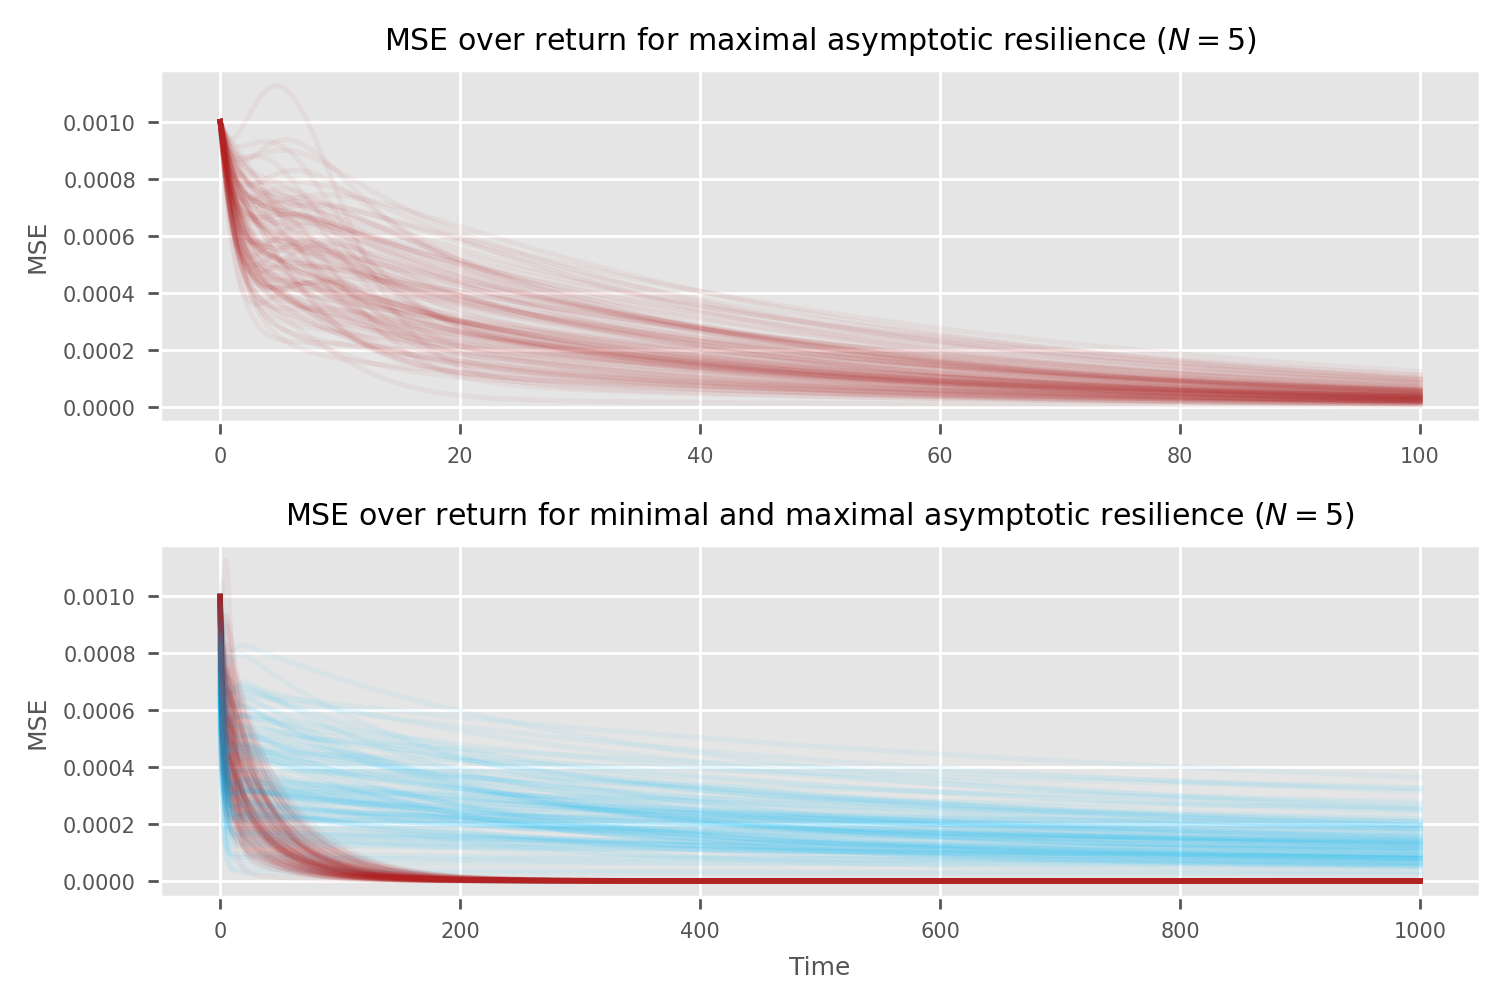

In [149]:
sol5_CL1_minRinf, mse5_CL1_minRinf, sol5_CL1_maxRinf, mse5_CL1_maxRinf = OD_MSE_sim_plot(OD5_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_inf", num_perts=100)


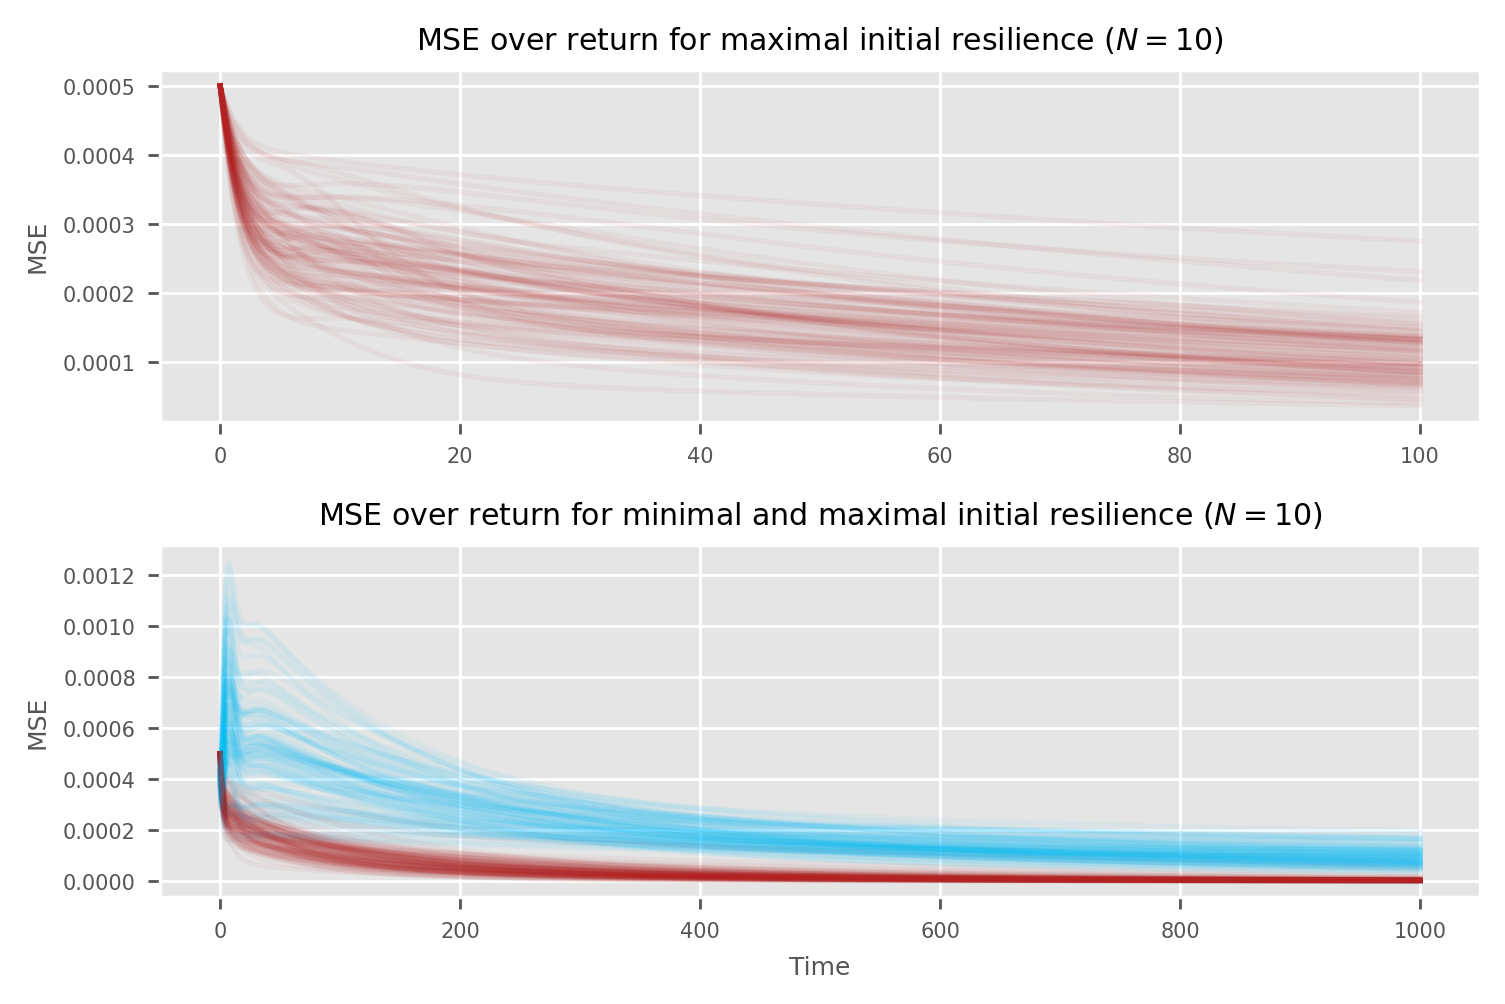

In [150]:
sol10_CL1_minR0, mse10_CL1_minR0, sol10_CL1_maxR0, mse10_CL1_maxR0 = OD_MSE_sim_plot(OD10_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_0", num_perts=100, pert_frac=0.1)


In [153]:
OD10_CL1_unifD.R_inf[np.argmin(OD10_CL1_unifD.R_0)]


4.773368659985866e-07

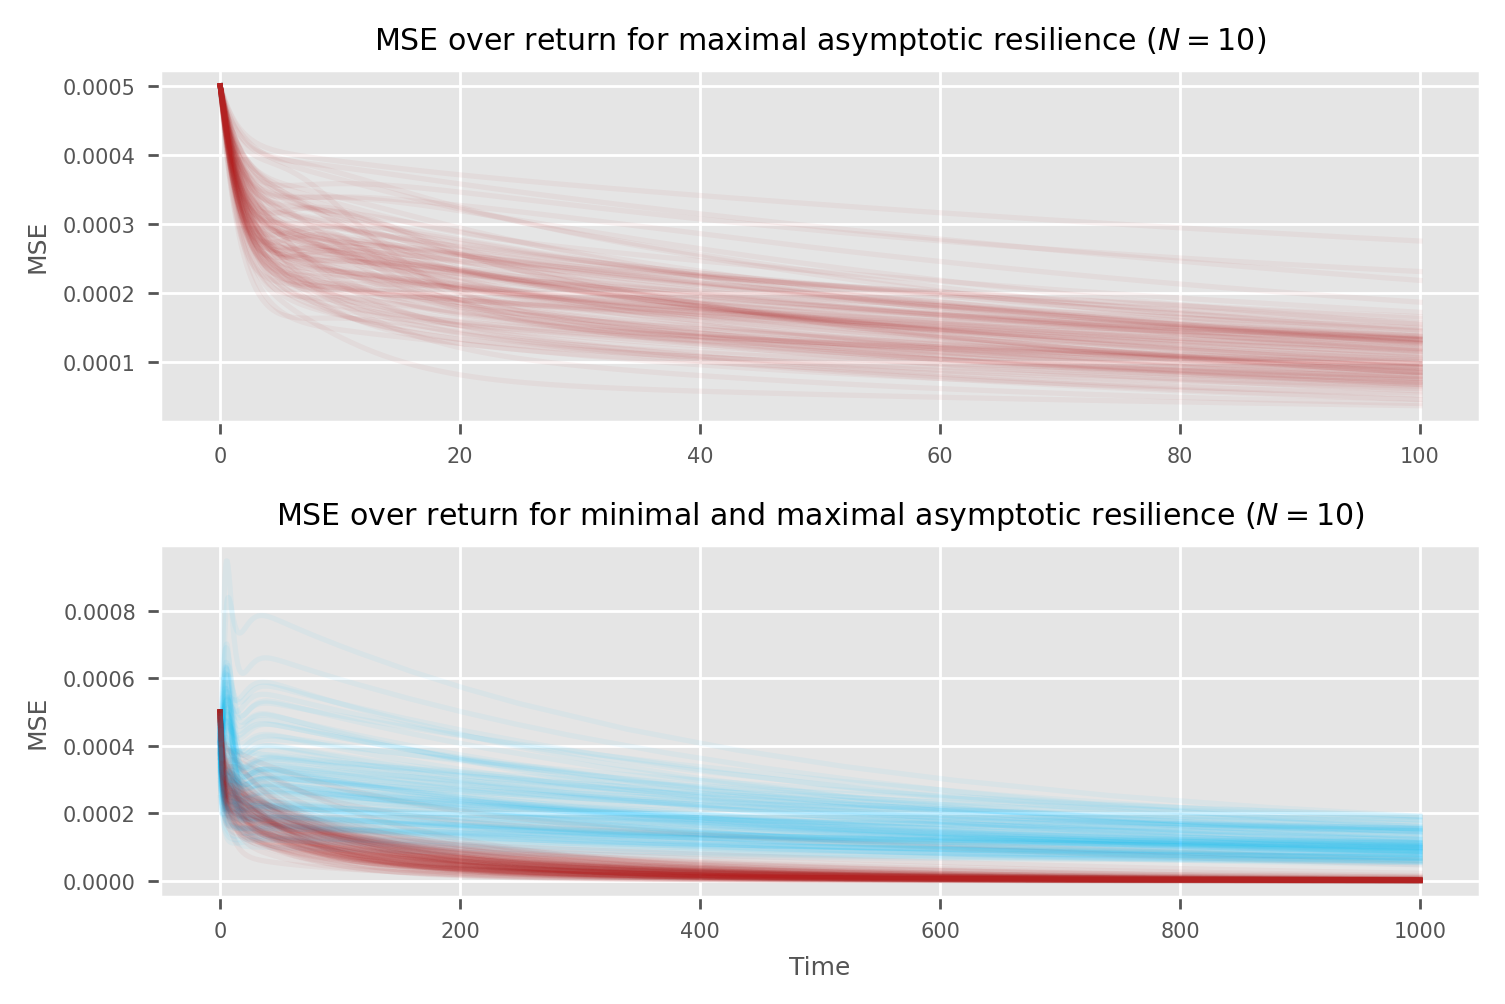

In [155]:
sol10_CL1_minR0, mse10_CL1_minR0, sol10_CL1_maxR0, mse10_CL1_maxR0 = OD_MSE_sim_plot(OD10_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_inf", num_perts=100, pert_frac=0.1)


### 3.5.3. $C_{L_2}$

#### 3.5.3.a. MSE for max/min asymptotic resilience, $N=3$

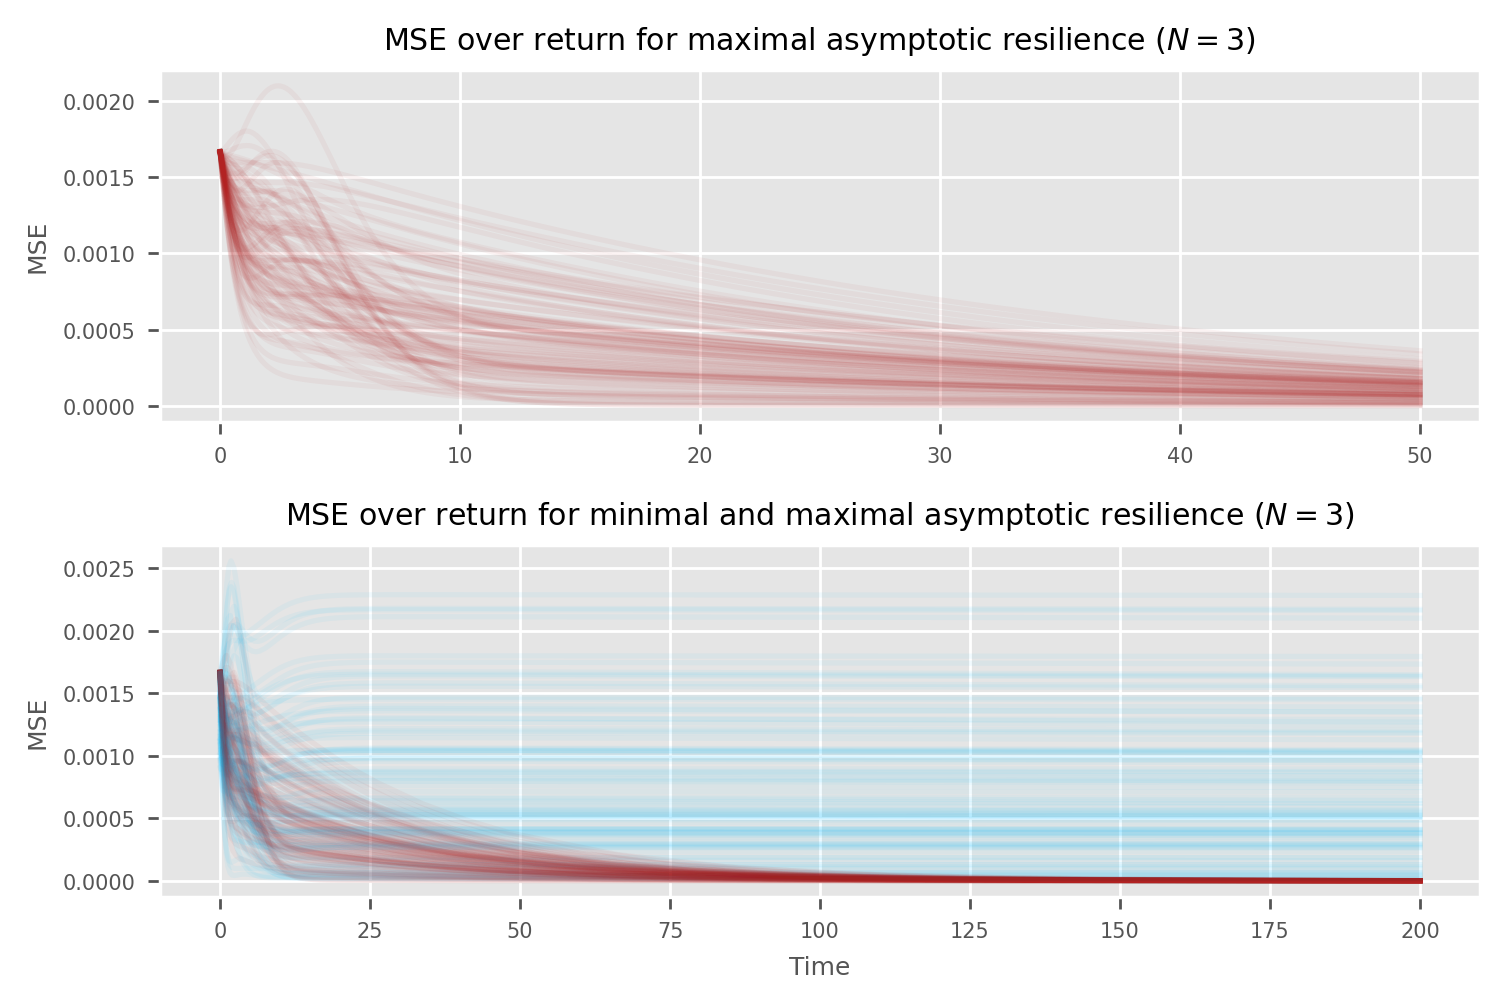

In [319]:
# Asymptotic Resilience
sol3_CL2_minRinf, mse3_CL2_minRinf, sol3_CL2_maxRinf, mse3_CL2_maxRinf = OD_MSE_sim_plot(OD3_CL2_unifD, time=(0,200), time_fast=(0,50), stab_measure="R_inf", num_perts=100, pert_frac=0.1)


In [325]:
tidx = np.argmax(OD3_CL2_unifD.R_inf)
print("For N=3, CL2 (Red)")
print("Maximal asymptotic resilience: {}".format(np.max(OD3_CL2_unifD.R_inf).round(5)))
print("Corresponding species diversity: {}".format(OD3_CL2_unifD.D_s[tidx,0].round(4)))

For N=3, CL2 (Red)
Maximal asymptotic resilience: 0.01641
Corresponding species diversity: 2.9546


In [324]:
tidx = np.argmin(OD3_CL2_unifD.R_inf)
print("For N=3, CL2 (Blue)")
print("Minimal asymptotic resilience: {}".format(np.min(OD3_CL2_unifD.R_inf).round(12)))
print("Corresponding species diversity: {}".format(OD3_CL2_unifD.D_s[tidx,0].round(4)))

For N=3, CL2 (Blue)
Minimal asymptotic resilience: 4.3604e-08
Corresponding species diversity: 1.111


#### 3.5.3.b. MSE for max/min asymptotic resilience, $N=10$

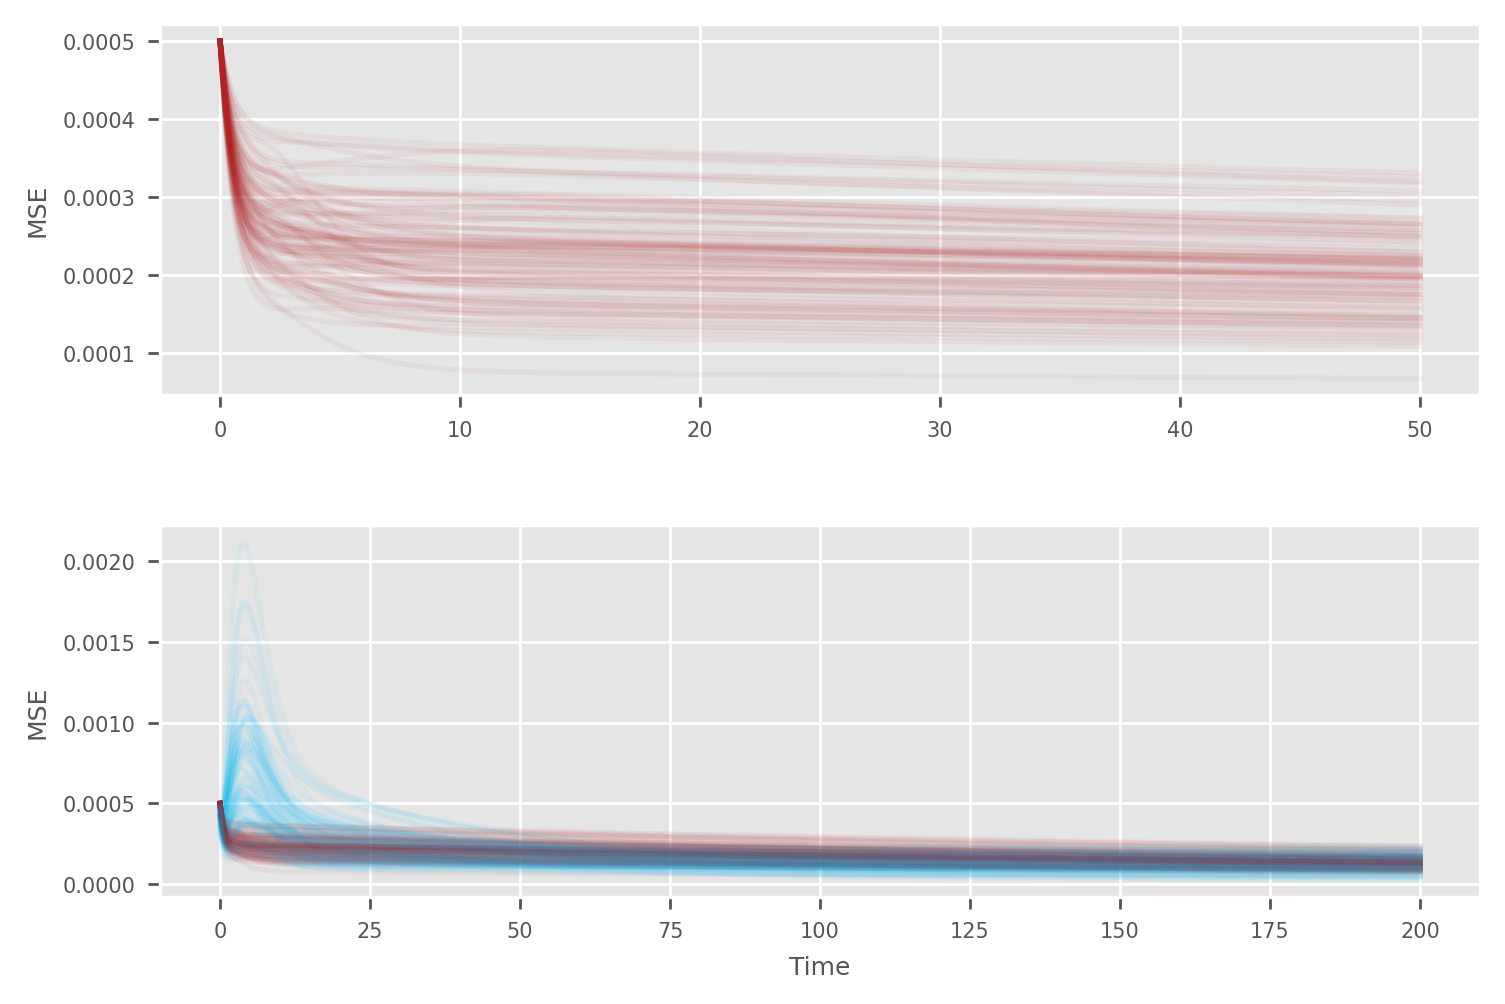

In [321]:
# Asymptotic Resilience
sol10_CL2_minRinf, mse10_CL2_minRinf, sol10_CL2_maxRinf, mse10_CL2_maxRinf = OD_MSE_sim_plot(OD10_CL2_unifD, time=(0,200), time_fast=(0,50), save_plots='./graphics/MSEs_OD10_CL2_Rinf', titles=False, stab_measure="R_inf", num_perts=100, pert_frac=0.1)

# Extending time to (0,250) shows how there is still difference. Keep at 200 to compare to other plots.


In [316]:
tidx = np.argmax(OD10_CL2_unifD.R_inf)
print("For N=10, CL2 (Red)")
print("Maximal asymptotic resilience: {}".format(np.max(OD10_CL2_unifD.R_inf).round(7)))
print("Corresponding species diversity: {}".format(OD10_CL2_unifD.D_s[tidx,0].round(4)))

For N=10, CL2 (Red)
Maximal asymptotic resilience: 0.0006764
Corresponding species diversity: 9.4264


In [315]:
tidx = np.argmin(OD10_CL2_unifD.R_inf)
print("For N=10, CL2 (Blue)")
print("Minimal asymptotic resilience: {}".format(np.min(OD10_CL2_unifD.R_inf).round(17)))
print("Corresponding species diversity: {}".format(OD10_CL2_unifD.D_s[tidx,0].round(4)))

For N=10, CL2 (Blue)
Minimal asymptotic resilience: 1.282e-14
Corresponding species diversity: 2.5163


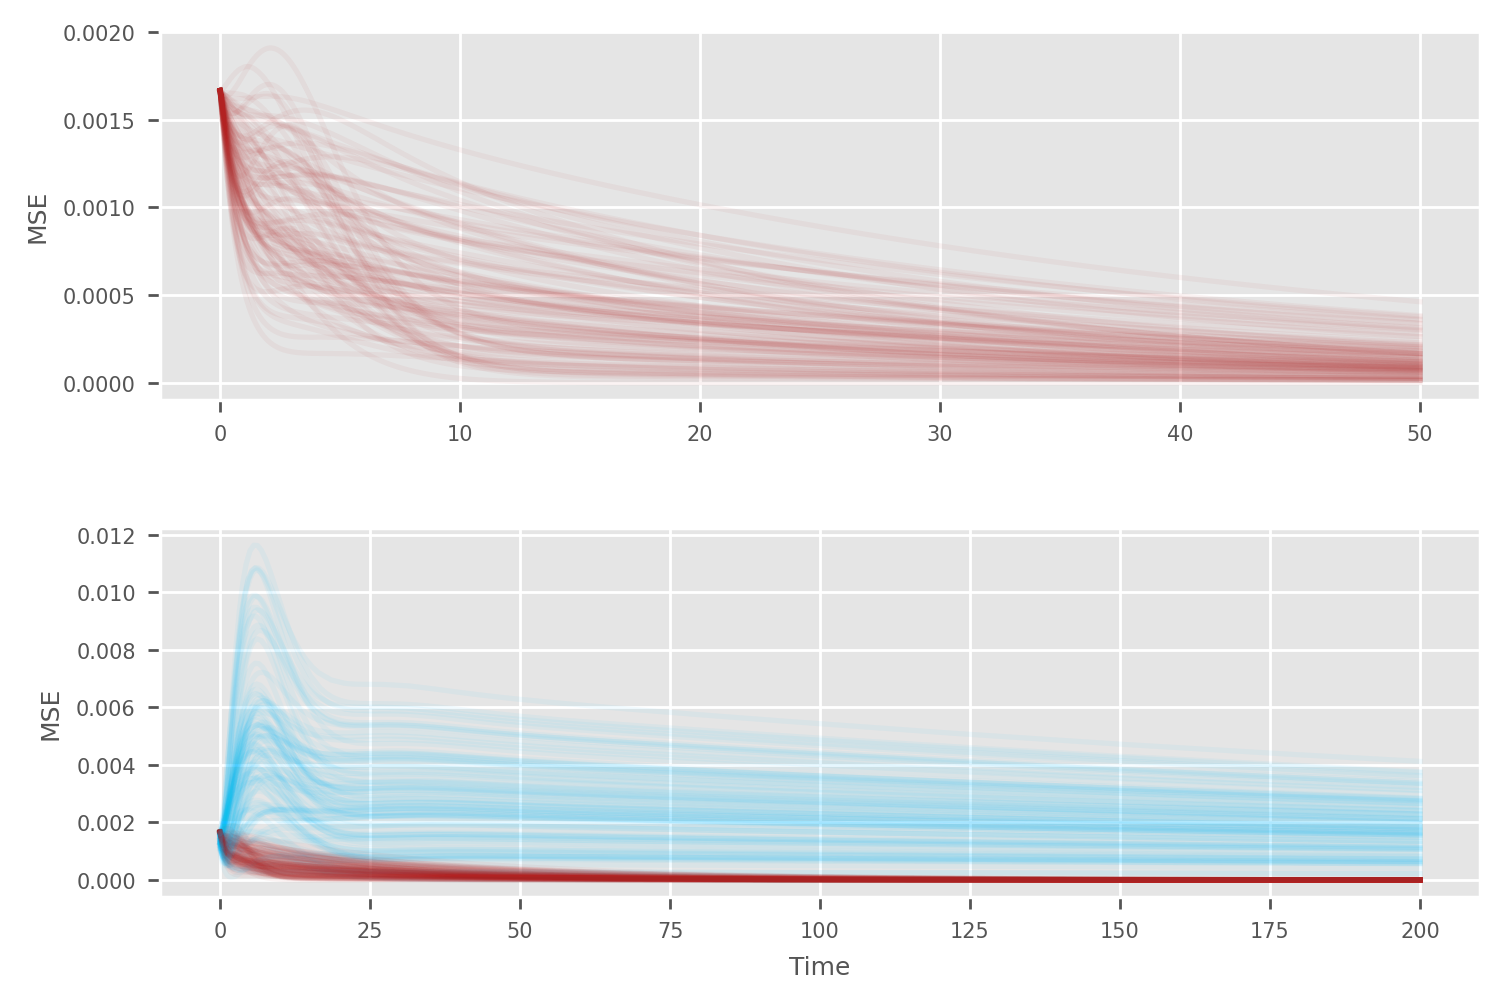

In [331]:
# Initial Resilience
_,_,_,_ = OD_MSE_sim_plot(OD3_CL2_unifD, time=(0,200), time_fast=(0,50), stab_measure="R_0", num_perts=100, pert_frac=0.1)


In [329]:
tidx = np.argmax(OD3_CL2_unifD.R_0)
print("For N=3, CL2 (Red)")
print("Maximal initial resilience: {}".format(np.max(OD3_CL2_unifD.R_0).round(5)))
print("Corresponding species diversity: {}".format(OD3_CL2_unifD.D_s[tidx,0].round(4)))

For N=3, CL2 (Red)
Maximal initial resilience: -0.08554
Corresponding species diversity: 2.8986


In [330]:
tidx = np.argmin(OD3_CL2_unifD.R_0)
print("For N=3, CL2 (Blue)")
print("Minimal initial resilience: {}".format(np.min(OD3_CL2_unifD.R_0).round(4)))
print("Corresponding species diversity: {}".format(OD3_CL2_unifD.D_s[tidx,0].round(4)))

For N=3, CL2 (Red)
Minimal initial resilience: -0.5452
Corresponding species diversity: 1.0559


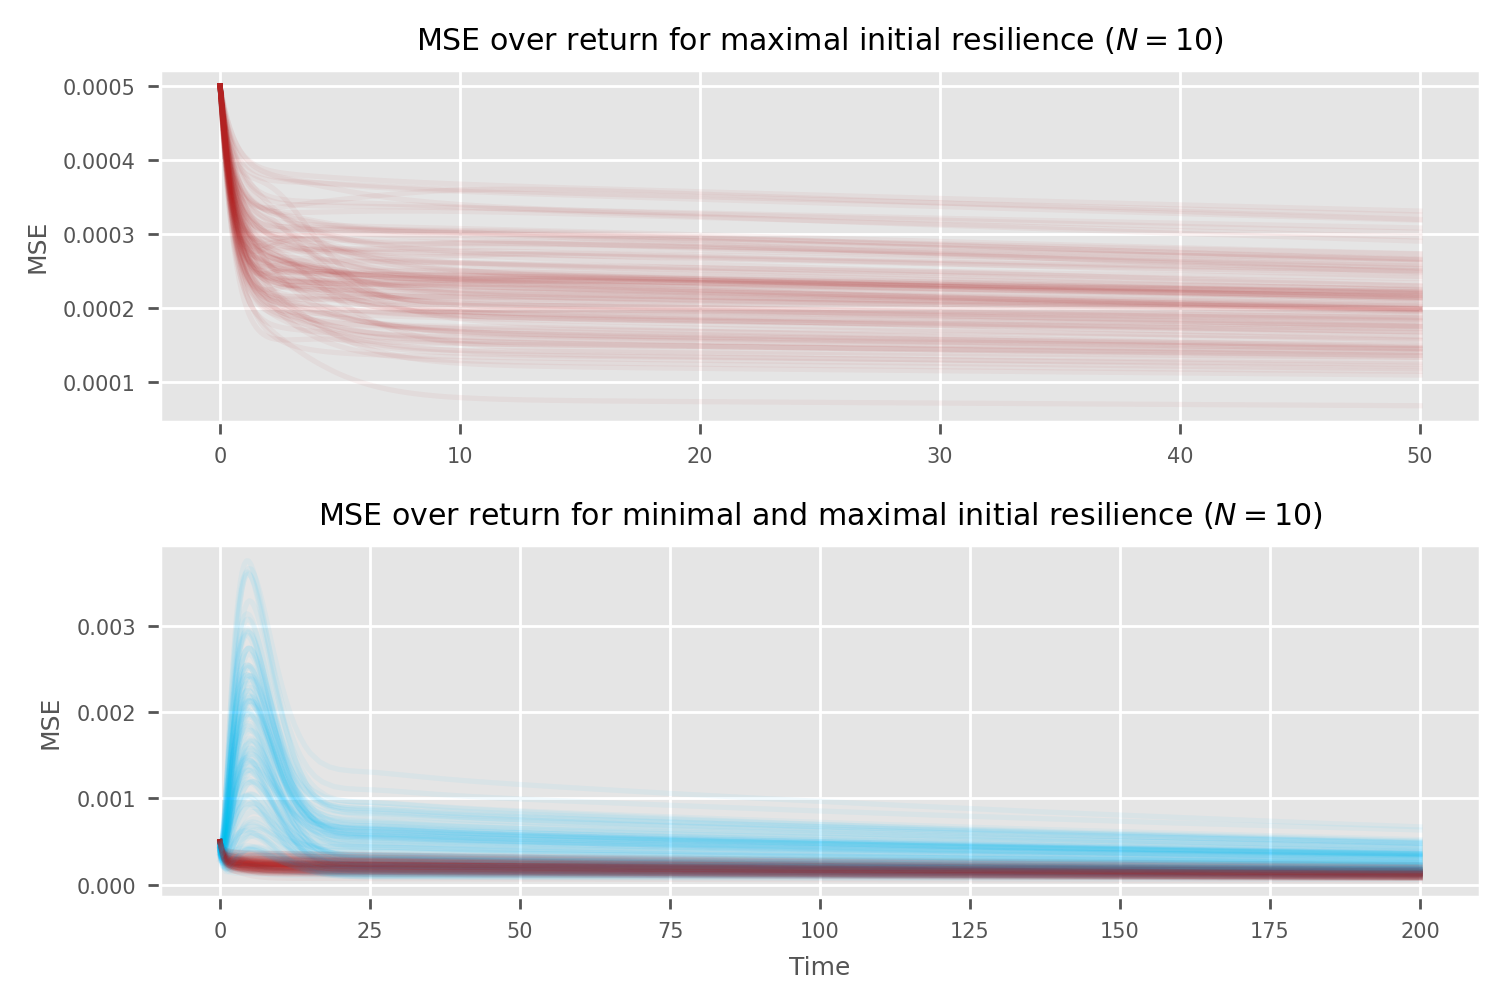

In [336]:
# Initial Resilience
_,_,_,_ = OD_MSE_sim_plot(OD10_CL2_unifD, time=(0,200), time_fast=(0,50), stab_measure="R_0", num_perts=100, pert_frac=0.1)


In [333]:
tidx = np.argmax(OD10_CL2_unifD.R_0)
print("For N=10, CL2 (Red)")
print("Maximal initial resilience: {}".format(np.max(OD10_CL2_unifD.R_0).round(5)))
print("Corresponding species diversity: {}".format(OD10_CL2_unifD.D_s[tidx,0].round(4)))

For N=10, CL2 (Red)
Maximal initial resilience: -0.11388
Corresponding species diversity: 9.4264


In [334]:
tidx = np.argmin(OD10_CL2_unifD.R_0)
print("For N=10, CL2 (Red)")
print("Minimal initial resilience: {}".format(np.min(OD10_CL2_unifD.R_0).round(4)))
print("Corresponding species diversity: {}".format(OD10_CL2_unifD.D_s[tidx,0].round(4)))

For N=10, CL2 (Red)
Minimal initial resilience: -1.1433
Corresponding species diversity: 1.7126


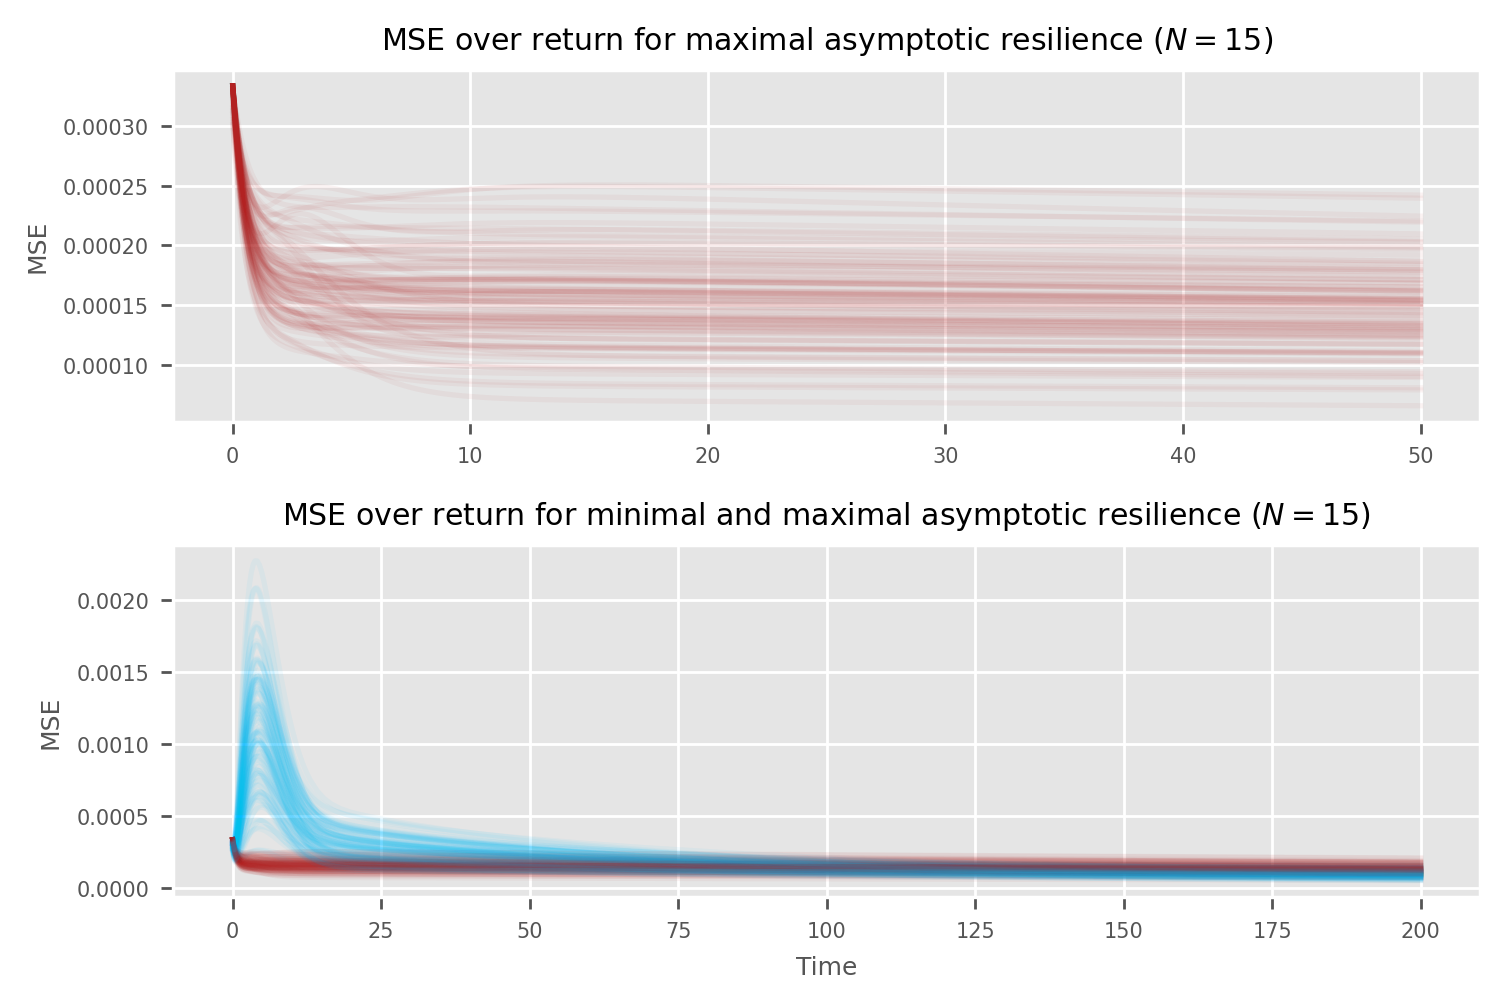

In [337]:
# Asymptotic Resilience
_,_,_,_ = OD_MSE_sim_plot(OD15_CL2_unifD, time=(0,200), time_fast=(0,50), stab_measure="R_inf", num_perts=100, pert_frac=0.1)

# Extending time to (0,250) shows how there is still difference. Keep at 200 to compare to other plots.


### 3.5.4. $C_{R_1}$

### 3.5.5. $C_{R_2}$

# 4. Generalized Lotka-Volterra (GLV)

In [156]:
from scipy.linalg import solve as slv # For calculating equilibrium populations of gLV.

from Lotka_Volterra_Tools import *

## 4.1. Making random, stable GLV systems

In [157]:
# Some example parameters for the following demo.
np.random.seed(667)
A = np.diag(np.random.uniform(-2,0,5))

eigvals(A)

B = np.random.uniform(-1,1, (100,5,5))
eps = 0.3

Ap = A + eps*B

# eigvals(Ap)

array([-1.026779, -1.604043, -0.943307, -1.262609, -0.43425 ])

### 4.1.1. GLV parameter back-calculation method

Given a community matrix $C$ that is known to be stable at equilibrium $X^*$, the following function `reverse_gLV_prams` back-calculates the inherent growth rates $\vec\alpha$ and interaction coefficient matrix $A$ of a GLV system stable at the same equilibrium.

Without any formulae for analytically guaranteeing stable $N$-species gLV systems, we instead generate these systems in reverse, starting with the community matrix. A diagonal matrix $A$ with negative entries is perturbed by a small scalar multiple $\eta$ of a matrix $B$ with *Unif*$(-1,1)$ entries. The resulting matrix sum is our community matrix already evaluated at equilibrium, and its eigenvalues are similar to those of the original diagonal matrix to a degree controllable by $\eta$. Large $\eta$ produces a greater variety of communities, but small $\eta$ is more likely to produce stable systems.

In [158]:
C = Ap # Test on this matrix

In [159]:
def reverse_gLV_prams(C_, X_eq):
    # np.random.seed(seed)
    # Seed? B/C random N_0 
    ### NOT ANYMORE
    k_ = C_.shape[0] # Need 3-dim array
    n_ = C_.shape[-1]
    
    # X_eq = np.random.uniform(X_eq_lo, X_eq_hi, (k_,n_,1))
    
    Coef = np.zeros((k_,n_,n_))
    
    DIs = np.diag_indices(n_)[0]
    # print(DIs)
    diag_X_eq = np.zeros((k_,n_,n_))
    diag_X_eq[:,DIs,DIs] = np.squeeze(1/X_eq)
    
    offDiag = dot_across(A=diag_X_eq, x=C_) # 3-dim
    
    Coef = offDiag # How mask indices simply? Like ~idx in pandas?
    Coef[:,DIs,DIs] = 0
    
    prod = np.squeeze(dot_across(Coef, X_eq)) # 2-dim
    alphas = -C_[:,DIs,DIs] - prod # 2-dim
    # alphas_copy = alphas.copy()
    # print(prod.shape)
    Coef[:,DIs,DIs] = -(alphas +  prod) / np.squeeze(X_eq)
    
    # equil check
    alphas = np.expand_dims(alphas, axis=2)
    

    return (alphas, Coef)

In [160]:
x,y,z = uniform_D(n=5, k=75000)

In [161]:
reverse = reverse_gLV_prams(C_=np.repeat(C, 10, axis=0), X_eq=x) # Test it out

In [162]:
a, b = reverse

In [163]:
np.max(np.abs((a.reshape(1000,5) * x + x * dot_across(b, x).reshape(1000,5))))

3.3306690738754696e-16

In [164]:
np.all(eigvals(C).real<0)

True


## 4.2. Numerically solving gLV

$$\dot{N_i}=r_i N_i (1-\frac{N_i}{k_i}) + N_i \sum_{j=1, j\neq i}^n \beta_{i,j} N_j $$

In [165]:
np.random.seed(667)
M1 = np.random.poisson(1, (4,5,5))
M2 = np.random.poisson(2, (4,5,5))

In [166]:
np.random.seed(667)
xs = np.random.uniform(0,1,(100,5,1)) # test vectors

In [167]:
# General, linearized dynamic system numerical solver.
def solve_linearized(A, N_0, its=100, h=0.1):
    # Step size, number of iterations, stack of community matrices, initial population(s?)
    k_ = A.shape[0]
    n_ = A.shape[-1]
    
    ys = np.zeros((k_, n_, its)) # (system idx, state var idx, iteration idx)
    # ys[:,:,0] = N_0.reshape(-1) # All same initial condition for ease. Lame and Bad.
    ys[:,:,0] = N_0.reshape(k_,n_) # Different initial conditions
    # t=0 # autonomous system
    for i in range(its-1):
        y_n = np.expand_dims(ys[:,:,i],-1)
        k1 = dot_across(A, y_n)
        k2 = dot_across(A, y_n + h*k1/2)
        k3 = dot_across(A, y_n + h*k2/2)
        k4 = dot_across(A, y_n + h*k3)
        
        ys[:,:,i+1] = np.squeeze(y_n + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h)

    return ys

In [168]:
np.random.seed(667)
pert = np.random.uniform(-1,1,(x.shape[0],x.shape[1], 1))

PERT = np.linalg.norm(pert / np.linalg.norm(pert, axis=1)[:,None,:], axis=1) # Unit perturbation from desired equilibrium; init condition for sim to verify


In [169]:
# Do the actual gLV equations, then.
def gLV(X_, A_, r_): # only takes interaction matrix, intrinsic growth, and current populations
    k_ = A_.shape[0]
    n_ = A_.shape[-1]
    
    deltaX = np.zeros((k_,n_,1))
    deltaX = X_.reshape(k_,n_,1) * (r_ + dot_across(A_,X_)).reshape(k_,n_,1)
    
    return deltaX

In [170]:
# gLV(X_=x+PERT, A_=b, r_=a).shape

# full_soln = solve_ivp(fun=gLV, t_span=[0,10], y0=x+PERT, args = (b, a))

In [171]:
# Use RK4 on stack of systems to get their equilibria.
def solve_gLV(A, r, N_0, its=200, h=0.1):
    # Step size, number of iterations, stack of community matrices, initial population(s?)
    k_ = A.shape[0]
    n_ = A.shape[-1]
    
    ys = np.zeros((k_, n_, its)) # (system idx, state var idx, iteration idx)
    # ys[:,:,0] = N_0.reshape(-1) # All same initial condition for ease. Lame and Bad.
    ys[:,:,0] = N_0.reshape(k_,n_) # Different initial conditions
    for i in range(its-1):
        # y_n = np.expand_dims(ys[:,:,i],-1)
        y_n = ys[:,:,i].reshape(k_,n_,1)
        k1 = gLV(X_=y_n, A_=A, r_=r)
        k2 = gLV(X_=y_n + h*k1/2, A_=A, r_=r)
        k3 = gLV(X_=y_n + h*k2/2, A_=A, r_=r)
        k4 = gLV(X_=y_n + h*k3, A_=A, r_=r)
                
        ys[:,:,i+1] = np.squeeze(y_n + (1./6)*(k1 + 2*k2 + 2*k3 + k4)*h)

    return ys

## 4.3. GLV system class

In [172]:
class gLVsystem:
    '''
    Lotka-Volterra systems + their community matrices and equilibria + Arnoldi Measures.
    -------------------------------------------------------
    Specify:
    k, number of systems
    n, number of species
    M1_bounds, (lower,upper) interval for Unif distribution of desired eigenvalues
    M2_bounds, (lower,upper) interval for Unif distribution of perturbation matrix entries
    
    '''
    def __init__(self, k_=1000, superk=75000, n_=5, eps_=0.3, M1_bounds_=(-2,0), M2_bounds_=(-1,1), N_star_bounds_=(10,20), seed_=667):
        self.k = k_
        self.n = n_
        self.eps = eps_
        self.seed = seed_
        self.M1_bounds = M1_bounds_
        self.M2_bounds = M2_bounds_
        self.N_star_bounds = N_star_bounds_

        nDIs = np.diag_indices(n_)[0]
        kDIs = np.diag_indices(k_)[0]    
        
        np.random.seed(self.seed)
        self.M1 = np.zeros((self.k,self.n,self.n))
        self.M1[:,nDIs,nDIs] = np.random.uniform(self.M1_bounds[0], self.M1_bounds[1], (self.k,self.n))
        self.M2 = np.random.uniform(self.M2_bounds[0], self.M2_bounds[1], (self.k,self.n,self.n))
        self.J = self.M1 + self.eps*self.M2
        
        self.n_star, self.D, self.bins = uniform_D(n=self.n, k=superk, seed_=self.seed)
        # print(self.n_star.shape)
        self.n_star = self.n_star.reshape(self.k, self.n, 1)
        self.N_star = self.n_star * self.N_star_bounds[0]
        
        self.r, self.A = reverse_gLV_prams(C_=self.J, X_eq=self.N_star)
        
        self.stable_idx = np.where(np.all(eigvals(self.J).real<0,axis=-1))[0]
        # Still do all calculations, then just plot using self.stable_idx
        ## Make more efficient later by only calc'ing stability, diversity measures for stable systems
        
        ### Arnoldi Measures ###
        self.R_0 = init_res(self.J)
        self.R_inf = asym_res(self.J)
        self.I_S = np.zeros(self.k)
        for i in range(self.k):
            self.I_S[i] = stoch_invar(self.J[i,:,:])
        self.I_D = np.zeros(self.k)
        for i in range(self.k):
            self.I_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(self.J[i,:,:]), method='brent').fun

        ### Diversity Measures ###
        # self.n_star = sum_to_one(self.N_star)

        self.simpson = simpson_conc(self.n_star)
        self.shannon = shannon_entropy(self.n_star)
        self.gini_simp = gini_simpson_index(self.n_star)
        self.hcdt_entropy = hcdt_entropy(self.n_star, q=2)
        self.renyi_entropy = renyi_entropy(self.n_star, q=2)
        # self.D = 1/(1-self.gini_simp)
        

In [173]:
def gLV_stab_div_plot(gLV, div_idx_=list(range(6)), fsize=(7,6), res = 250, fontsize=4, opacity=0.65, q=2, lowess_frac=None, lowess_col='black', s_=3, one_col=None, save_as=None, img_type='pdf'):
    q_renyi=q # Can choose a different q for these Div. measures than what you chose in object initialization.
    q_hcdt=q
    # q_renyi = int(input('q (order of diversity) for Renyi entropy?'))
    # q_hcdt = int(input('q for HCDT entropy?'))
    hcdt = hcdt_entropy(gLV.n_star, q=q_hcdt)
    renyi = renyi_entropy(gLV.n_star, q=q_renyi)

    xlist = np.array([gLV.simpson.flatten(), gLV.shannon.flatten(), gLV.gini_simp.flatten(), hcdt.flatten(), renyi.flatten(), gLV.D], dtype=object)
    # xlist = np.array([gLV.D], dtype=object)

    xlist = list(xlist[div_idx_]) # Can only index with list on a np.array(), not on another list
    xnames = np.array(['Simpson', 'Shannon', 'Gini-Simpson', r'HCDT, q={}'.format(q_hcdt), 'Renyi, q={}'.format(q_renyi), 'D, Numbers Equivalent'])
    xnames = list(xnames[div_idx_])
    ylist = [gLV.R_0, gLV.R_inf, gLV.I_S, gLV.I_D]
    ynames = [r'$\mathcal{R}_0$', r'$\mathcal{R}_{\infty}$', r'$\mathcal{I}_S$', r'$\mathcal{I}_D$']

    plt.figure(figsize=fsize, dpi=res)
    plt.style.use('ggplot')
    mpl.rcParams.update({'font.size': fontsize})
    thetitle = 'Stability against diversity in gLV ($n=${})'.format(gLV.n)
    if (one_col==None):
        if lowess_frac:
            thetitle = thetitle + '\nLOWESS with fraction {}'.format(np.round(lowess_frac,3))
        plt.suptitle(thetitle);

    # colors = np.array(['#FFB000', '#fc8d59', '#91bfdb', '#d73027', '#4575b4', '#000000'])
    colors = np.array(['#FFB000', '#fc8d59', 'deepskyblue', '#d73027', '#4575b4', '#000000'])

    colors = list(colors[div_idx_])

    dimx = len(xlist)
    dimy = len(ylist)

    for i,stab in enumerate(ylist):
        for j,divind in enumerate(xlist):
            # print(divind)
            plt.subplot(dimy,dimx,i*dimx+j+1)
            if (i!=dimy-1):
                plt.tick_params('x', which='both', bottom=False, labelbottom=False);
            if (one_col==None):
                plt.scatter(divind[gLV.stable_idx], stab[gLV.stable_idx], s = s_, alpha=opacity, color = colors[j%dimx]);
            else:
                plt.scatter(divind[gLV.stable_idx], stab[gLV.stable_idx], s = s_, alpha=opacity, color = one_col);
            if lowess_frac:
                w = lowess(stab[gLV.stable_idx].reshape(-1), divind[gLV.stable_idx].reshape(-1), frac=lowess_frac)
                if j != (dimx-1):
                    plt.plot(w[:,0], w[:,1], c='black', linestyle='dashed', linewidth=0.5, alpha=1.00)
                else:
                    plt.plot(w[:,0], w[:,1], c='black', linestyle='dashed', linewidth=0.5, alpha=1.00)
            if j%dimx == 0:
                plt.ylabel(ynames[i]);
            if i == dimy-1:
                plt.xlabel(xnames[j]);

    plt.tight_layout();
    
    if (save_as!=None):
        plt.savefig(save_as+'.{}'.format(img_type), format=img_type)

In [174]:
D_1(OD2_C0_unifD.S_star)[:5]

array([[1.082926],
       [1.042472],
       [1.055557],
       [1.032333],
       [1.050887]])

In [175]:
# Run to load from local.
with open(r'.\gLV_Systems/gLV2_unifD.gLVsystem', 'rb') as gLV_obj:
    gLV2_unifD = pickle.load(gLV_obj)
with open(r'.\gLV_Systems/gLV3_unifD.gLVsystem', 'rb') as gLV_obj:
    gLV3_unifD = pickle.load(gLV_obj)
with open(r'.\gLV_Systems/gLV5_unifD.gLVsystem', 'rb') as gLV_obj:
    gLV5_unifD = pickle.load(gLV_obj)
# with open(r'./gLV10.gLVsystem', 'rb') as gLV_obj:
#     gLV10 = pickle.load(gLV_obj)
# with open(r'./gLV15.gLVsystem', 'rb') as gLV_obj:
#     gLV15 = pickle.load(gLV_obj)
# with open(r'./gLV20.gLVsystem', 'rb') as gLV_obj:
#     gLV20 = pickle.load(gLV_obj)
    
# r'E:\Progrumping\Microbiome\OD20.ODsystem'

In [200]:
gLV3 = gLVsystem(n_=3, eps_=0.2)

In [176]:
gLV2_unifD = gLVsystem(n_=2, eps_=0.2)

In [177]:
gLV3_unifD = gLVsystem(n_=3, eps_=0.2)

In [178]:
gLV5_unifD = gLVsystem(n_=5, superk=100000, eps_=0.2)

In [179]:
np.mean(gLV5_unifD.R_0)

0.2727423607667685

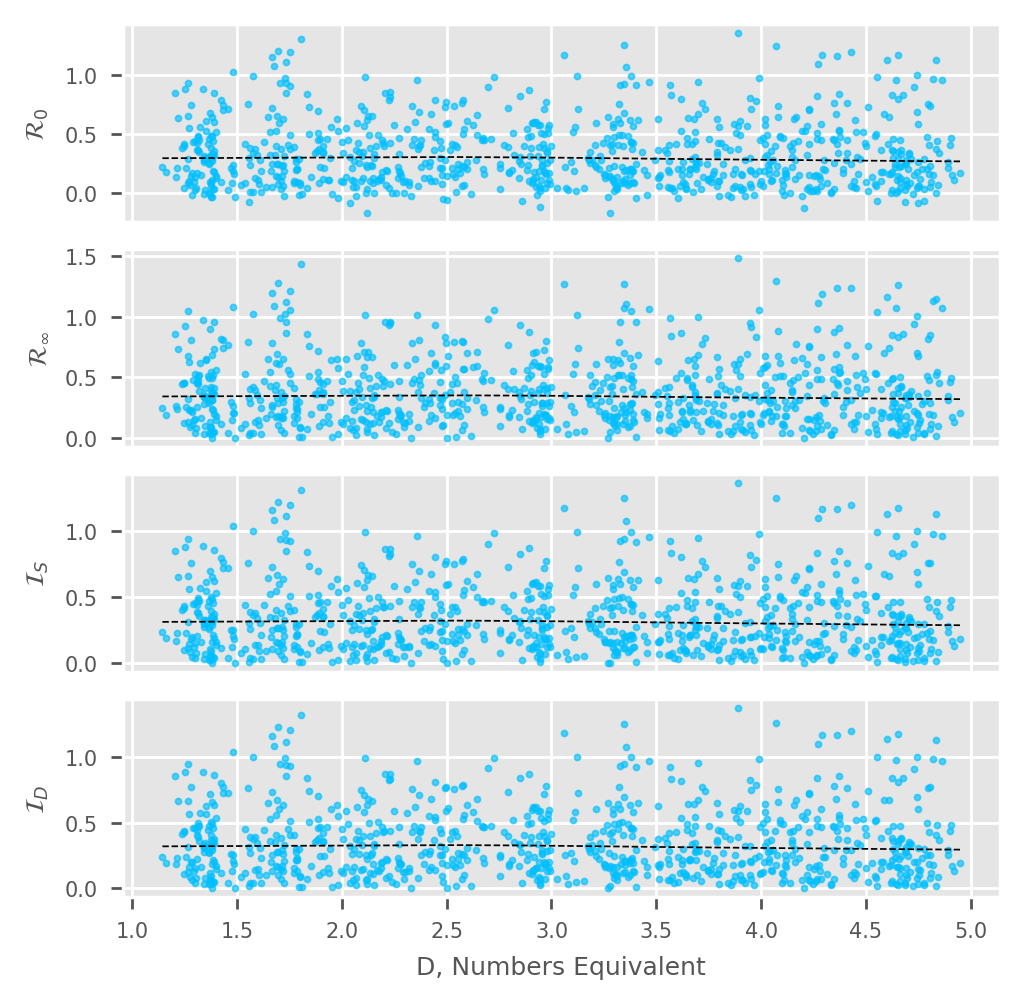

In [180]:
gLV_stab_div_plot(gLV5_unifD, fsize=(4,4), div_idx_=[-1], one_col = 'deepskyblue', 
                 s_=3, fontsize=6, lowess_frac=2./3)


In [181]:
# gLV10_unifD = gLVsystem(n_=10,superk=20000000, eps_=0.2, seed_=1)

In [182]:
# gLV15_unifD = gLVsystem(n_=15, eps_=0.2)

In [183]:
# plt.hist(gLV2.D, bins=gLV2.bins);

In [184]:
np.mean(np.abs(gLV2_unifD.I_S - gLV2_unifD.I_D))

0.0016098266387850311

In [185]:
np.mean(np.abs(gLV2_unifD.I_S - gLV2_unifD.I_D))

0.0016098266387850311

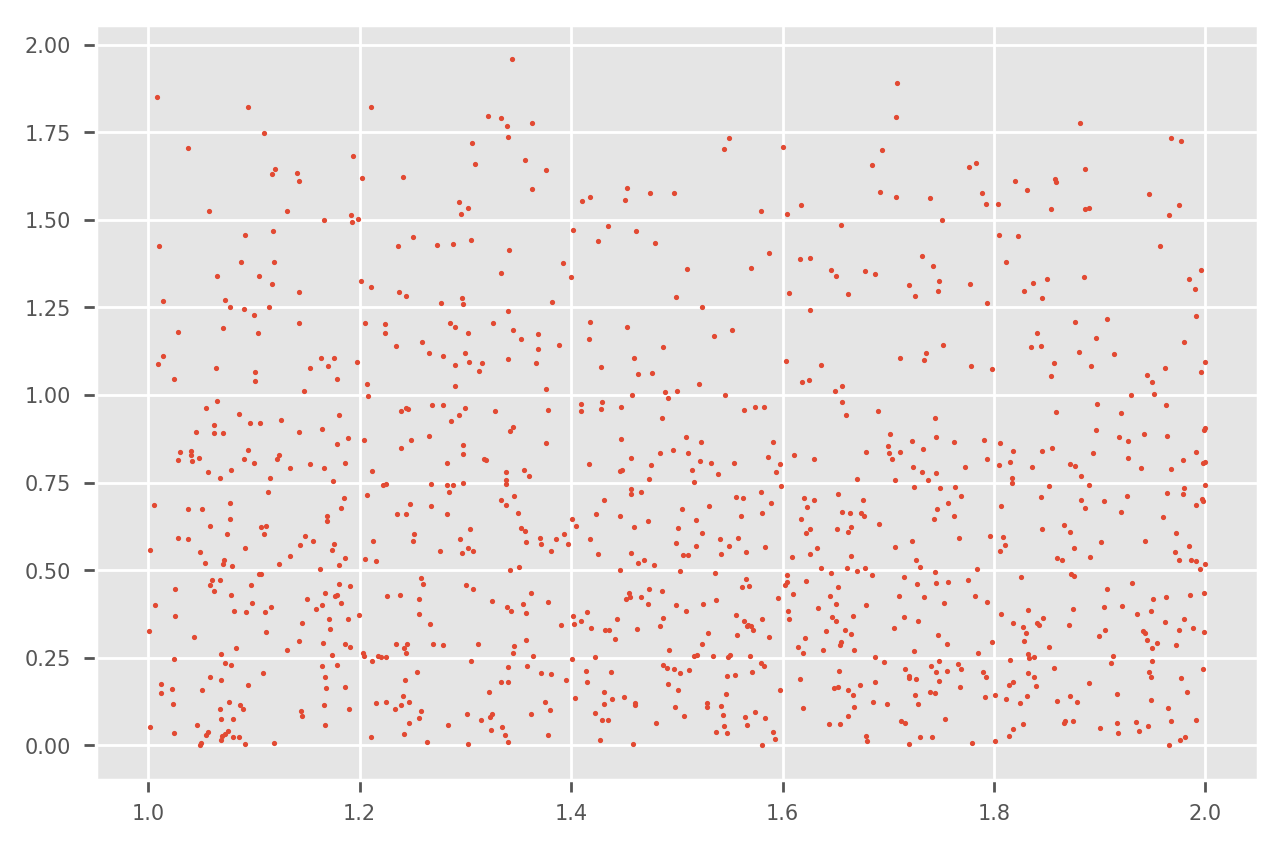

In [186]:
plt.scatter(gLV2_unifD.D, y=gLV2_unifD.I_S, s=1);

In [187]:
# # Run to save objects locally once calculated
# with open(r'.\gLV_Systems\gLV2_unifD.gLVsystem', 'wb') as gLV2_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV2_unifD, gLV2_obj)
# with open(r'.\gLV_Systems\gLV3_unifD.gLVsystem', 'wb') as gLV3_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV3_unifD, gLV3_obj)
# with open(r'.\gLV_Systems\gLV5_unifD.gLVsystem', 'wb') as gLV5_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV5_unifD, gLV5_obj)
# # with open(r'\gLV10.gLVsystem', 'wb') as gLV10_obj: # (w)rite in (b)inary mode
# #     pickle.dump(gLV10, gLV10_obj)
# # with open(r'\gLV15.gLVsystem', 'wb') as gLV15_obj: # (w)rite in (b)inary mode
# #     pickle.dump(gLV15, gLV15_obj)
# # with open(r'\gLV20.gLVsystem', 'wb') as gLV20_obj: # (w)rite in (b)inary mode
# #     pickle.dump(gLV20, gLV20_obj)

## Counterexample to Random systems

In [196]:
np.random.seed(667)
random_Dens3 = np.random.uniform(10,20,(1000,3,1))

In [197]:
random_Ds3 = D_1(sum_to_one(random_Dens3))

In [198]:
random_Ds3.shape

(1000, 1)

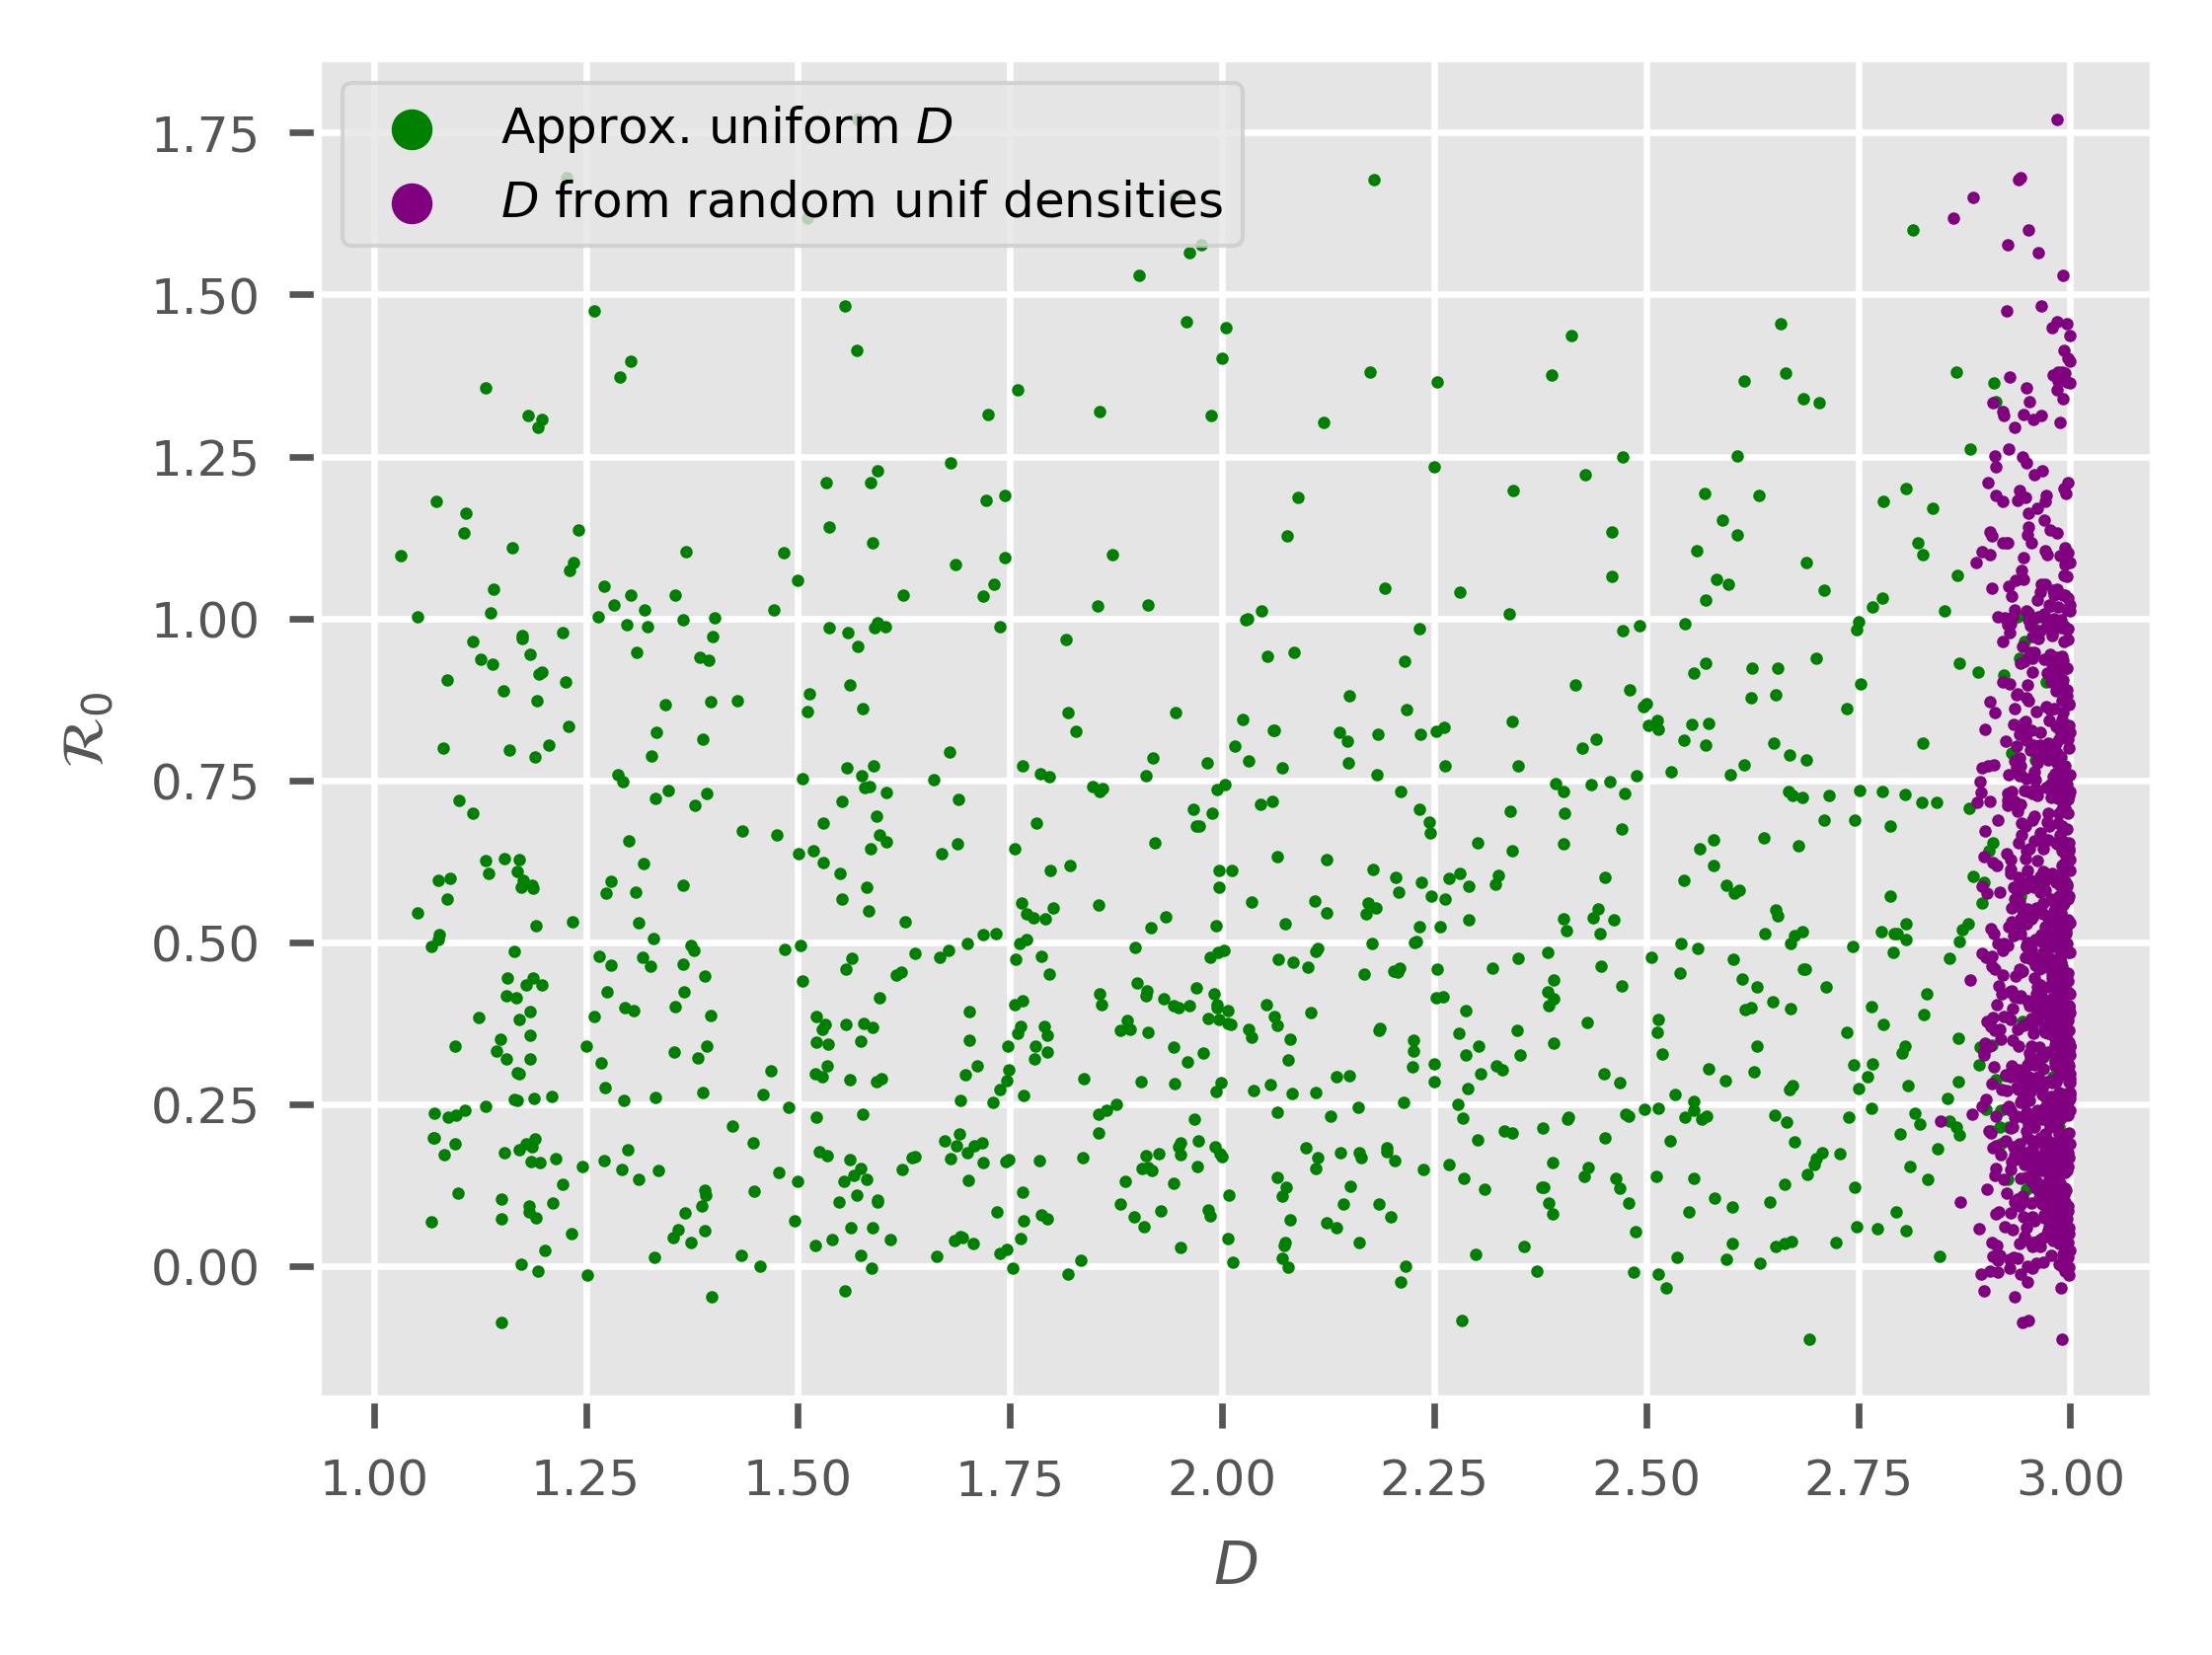

In [201]:
# Use a more fair distribution of D values
plt.figure(figsize=(4,3), dpi=600);
plt.scatter(x=gLV3_unifD.D[gLV3_unifD.stable_idx[:1000]], y=gLV3_unifD.R_0[gLV3_unifD.stable_idx[:1000]], s=1, label=r'Approx. uniform $D$', color='green');
plt.scatter(x=random_Ds3[:928], y=gLV3.R_0[gLV3_unifD.stable_idx[:1000]], s=1, label=r'$D$ from random unif densities', color='purple');
plt.ylabel(r'$\mathcal{R}_0$');
plt.xlabel(r'$D$');
# plt.title('Counterexample for stability-diversity \nrelation in random systems', fontsize=8);
lgnd = plt.legend(loc=2, fontsize=6);
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
plt.savefig(r'.\\graphics\\counterex_random.pdf', format='pdf');


# 5. $R^2$ tables of stability-diversity relationship models

## 5.1. Fits of stability-diversity relationship

### 5.1.1. Exponential

We now wish to produce tables of pseudo-$R^2$ values for models of stability as a function of diversity, for each stability measure. A sensible first choice is an exponential (log$y$) fit.

In [249]:
from scipy.optimize import curve_fit

In [250]:
# Log tf of linear
popt, pcov = curve_fit(lambda t, a, b: a*t+b, OD2_C0_unifD.D_S.flatten(), np.log(OD2_C0_unifD.R_inf.flatten()))


In [251]:
popt # [vertical scale, exponent coef] #, vertical translation]

array([ 4.00025 , -9.402119])

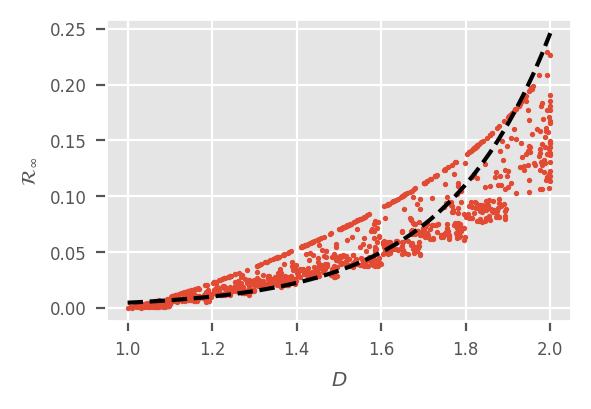

In [252]:
# Log-y linear
plt.figure(figsize=(3,2), dpi=200);
plt.scatter(x=OD2_C0_unifD.D_S.flatten(), y=OD2_C0_unifD.R_inf.flatten(), s=2);
ts = np.linspace(1,2,50)
plt.plot(ts, np.exp(popt[0] * ts) * np.exp(popt[1]), linestyle='--', color='k');
plt.ylabel("$\mathcal{R}_{\infty}$");
plt.xlabel("$D$");

### 5.1.2. Rational

In [338]:
popt_hyp, pcov_hyp = curve_fit(lambda t, a, b, c: a/(t+b) + c, OD2_C0_unifD.D_S.flatten(), (OD2_C0_unifD.R_inf.flatten()), p0=(-0.1, -2.3, -0.0075))


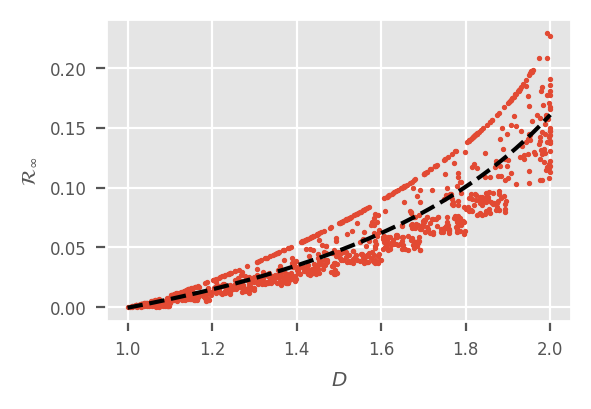

In [339]:
# Rational, x translation makes it nonlinear
plt.figure(figsize=(3,2), dpi=200);
plt.scatter(x=OD2_C0_unifD.D_S.flatten(), y=OD2_C0_unifD.R_inf.flatten(), s=2);
ts = np.linspace(1,2,50)
plt.plot(ts, popt_hyp[0]/(ts + popt_hyp[1]) + popt_hyp[2], linestyle='--', color='k');
plt.ylabel("$\mathcal{R}_{\infty}$");
plt.xlabel("$D$");

In [340]:
OD2_C0_R_inf_SSR = np.sum(np.square(popt_hyp[0]/(OD2_C0_unifD.D_S.flatten() + popt_hyp[1]) + popt_hyp[2] - OD2_C0_unifD.R_inf.flatten()))
# OD2_C0_R_inf_SSR

OD2_C0_R_inf_SST = np.sum(np.square(popt_hyp[0]/(OD2_C0_unifD.D_S.flatten() + popt_hyp[1]) + popt_hyp[2] - np.mean(OD2_C0_unifD.R_inf.flatten())))


1 - (OD2_C0_R_inf_SSR/OD2_C0_R_inf_SST) # R^2

0.8306886362667733

In [341]:
popt_hyp # Model parameters

array([-0.20231 , -2.725991, -0.117738])

## 5.2 O'Dwyer pseudo-$R^2$ tables


Here, we include a function to choose from a linear, log($y$), and rational fits, which then computes a table of pseudo-$R^2$ values to gauge how well these fits explain the variation in each stability measure as a function of equilibrium diversity.

In [212]:
from sklearn.linear_model import LinearRegression

import pandas as pd

In [386]:
def od_R2_table(sys_list, sys_names, stab_start_idx=0, log_y = False, rational = False):
    # Must enter systems by ascending C overall, then within C by ascending N
    
    stabs = ['R_0', 'R_inf', 'I_S', 'I_D'][stab_start_idx:]
    stab_names = [r'$\mathcal{R}_0$',r'$\mathcal{R}_{\infty}$', '$\mathcal{I}_S$', '$\mathcal{I}_D$'][stab_start_idx:]
    ns = [None] * len(sys_list)
    for i, sys in enumerate(sys_list):
        # print(type(sys.n))
        ns[i] = sys.n
    ns = list(np.sort(list(set(ns))))
    # Assume Sorted by C type, then by N???
    num_ns = len(ns)
    # ns = ['2','3','5','10','15','20']
    row_idx = [ns,stab_names]
    num_sys = len(sys_names)
    num_Cs = int(len(sys_list) / len(ns))
    if (num_Cs != len(sys_names)):
        print('C size, number of systems mismatch.')
    
    divs = ['D']
    # Cs = ['CL1', 'CL2', 'CR1', 'CR2']
    col_idx = [divs, sys_names]

    row_midx = pd.MultiIndex.from_product(row_idx)
    col_midx = pd.MultiIndex.from_product(col_idx)

    row_midx.set_names(['N','Stability Measure'], inplace=True)
    col_midx.set_names(['Diversity Measure:','System Type:'], inplace=True)
    
    stabdivR2_OD = pd.DataFrame(index=row_midx, columns=col_midx)
    
    row_jmp = len(stabs)
    
    for i, od in enumerate(sys_list):
        for k, stab in enumerate(stabs): # Stability Indices
            if(rational):
                temp_popt, temp_pcov = curve_fit(f = lambda t, a, b, c: a/(t+b) + c, xdata=sys_list[i].D_s.reshape(-1), ydata = getattr(sys_list[i], stab).flatten(), p0=(-0.1, -2.3, -0.0075))
                SSR = np.sum(np.square( getattr(sys_list[i], stab) - (temp_popt[0]/(sys_list[i].D_S.flatten() + temp_popt[1]) + temp_popt[2]) ) )
                SST = np.sum(np.square( getattr(sys_list[i], stab) - np.mean(sys_list[i].R_inf.flatten()) ) )
                PR2 = 1 - (SSR/SST)
                stabdivR2_OD.iloc[(row_jmp*i)%(num_ns*row_jmp)+k, i//num_ns] = PR2

            elif (log_y):
                # prams, _ = curve_fit(lambda t, a, b: a*np.exp(b)*np.exp(t)+a*np.exp(b), sys_list[i].D_s.reshape(-1,1), np.log(getattr(sys_list[i], stab)) )
                temp = LinearRegression().fit(X=sys_list[i].D_s.reshape(-1,1), y = np.log(getattr(sys_list[i], stab) + 0.01 + np.min(getattr(sys_list[i], stab)) ))
                stabdivR2_OD.iloc[(row_jmp*i)%(num_ns*row_jmp)+k, i//num_ns] = temp.score(X=sys_list[i].D_s.reshape(-1,1), y = np.log(getattr(sys_list[i], stab)+ 0.01 + np.min(getattr(sys_list[i], stab))))
            else:
                temp = LinearRegression().fit(X=sys_list[i].D_s.reshape(-1,1), y = getattr(sys_list[i], stab))
                stabdivR2_OD.iloc[(row_jmp*i)%(num_ns*row_jmp)+k, i//num_ns] = temp.score(X=sys_list[i].D_s.reshape(-1,1), y = getattr(sys_list[i], stab))
    
    return stabdivR2_OD.astype(float)


In [387]:
# ODs_C0_unifD = [OD3_C0_unifD,OD5_C0_unifD,OD10_C0_unifD,OD15_C0_unifD]
ODs_unifD = [OD2_C0_unifD, OD3_C0_unifD, OD5_C0_unifD, OD10_C0_unifD, OD15_C0_unifD,
            OD2_CL1_unifD, OD3_CL1_unifD,OD5_CL1_unifD,OD10_CL1_unifD,OD15_CL1_unifD,
            OD2_CL2_unifD, OD3_CL2_unifD,OD5_CL2_unifD,OD10_CL2_unifD,OD15_CL2_unifD,
            OD2_CR1_unifD, OD3_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,OD15_CR1_unifD,
            OD2_CR2_unifD, OD3_CR2_unifD,OD5_CR2_unifD,OD10_CR2_unifD,OD15_CR2_unifD]

In [388]:
ODs_unifD_log = [OD2_C0_unifD, OD3_C0_unifD, OD5_C0_unifD, OD10_C0_unifD,
            OD2_CL1_unifD, OD3_CL1_unifD,OD5_CL1_unifD,OD10_CL1_unifD,
            OD2_CL2_unifD, OD3_CL2_unifD,OD5_CL2_unifD,OD10_CL2_unifD,
            OD2_CR1_unifD, OD3_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,
            OD2_CR2_unifD, OD3_CR2_unifD,OD5_CR2_unifD,OD10_CR2_unifD]

In [389]:
stabdivR2_OD_unifD = od_R2_table(ODs_unifD, ['OD_C0_unifD','OD_CL1_unifD','OD_CL2_unifD','OD_CR1_unifD','OD_CR2_unifD'])


In [390]:
stabdivR2_OD_unifD_log = od_R2_table(ODs_unifD_log, ['OD_C0_unifD','OD_CL1_unifD','OD_CL2_unifD','OD_CR1_unifD','OD_CR2_unifD'], stab_start_idx=1, log_y=True)


In [391]:
stabdivR2_OD_unifD_ratl = od_R2_table(ODs_unifD, ['OD_C0_unifD','OD_CL1_unifD','OD_CL2_unifD','OD_CR1_unifD','OD_CR2_unifD'], rational=True)


In [392]:
stabdivR2_OD_unifD

Diversity Measure:                  D                                         \
System Type:              OD_C0_unifD OD_CL1_unifD OD_CL2_unifD OD_CR1_unifD   
N  Stability Measure                                                           
2  $\mathcal{R}_0$           0.214690     0.255591     0.261465     0.941229   
   $\mathcal{R}_{\infty}$    0.811930     0.873970     0.903570     0.925493   
   $\mathcal{I}_S$           0.814075     0.913603     0.920486     0.863076   
   $\mathcal{I}_D$           0.943270     0.913257     0.923070     0.895598   
3  $\mathcal{R}_0$           0.110569     0.512718     0.575260     0.956108   
   $\mathcal{R}_{\infty}$    0.653687     0.707256     0.672065     0.703777   
   $\mathcal{I}_S$           0.686949     0.713409     0.647317     0.672287   
   $\mathcal{I}_D$           0.690212     0.714864     0.659102     0.691780   
5  $\mathcal{R}_0$           0.083133     0.291713     0.857290     0.944562   
   $\mathcal{R}_{\infty}$    0.437587     0.584475     0.543329     0.552682   
   $\mathcal{I}_S$           0.454034     0.572207     0.521719     0.520948   
   $\mathcal{I}_D$           0.455744     0.577471     0.530707     0.538361   
10 $\mathcal{R}_0$           0.213887     0.563134     0.854751     0.908360   
   $\mathcal{R}_{\infty}$    0.470861     0.482993     0.450828     0.116658   
   $\mathcal{I}_S$           0.387201     0.450843     0.432136     0.269413   
   $\mathcal{I}_D$           0.473293     0.464457     0.439946     0.301547   
15 $\mathcal{R}_0$           0.333101     0.737432     0.825199     0.878757   
   $\mathcal{R}_{\infty}$    0.437631     0.449091     0.398286     0.093258   
   $\mathcal{I}_S$           0.321604     0.398732     0.375893     0.350498   
   $\mathcal{I}_D$           0.422115     0.420336     0.385343     0.302976   

Diversity Measure:                      
System Type:              OD_CR2_unifD  
N  Stability Measure                    
2  $\mathcal{R}_0$            0.977262  
   $\mathcal{R}_{\infty}$     0.925652  
   $\mathcal{I}_S$            0.862250  
   $\mathcal{I}_D$            0.895251  
3  $\mathcal{R}_0$            0.956845  
   $\mathcal{R}_{\infty}$     0.710047  
   $\mathcal{I}_S$            0.669075  
   $\mathcal{I}_D$            0.695658  
5  $\mathcal{R}_0$            0.930237  
   $\mathcal{R}_{\infty}$     0.031451  
   $\mathcal{I}_S$            0.275486  
   $\mathcal{I}_D$            0.333975  
10 $\mathcal{R}_0$            0.849587  
   $\mathcal{R}_{\infty}$     0.124422  
   $\mathcal{I}_S$            0.318067  
   $\mathcal{I}_D$            0.303074  
15 $\mathcal{R}_0$            0.791364  
   $\mathcal{R}_{\infty}$     0.096977  
   $\mathcal{I}_S$            0.339777  
   $\mathcal{I}_D$            0.297223

In [394]:
out_table_linear = stabdivR2_OD_unifD.style.background_gradient(cmap='RdPu', axis=None).format(precision=3)

In [395]:
out_table_log = stabdivR2_OD_unifD_log.style.background_gradient(cmap='RdPu', axis=None).format(precision=3)

In [396]:
out_table_ratl = stabdivR2_OD_unifD_ratl.style.background_gradient(cmap='RdPu', axis=None).format(precision=3)

In [397]:
# Plot one of these high-R^2 examples with an exponential fit
temp = LinearRegression().fit(X=OD2_C0_unifD.D_s.reshape(-1,1), y = np.log(OD2_C0_unifD.R_inf + 0.01 + np.min(OD2_C0_unifD.R_inf) ) )
temp_score = temp.score(X=OD2_C0_unifD.D_s.reshape(-1,1), y = np.log(OD2_C0_unifD.R_inf+ 0.01 + np.min(OD2_C0_unifD.R_inf) ))


In [398]:
temp_score

0.9088798396592594

The example below demonstrates a log-$y$ fit with $R^2 \approx 0.91$ for asymptotic resilience against species diversity for a 2-species system. This model did not include a constant term, so it does not model the apparent near-zero stability when species diversity is nearly 1.

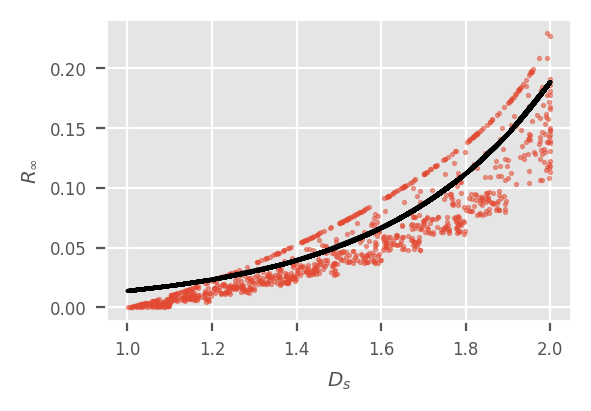

In [399]:
plt.figure(figsize=(3,2), dpi=200);
plt.scatter(OD2_C0_unifD.D_s.reshape(-1,1), OD2_C0_unifD.R_inf, s=2, alpha=0.5);
plt.plot(OD2_C0_unifD.D_s.reshape(-1,1), np.exp(temp.predict(OD2_C0_unifD.D_s.reshape(-1,1))), color='black');
plt.xlabel('$D_s$');
plt.ylabel('$R_{\infty}$');

The tables of pseudo-$R^2$ values (Figures 5.1, 5.2, and 5.3) for the three fits were produced from the $\LaTeX$ printed in the commented blocks below. Minor aesthetic changes were made for the figures as they appear in the paper.

### 5.2.a. Linear fit pseudo-$R^2$ table

In [400]:
# print(out_table_linear.to_latex(convert_css=True))

### 5.2.b. log-$y$ fit pseudo-$R^2$ table

In [ ]:
# print(out_table_log.to_latex(convert_css=True))

### 5.2.c. Rational fit pseudo-$R^2$ table

In [402]:
# print(out_table_ratl.to_latex(convert_css=True))

# Miscellaneous

## Probability of stability in O'Dwyer systems

### Eigenvalues, single fixed P

In [ ]:
### Original O'Dwyer method for determining/plotting stability
   # Fix a symmetric P (sP) and an asymmetric P (aP).
    # Pick uniform-random equilibria r and s, where unif bounds are chosen to guarantee positive mu and rho
        # mu and rho are only implicit in r and s, could be calculated from Eq 6? in Appendix
     # Evaluate Jacobian at r and s for each P and append the eigenvalues to running list

sev = np.array([])
aev = np.array([]) 

## Parameters ##

n   = 20      # number of species AND number of resrcs
eps = 0.25    # efficiency, scales consumption
sig = 1       # std deviation of production rates, abundances.
c   = 1       # equal consumption rate

I = np.identity(n)

## Consumption Matrix ##

C = c * I

## Production matrices ##

sP = symP(sig, n)
aP = asymP(sig, n)
#sPvec = symPvec(sig, n)

rlb = n * sig * mt.sqrt(2 / mt.pi) / (c * eps) # mu and rho are hidden, i.e. some choice of those vectors
                                                # produces this equilibrium

for k in range(5000): ### originally 5000
    ## Abundances ##
    
    r = uniform(rlb, 10 * rlb)           ### varying the densities at which Jacobian is evaluated
    s = uniform(rlb / 10**4, rlb / 1000)
    
    ## Linearized System ##
       ### Jacobian, L, eval'd at steady state
    #     [ LA | aLB]
    #aL = [---------]
    #     [ LC | LD ]
    LA  = -c * s * I
    
    sLB = sP - c * r * I ### the only partitions that differ between symmetric and asymmetric Production models
    aLB = aP - c * r * I

    LC = eps * c * s * I
    LD = np.zeros((n, n))

    sL  = np.vstack((np.hstack((LA, sLB)), np.hstack((LC, LD))))
    aL  = np.vstack((np.hstack((LA, aLB)), np.hstack((LC, LD))))
    
    ## Eigenvalues of Linearized System ##
    
    sev = np.append(sev, eigvals(sL))
    aev = np.append(aev, eigvals(aL))
    
# Why iterating with random populations rather than random P matrices at proper steady states?

### Eigenvalue hexbin plots

In [ ]:
## Plot eigenvalues of linearized system ##

for i, q in enumerate([sev, aev]): # i index, q current value

    x = q.real
    y = q.imag

    plt.rcParams["axes.edgecolor"] = "black" 
    plt.rcParams["axes.linewidth"] = 1 
    
    fig, ax = plt.subplots(figsize = (5,3))

    #cmap = plt.cm.viridis_r  ### old, gets an error
    cmap = mpl.cm.get_cmap("plasma").copy()
    cmap.set_under(color = 'white', alpha = 0) 

    plt.axvline(0, c='grey', linestyle='--', linewidth=1, ymin=0.07, ymax=0.93) ### stability threshold (Re = 0)

    font = {'size' : 7}
    plt.rc('font', **font)

    plt.hexbin(x, y, bins=None, cmap=cmap, linewidths=0.1) ### bins = 'log' seems unhelpful???

    plt.xlabel(r'Re($\lambda$)')
    plt.ylabel(r'Im($\lambda$)')

    plt.clim(10**(-8), 5.0) ### color limits, increase upper for better contrast ???
    ### originally, (10**(-8), 2.0)

    xmin, xmax = plt.xlim()
    nxm = (xmax - xmin) / 10 ### def'n some padding/margins
    plt.xlim((xmin - nxm, xmax + nxm))

    
    ### Adjusting Re axis tick marks
    if i==0: ### symmetric P
        loc = plticker.MultipleLocator(base=0.01) ### tick marks in increments of 'base'
        ax.xaxis.set_major_locator(loc)
        plt.title('Symmetric P (O\'Dwyer)')
    if i==1: ### asymetric P
        loc = plticker.MultipleLocator(base=0.01) ### originally, base = 0.02
        ax.xaxis.set_major_locator(loc)
        plt.title('Asymmetric P (O\'Dwyer)')        

    ymin, ymax = plt.ylim()
    nym = (ymax - ymin) / 3
    plt.ylim((ymin - nym, ymax + nym))

    cb = plt.colorbar(aspect=40, shrink=0.85, pad=0.07)
    locs = cb.get_ticks()
    tl = locs[-1] * 2 / 25
    cb.set_ticks([tl, locs[-1] - tl])
    cb.set_ticklabels(['Low Density', 'High Density'])
        
plt.show();

### Frequency of stable n-size systems

In [ ]:
### Original O'Dwyer method for determining/plotting stability
   # Do same as before but with k = 100 trials
    
k_test = 100
ns_test = list(range(1,61))
percents_stable_Odw = []

## Parameters ##
eps = 0.25    # efficiency, WHY SAME FOR EACH SPECIES, scales consumption
sig = 1       # std deviation of production rates? Yes, also for abundances?
c   = 1       # equal consumption rate, WHY SAME FOR EACH SPECIES

for nn in ns_test:
    
    aev = np.array([]) # just make new eigval array for each n, easier to just reshape after appending
                            # all eigvals for one system size (n) and append the stability_percent, then repeat
    I = np.identity(nn)

    ## Consumption Matrix ##
    C = c * I

    ## Production matrices ##
    sP = symP(sig, nn)
    aP = asymP(sig, nn)
    #sPvec = symPvec(sig, n)

    rlb = nn * sig * mt.sqrt(2 / mt.pi) / (c * eps) # mu and rho are hidden, i.e. some choice of those vector
                                                    #produces this equilibrium

    LD = np.zeros((nn, nn))

    for k in range(k_test): ### originally 5000
        ## Equilibrium Abundances ##
        r = uniform(rlb, 10 * rlb)           ### varying the densities at which Jacobian is evaluated
        s = uniform(rlb / 10**4, rlb / 1000)

        ## Linearized System ##
           ### Jacobian, L, eval'd at steady state
        #     [ LA | aLB]
        #aL = [---------]
        #     [ LC | LD ]
        LA  = -c * s * I

        aLB = aP - c * r * I

        LC = eps * c * s * I
        LD = np.zeros((nn, nn))

        aL  = np.vstack((np.hstack((LA, aLB)), np.hstack((LC, LD))))

        ## Eigenvalues of Linearized System ##

        aev = np.append(aev, eigvals(aL))
    
    aev = aev.reshape(k_test,2*nn)
    pos_real_cts = np.sum(aev>0,1)
    
    percents_stable_Odw.append(len(pos_real_cts[pos_real_cts==0])/k_test)
        

In [ ]:
y_data = np.array(percents_stable_Odw)
x_data = np.array(ns_test)

plt.plot(x_data,y_data, color=(0.9,0.2,0.7));
plt.plot(x_data,y_data, 'b.');
plt.title('Frequency of stability against system size (O\'Dwyer)');
plt.xlabel('n');
plt.ylabel(r'$\frac{\# Stable Systems}{k}$');
plt.tight_layout();
plt.show();

# When using AN EVEN HIGHER SAMPLE SIZE (k=1000 vs. k=100 down below), still very noisy?
    # but with dip near n=[8,12]. Hrm...
    # Also, very stable.

In [ ]:
x_data[np.argmin(y_data)] # Least chance of having stable system at n=5

### 'Random P and Corresponding Equilibria' Approach

In [ ]:
###############################################################################
# Instead, consider randomizing the (n,n) P(roduction matrix) and eval'ing its Jacobian only at 
    # the corresponding steady state.
# Choose k = 5000
# make (k,n,n) array (5000 P matrices)
# make (k,n,1) array (5000 R_stars)
# ""                 (5000 S_stars)
###############################################################################

In [ ]:
### According to Butler/O'Dwyer, for any CHOICE of (+) mu and rho, the formulae below will produce feasible Steady States

$\vec{R^*} = (C^T)^{-1}\frac{1}{\epsilon}(P^T \vec{1} + \vec{\mu})$)

$\vec{S^*} = [(R^{*}_{diag})C - P]^{-1} \vec{\rho}$


### Testing eigvals of new vectorized system

In [ ]:
### Now, can generate k many P matrices, together with shape (k,n,n), and the corresponding R_stars and S_stars for evaluating the Jacobian at equilibrium

sEVs = np.array([])
aEVs = np.array([])

## Parameters ##
n   = 20      # number of species AND number of resrcs --> Jacobians will be (2*n,2*n)
k = 750       # number of systems to generate
eps = 0.25    # efficiency, WHY SAME FOR EACH SPECIES, scales consumption
sig = 1      # std deviation of production rates? Yes, also for abundances?
c   = 1       # equal consumption rate, WHY SAME FOR EACH SPECIES
mu = (np.ones(n)*0.5).reshape(n,1) # R_star_gen takes 2D mu
rho = (np.ones(n)*0.5).reshape(n,1)


### SEE METHODS in O'Dwyer FOR mu AND rho formulae if needed
I = np.identity(n)

## Consumption Matrix ##
C = c * I

### Generating Random P-matrices, fixing mu and rho, and eval'ing Jacobian at corresponding equilibria
    ### Then, find dominant eigenvalues.
    ### Each system will contribute 2*n eigenvalues, so we can reshape eigval list to later determine how many systems had a stable equilibrium

## Production matrices ##
sP = symPvec2(sig, n, k)
aP = asymPvec(sig, n, k)

## Equilibrium Abundances ##
sR_star = R_star_gen(C,sP, eps, mu)
sS_star = S_star_gen(C,sP, sR_star, rho)

aR_star = R_star_gen(C,aP, eps, mu)
aS_star = S_star_gen(C,aP, aR_star, rho)


## Linearized System ##
   ### Jacobian, L, eval'd at steady state
#     [ LA | LB ]
#aL = [---------]
#     [ LC | LD ]

# Community Matrix for Symmetric P
sLA  = -c * sS_star * I
sLB = sP - c * sR_star * I
sLC = eps * c * sS_star * I

# Community Matrix for Asymmetric P
aLA = -c * aS_star * I
aLB = aP - c * aR_star * I
aLC = eps * c * aS_star * I

LD = np.zeros((k, n, n)) # same for both cases P


sL  = np.concatenate((np.concatenate((sLA, sLB),2), np.concatenate((sLC, LD),2)), 1)
# aL  = np.vstack((np.hstack((aLA, aLB)), np.hstack((aLC, LD))))
aL  = np.concatenate((np.concatenate((aLA, aLB),2), np.concatenate((aLC, LD),2)), 1)


## Eigenvalues of Linearized System ##

sEVs = np.append(sEVs, eigvals(sL))
aEVs = np.append(aEVs, eigvals(aL))

### Frequency of stable n-size systems (Random P)

In [ ]:
# Small systems (small n) almost always stable

ns_test = list(range(2,41))
percents_stable = []

k_test=100
eps = 0.25

for nn in ns_test:
    n_test = nn
    # ev_ex = rand_eigval_gen(n_test,k_test,sig = 1, symmetric=False)
    
    P_ex = asymPvec(sig = 1, n = n_test, k=k_test)
    mu_ex = (np.ones(n_test)*0.5).reshape(n_test,1)
    rho_ex = (np.ones(n_test)*0.5).reshape(n_test,1)

    ev_ex = eigval_gen(P_ex, eps, mu_ex, rho_ex)
    
    reals = ev_ex.real
    
    pos_real_cts = np.sum(reals>0,-1)
    percents_stable.append(len(pos_real_cts[pos_real_cts==0])/k_test) # ratio of stable systems to total systems (k)


In [ ]:
xdata = np.array(ns_test)
ydata = np.array(percents_stable)

# I forgot how to suppress matplotlib output automatically
plt.plot(xdata,ydata, color=(0.85,0.1,0.5));
plt.plot(xdata,ydata, 'b.');

plt.title('Frequency of stability against system size (Random P)');
plt.xlabel('n');
plt.ylabel(r'$\frac{\# Stable Systems}{k}$');
plt.tight_layout();
plt.show();
# Fit with Negative binomial ?

The above data have a form similar to
$$ f(x) = a\frac{e^{r(x-d)}}{c+e^{r(x-d)}}, $$
with reals $r<0,$ and $a,c,d>0$.

#### Fitting the peculiar curve

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def logistic(x, a, r, c, d): # Model Guess 1: Logistic Decay
    y = a * (np.e**(r*(x-d)) / (c + np.e**(r*(x-d))))
    return y

# Model Guess 2: Negative Binomial (Failure Probability)

In [ ]:
guess = [1, -0.1, 0.9, 20] # guess from playing with desmos sliders
parameters, covariance = curve_fit(logistic, xdata, ydata, p0 = guess) # least-squares is default?
fit_a = parameters[0]
fit_r = parameters[1]
fit_c = parameters[2]
fit_d = parameters[3]
print(fit_a)
print(fit_r)
print(fit_c)
print(fit_d)

In [ ]:
fit_logistic_y = logistic(xdata, fit_a, fit_r, fit_c, fit_d)
plt.plot(xdata, 100*ydata, 'k.', label='% stable');
plt.plot(xdata, 100*fit_logistic_y, 'deepskyblue', label='logistic fit');
plt.legend();

### Back to plotting eigvals

In [ ]:
np.any(aEVs.real > 0)

In [ ]:
### Plot Eigenvalues of Various Linearized Systems
    ### (Eval'd at the respective steady states for single fixed mu and rho
    
# Loop the code below over a list of sigmas
    # Subplots with left column symmetric, right asymmetric
    # Make list, stability_probs. For each aEVs with different sig, append the
      # ratio of matrices that have any Re(eigval)>0 to k.

#sigs = [0.5,1,2,5,10]
sigs = [1]
# just have one pair (sEVs,aEVs) at a time for simplicity
    # generate sEVs, aEVs with current sigma
    # plot them
    # append to stability_freq using aEVs

n = 20      # number of species AND number of resrcs
k = 1000     # number of systems to generate

sP = symPvec(sig=1, n=n, k=k)
aP = asymPvec(sig=1, n=n, k=k)

mu = (np.ones(n)*1).reshape(n,1)
rho = (np.ones(n)*1).reshape(n,1)

stability_freqs = [] # len(sigs)

for j, s in enumerate(sigs): # Plotting was being buggy, no longer looping over multiple sigmas
    sEVs = eigval_gen(sP, eps, mu, rho)
    aEVs = eigval_gen(aP, eps, mu, rho)
    for i, q in enumerate([sEVs, aEVs]): # i index, q current value

        x = q.real
        y = q.imag
        
        plt.rcParams["axes.edgecolor"] = "black" 
        plt.rcParams["axes.linewidth"] = 1 

        fig, ax = plt.subplots(figsize = (5,3))

        cmap = mpl.cm.get_cmap("magma").copy()
        cmap.set_under(color = 'white', alpha=0) 

        plt.axvline(0, c='grey', linestyle='--', linewidth=1, ymin=0.07, ymax=0.93) ### stability threshold (Re = 0)

        font = {'size' : 7}
        plt.rc('font', **font)

        # plt.subplot(len(sigs),2,(j+i+1));
        plt.hexbin(x, y, bins=None, cmap=cmap, linewidths=0.1) ### bins = 'log' seems unhelpful???

        plt.xlabel(r'Re($\lambda$)')
        plt.ylabel(r'Im($\lambda$)')

        plt.clim(10**(-8), 5.0) ### color limits, increase upper for better contrast ???
        ### originally, (10**(-8), 2.0)

        xmin, xmax = plt.xlim()
        nxm = (xmax - xmin) / 10 ### def'n some padding/margins
        plt.xlim((xmin - nxm, xmax + nxm))

        ### Adjusting Re axis tick marks
        if i==0: ### symmetric P
            loc = plticker.MultipleLocator(base=0.01) ### tick marks in increments of 'base'
            # ax.xaxis.set_major_locator(loc)
            plt.title(r'Symmetric P, $\sigma={}$'.format(s))

        if i==1: ### asymmetric P
            loc = plticker.MultipleLocator(base=0.01) ### originally, base = 0.02
            # ax.xaxis.set_major_locator(loc)
            plt.title(r'Asymmetric P, $\sigma={}$'.format(s))
            
        cb = plt.colorbar(aspect=40, shrink=0.85, pad=0.07)
        locs = cb.get_ticks()
        tl = locs[-1] * 2 / 25
        cb.set_ticks([tl, locs[-1] - tl])
        cb.set_ticklabels(['Low Density', 'High Density'])

        ymin, ymax = plt.ylim()
        nym = (ymax - ymin) / 3
        plt.ylim((ymin - nym, ymax + nym))
        
        plt.tight_layout()

plt.show();

## Uniform D

How should the equilibrium species populations be distributed such that $D$ is uniformly distributed on 0 to $N$?

Need extra constraints on $p_i$, otherwise the problem of finding $p_i$ distributions that lead to uniform $D$ is underdetermined.

In [ ]:
p_2 = np.zeros((1000,2,1))
p_2[:,0,:] = np.linspace(0.1,1,1000).reshape(1000,1)

p_2[:,1,:] = 1 - p_2[:,0,:]

In [ ]:
temp = D_1(p_2)

temp[0] = 1
temp[-1] = 1

np.mean(temp)

In [ ]:
plt.figure(figsize=(4,3));
plt.plot(p_2[:,0,:], temp);
plt.plot(p_2[:-1,0,:], np.diff(temp, axis=0)/(p_2[1,0,0]-p_2[0,0,0]));
plt.ylim(-4,4); # Low diversity is scarcer this way, look at mean of temp (mean of D > 1.5)

## Other

In [ ]:
# fig, ax = plt.subplots(figsize=(5,3), dpi=350);
# ax.plot(x,y);

# ax.axvline(x=x[np.where(y==90)], color="black", linestyle='--');
# ax.set_xticks(np.linspace(0,100, 51));
# ax.tick_params(axis='x', which='major', pad=1, labelrotation=0);
# for tick in ax.xaxis.get_major_ticks()[1::2]:
#     tick.set_pad(7)
# plt.show();

In [ ]:
# Below, figuring the derivation of 'rlb'
# default PDF of normal, p_norm(x)
# sub for mu=0, sigma=1
# double due to half normal

$$ p_{norm}(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2} $$

$$ p_{norm}(x) = \frac{1}{{ \sqrt {2\pi } }}e^{-\frac{1}{2} x^2} $$
$$ p_{halfnorm}(x) = \frac{2}{{ \sqrt {2\pi } }}e^{-\frac{1}{2} x^2} $$
$$ p_{halfnorm}(x) = \sqrt{\frac{2}{\pi}}e^{-\frac{1}{2} x^2} $$

In [ ]:
# expectation of the above is np.sqrt(2/np.pi)

$$ rlb = \frac{n  \sigma  \sqrt{\frac{2}{\pi}} } {c  \epsilon} $$

$$ rlb = \frac{20  \sqrt{\frac{2}{\pi}} } {0.25}$$

$$ rlb = 80  \sqrt{\frac{2}{\pi}} $$

Standard gLV (meaning with carrying capacity and only pairwise mass action terms)
Community matrix takes the form:
$$
r_i - N_i^* + \sum\limits_{j=1}^{n} \beta_{i,j}N_{j}^{*} \quad \text{for}\space i=j
\\
\beta_{i,j}N_j^* \quad \text{for}\space i\neq j
$$

$$0=r_i N_i^* (1-\frac{N_i^*}{k_i}) + N_i^* \sum_{j=1, j\neq i}^n \beta_{i,j} N_j^* $$
Set gLV equations equal to 0 to obtain linear system that can be solved for non-extinction equilibrium (after cancelling one factor of $N_i^{*}$).